### INTEREST RATE ON LOANS 
    This is a project to predict the interest rates on loan to be given out to various clients
    We have been given some data for the past loans released to other clients in the past. With this we want to predict new interest rates on the new loans to be disbursed

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Importing data
# X_train_I = pd.read_csv('C:\\Users\\PC\\Documents\\Datasets\\Credit loans\\X_train_reg.csv',index_col = 'ID')
X_train_I = pd.read_csv('/kaggle/input/regression-datasets/X_train_reg.csv', index_col = 'ID')
X_train_II = pd.read_csv('/kaggle/input/regression-datasets/X_train1_reg.csv', index_col = 'ID')
X_train_III = pd.read_csv('/kaggle/input/regression-datasets/X_train2_reg.csv', index_col = 'ID')
X_test = pd.read_csv('/kaggle/input/regression-datasets/X_test_reg.csv', index_col = 'ID')
y_train_I = pd.read_csv('/kaggle/input/regression-datasets/y_train_reg.csv')
y_train_II = pd.read_csv('/kaggle/input/regression-datasets/y_train1_reg.csv')
y_train_III = pd.read_csv('/kaggle/input/regression-datasets/y_train2_reg.csv')
# X_train_III = pd.read_csv('C:\\Users\\PC\\Documents\\Datasets\\Credit loans\\X_train2_reg.csv',index_col = 'ID')
# X_test = pd.read_csv('C:\\Users\\PC\\Documents\\Datasets\\Credit loans\\X_test_reg.csv', index_col = 'ID')
# y_train_I = pd.read_csv('C:\\Users\\PC\\Documents\\Datasets\\Credit loans\\y_train_reg.csv')
# y_train_II = pd.read_csv('C:\\Users\\PC\\Documents\\Datasets\\Credit loans\\y_train1_reg.csv')
# y_train_III = pd.read_csv('C:\\Users\\PC\\Documents\\Datasets\\Credit loans\\y_train2_reg.csv')

In [3]:
X_train_III

Amount.Requested  Debt.To.Income.Ratio  Monthly.Income  \
ID                                                              
79542           25000.0                 27.56         8606.56   
17240           24250.0                 23.79         5833.33   
71685           16000.0                 11.27         4791.67   
2148             6500.0                  8.57         1750.00   
73376            3000.0                  1.70         7750.00   
...                 ...                   ...             ...   
69461           19125.0                 25.58         4000.00   
35303            4000.0                 22.38         4000.00   
18049            9700.0                  9.52         7333.33   
9708             7500.0                  8.61         2916.67   
67953            7550.0                  3.83         8333.33   

       Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
ID                                                   
79542               11.0                     15210   
17240                6.0                     31061   
71685                5.0                      8474   
2148                 8.0                      9317   
73376                7.0                       874   
...                  ...                       ...   
69461                5.0                         0   
35303               10.0                     18833   
18049                9.0                     14723   
9708                 6.0                      7962   
67953               10.0                     10204   

       Inquiries.in.the.Last.6.Months  ll_36  lp_10  lp_11  lp_12  ...  fico  \
ID                                                                 ...         
79542                             3.0    0.0      0      0      0  ...   722   
17240                             2.0    0.0      0      0      0  ...   732   
71685                             0.0    0.0      0      0      0  ...   667   
2148                              1.0    1.0      0      0      0  ...   722   
73376                             0.0    1.0      0      0      0  ...   687   
...                               ...    ...    ...    ...    ...  ...   ...   
69461                             0.0    1.0      0      0      0  ...   727   
35303                             2.0    1.0      0      0      0  ...   667   
18049                             0.0    1.0      0      0      0  ...   667   
9708                              0.0    1.0      0      0      0  ...   757   
67953                             0.0    1.0      0      0      0  ...   712   

       Employment.Length_7years  Employment.Length_6years  \
ID                                                          
79542                         0                         0   
17240                         0                         0   
71685                         0                         0   
2148                          0                         1   
73376                         0                         0   
...                         ...                       ...   
69461                         0                         0   
35303                         0                         0   
18049                         0                         0   
9708                          0                         0   
67953                         0                         0   

       Employment.Length_1year  Employment.Length_4years  \
ID                                                         
79542                        0                         0   
17240                        0                         0   
71685                        0                         0   
2148                         0                         0   
73376                        0                         0   
...                        ...                       ...   
69461                        0                         0   
35303                        0                         0   
18049                  

In [4]:
# Generating training sets
X_train = pd.concat([X_train_I, X_train_II], axis = 0)

# Getting first 5 rows
X_train.head()

Amount.Requested  Debt.To.Income.Ratio  Monthly.Income  \
ID                                                              
79542           25000.0                 27.56         8606.56   
75473           19750.0                 13.39         6737.50   
67265            2100.0                  3.50         1000.00   
80167           28000.0                 19.62         7083.33   
17240           24250.0                 23.79         5833.33   

       Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
ID                                                   
79542               11.0                   15210.0   
75473               14.0                   19070.0   
67265               13.0                     893.0   
80167               12.0                   38194.0   
17240                6.0                   31061.0   

       Inquiries.in.the.Last.6.Months  ll_36  lp_10  lp_11  lp_12  ...  fico  \
ID                                                                 ...         
79542                             3.0    0.0    0.0      0      0  ...   722   
75473                             3.0    0.0    0.0      0      0  ...   712   
67265                             1.0    1.0    0.0      1      0  ...   692   
80167                             1.0    1.0    0.0      0      0  ...   712   
17240                             2.0    0.0    0.0      0      0  ...   732   

       Employment.Length_7years  Employment.Length_6years  \
ID                                                          
79542                         0                         0   
75473                         0                         0   
67265                         0                         0   
80167                         0                         0   
17240                         0                         0   

       Employment.Length_1year  Employment.Length_4years  \
ID                                                         
79542                        0                         0   
75473                        0                         1   
67265                        0                         0   
80167                        0                         0   
17240                        0                         0   

       Employment.Length_5years  Employment.Length_3years  \
ID                                                          
79542                         1                         0   
75473                         0                         0   
67265                         0                         0   
80167                         0                         0   
17240                         0                         0   

       Employment.Length_2years  Employment.Length_LT_1year  \
ID                                                            
79542                         0                           0   
75473                         0                           0   
67265                         0                           1   
80167                         0                           0   
17240                         0                           0   

       Employment.Length_10years  
ID                                
79542                          0  
75473                          0  
67265                          0  
80167                          1  
17240                          1  

[5 rows x 28 columns]

In [5]:
# Checking data dimensions
X_train.shape

(3958, 28)

In [6]:
X_test.shape

(300, 28)

In [7]:
# Creating a validation dataset
X_valid = X_train_III.copy()

In [8]:
# Getting the top five rows of our validation set
X_valid.head()

Amount.Requested  Debt.To.Income.Ratio  Monthly.Income  \
ID                                                              
79542           25000.0                 27.56         8606.56   
17240           24250.0                 23.79         5833.33   
71685           16000.0                 11.27         4791.67   
2148             6500.0                  8.57         1750.00   
73376            3000.0                  1.70         7750.00   

       Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
ID                                                   
79542               11.0                     15210   
17240                6.0                     31061   
71685                5.0                      8474   
2148                 8.0                      9317   
73376                7.0                       874   

       Inquiries.in.the.Last.6.Months  ll_36  lp_10  lp_11  lp_12  ...  fico  \
ID                                                                 ...         
79542                             3.0    0.0      0      0      0  ...   722   
17240                             2.0    0.0      0      0      0  ...   732   
71685                             0.0    0.0      0      0      0  ...   667   
2148                              1.0    1.0      0      0      0  ...   722   
73376                             0.0    1.0      0      0      0  ...   687   

       Employment.Length_7years  Employment.Length_6years  \
ID                                                          
79542                         0                         0   
17240                         0                         0   
71685                         0                         0   
2148                          0                         1   
73376                         0                         0   

       Employment.Length_1year  Employment.Length_4years  \
ID                                                         
79542                        0                         0   
17240                        0                         0   
71685                        0                         0   
2148                         0                         0   
73376                        0                         0   

       Employment.Length_5years  Employment.Length_3years  \
ID                                                          
79542                         1                         0   
17240                         0                         0   
71685                         0                         0   
2148                          0                         0   
73376                         0                         0   

       Employment.Length_2years  Employment.Length_LT_1year  \
ID                                                            
79542                         0                           0   
17240                         0                           0   
71685                         1                           0   
2148                          0                           0   
73376                         0                           0   

       Employment.Length_10years  
ID                                
79542                          0  
17240                          1  
71685                          0  
2148                           0  
73376                          1  

[5 rows x 28 columns]

In [9]:
X_valid.shape

(440, 28)

In [10]:
# Generating the training target columns, making sure they align with the feature columns
y_train = pd.concat([y_train_I, y_train_II], axis = 0)
y_train

Interest.Rate
0             18.49
1             17.27
2             14.33
3             16.29
4             12.23
...             ...
1754          17.77
1755           6.62
1756          13.67
1757          12.21
1758           7.90

[3958 rows x 1 columns]

In [11]:
# Creating athe validation target
y_valid = y_train_III.copy()
y_valid.head()

Interest.Rate
0          18.49
1          12.23
2          22.47
3          11.89
4          11.14

In [12]:
y_valid.tail()

Interest.Rate
435          10.16
436          14.65
437          14.09
438           7.14
439          10.16

In [13]:
y_valid.shape

(440, 1)

In [14]:
# Resetting index for easy reordering
X_train.reset_index(inplace = True)
X_valid.reset_index(inplace = True)

In [15]:
X_test.reset_index(inplace = True)

In [16]:
X_train

ID  Amount.Requested  Debt.To.Income.Ratio  Monthly.Income  \
0     79542           25000.0                 27.56         8606.56   
1     75473           19750.0                 13.39         6737.50   
2     67265            2100.0                  3.50         1000.00   
3     80167           28000.0                 19.62         7083.33   
4     17240           24250.0                 23.79         5833.33   
...     ...               ...                   ...             ...   
3953  62663           10500.0                 12.33         4583.33   
3954  97364           20800.0                 15.64        10833.33   
3955  57260           14825.0                  9.55         2500.00   
3956   3962           10000.0                 10.45         7667.00   
3957  32601           17000.0                  6.43         6250.00   

      Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0                  11.0                   15210.0   
1                  14.0                   19070.0   
2                  13.0                     893.0   
3                  12.0                   38194.0   
4                   6.0                   31061.0   
...                 ...                       ...   
3953                9.0                   18936.0   
3954               11.0                   15192.0   
3955                8.0                    8073.0   
3956                9.0                   17328.0   
3957                4.0                    1352.0   

      Inquiries.in.the.Last.6.Months  ll_36  lp_10  lp_11  ...  fico  \
0                                3.0    0.0    0.0      0  ...   722   
1                                3.0    0.0    0.0      0  ...   712   
2                                1.0    1.0    0.0      1  ...   692   
3                                1.0    1.0    0.0      0  ...   712   
4                                2.0    0.0    0.0      0  ...   732   
...                              ...    ...    ...    ...  ...   ...   
3953                             1.0    1.0    0.0      0  ...   667   
3954                             0.0    1.0    0.0      0  ...   712   
3955                             1.0    1.0    0.0      0  ...   697   
3956                             0.0    1.0    0.0      0  ...   702   
3957                             3.0    1.0    0.0      0  ...   797   

      Employment.Length_7years  Employment.Length_6years  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
3953                         0                         0   
3954                         0                         0   
3955                         0                         0   
3956                         0                         0   
3957                         0                         1   

      Employment.Length_1year  Employment.Length_4years  \
0                           0                         0   
1                           0                         1   
2                           0                         0   
3                           0                         0   
4                           0                         0   
...                       ...                       ...   
3953                        0                         0   
3954                        0                         0   
3955                        0                         0   
3956                        0                         0   
3957                        0                         0   

      Employment.Length_5years  Employment.Length_3years  \
0                            1                         0   
1                            0                         0   
2                            0              

In [17]:
y_train.reset_index(inplace = True)

# Dropping unnecessary column
y_train.drop(columns = ['index'], inplace = True)
y_train

Interest.Rate
0             18.49
1             17.27
2             14.33
3             16.29
4             12.23
...             ...
3953          17.77
3954           6.62
3955          13.67
3956          12.21
3957           7.90

[3958 rows x 1 columns]

In [18]:
# Almagamating the whole training set
train_reg = pd.concat([X_train, y_train], axis = 1)
train_reg

ID  Amount.Requested  Debt.To.Income.Ratio  Monthly.Income  \
0     79542           25000.0                 27.56         8606.56   
1     75473           19750.0                 13.39         6737.50   
2     67265            2100.0                  3.50         1000.00   
3     80167           28000.0                 19.62         7083.33   
4     17240           24250.0                 23.79         5833.33   
...     ...               ...                   ...             ...   
3953  62663           10500.0                 12.33         4583.33   
3954  97364           20800.0                 15.64        10833.33   
3955  57260           14825.0                  9.55         2500.00   
3956   3962           10000.0                 10.45         7667.00   
3957  32601           17000.0                  6.43         6250.00   

      Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0                  11.0                   15210.0   
1                  14.0                   19070.0   
2                  13.0                     893.0   
3                  12.0                   38194.0   
4                   6.0                   31061.0   
...                 ...                       ...   
3953                9.0                   18936.0   
3954               11.0                   15192.0   
3955                8.0                    8073.0   
3956                9.0                   17328.0   
3957                4.0                    1352.0   

      Inquiries.in.the.Last.6.Months  ll_36  lp_10  lp_11  ...  \
0                                3.0    0.0    0.0      0  ...   
1                                3.0    0.0    0.0      0  ...   
2                                1.0    1.0    0.0      1  ...   
3                                1.0    1.0    0.0      0  ...   
4                                2.0    0.0    0.0      0  ...   
...                              ...    ...    ...    ...  ...   
3953                             1.0    1.0    0.0      0  ...   
3954                             0.0    1.0    0.0      0  ...   
3955                             1.0    1.0    0.0      0  ...   
3956                             0.0    1.0    0.0      0  ...   
3957                             3.0    1.0    0.0      0  ...   

      Employment.Length_7years  Employment.Length_6years  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
3953                         0                         0   
3954                         0                         0   
3955                         0                         0   
3956                         0                         0   
3957                         0                         1   

      Employment.Length_1year  Employment.Length_4years  \
0                           0                         0   
1                           0                         1   
2                           0                         0   
3                           0                         0   
4                           0                         0   
...                       ...                       ...   
3953                        0                         0   
3954                        0                         0   
3955                        0                         0   
3956                        0                         0   
3957                        0                         0   

      Employment.Length_5years  Employment.Length_3years  \
0                            1                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0

In [19]:
train_reg.shape

(3958, 30)

In [20]:
# Getting a general representation of information on the training dataset
train_reg.info

<bound method DataFrame.info of          ID  Amount.Requested  Debt.To.Income.Ratio  Monthly.Income  \
0     79542           25000.0                 27.56         8606.56   
1     75473           19750.0                 13.39         6737.50   
2     67265            2100.0                  3.50         1000.00   
3     80167           28000.0                 19.62         7083.33   
4     17240           24250.0                 23.79         5833.33   
...     ...               ...                   ...             ...   
3953  62663           10500.0                 12.33         4583.33   
3954  97364           20800.0                 15.64        10833.33   
3955  57260           14825.0                  9.55         2500.00   
3956   3962           10000.0                 10.45         7667.00   
3957  32601           17000.0                  6.43         6250.00   

      Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0                  11.0                   15210.0   
1        

In [21]:
# Checking for missing values
train_reg.isna().sum()

ID                                0
Amount.Requested                  0
Debt.To.Income.Ratio              0
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
ll_36                             0
lp_10                             0
lp_11                             0
lp_12                             0
lp_13                             0
lp_14                             0
State_FL                          0
State_TX                          0
State_NY                          0
State_CA                          0
Home.Ownership_RENT               0
Home.Ownership_MORTGAGE           0
fico                              0
Employment.Length_7years          0
Employment.Length_6years          0
Employment.Length_1year           0
Employment.Length_4years          0
Employment.Length_5years          0
Employment.Length_3years          0
Employment.Length_2years          0
Employment.Length_LT_1year  

In [22]:
# Getting statistical analysis of the training data
train_reg.describe()

ID  Amount.Requested  Debt.To.Income.Ratio  Monthly.Income  \
count    3958.000000       3958.000000           3958.000000     3958.000000   
mean    52073.665740      12574.084597             15.348052     5715.644308   
std     30314.432647       7865.410964              7.521453     3746.319807   
min        10.000000       1000.000000              0.000000      588.500000   
25%     26323.000000       6250.000000              9.722500     3500.000000   
50%     51326.000000      10025.000000             15.240000     5000.000000   
75%     78588.000000      17318.750000             20.580000     6881.247500   
max    104202.000000      35000.000000             34.910000   102750.000000   

       Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
count        3958.000000               3958.000000   
mean           10.089463              15327.864629   
std             4.480024              18768.765531   
min             2.000000                  0.000000   
25%             7.000000               5568.000000   
50%             9.000000              11016.000000   
75%            13.000000              18814.000000   
max            38.000000             270800.000000   

       Inquiries.in.the.Last.6.Months        ll_36        lp_10        lp_11  \
count                     3958.000000  3958.000000  3958.000000  3958.000000   
mean                         0.906906     0.782158     0.006319     0.070237   
std                          1.232381     0.412779     0.079234     0.255579   
min                          0.000000     0.000000     0.000000     0.000000   
25%                          0.000000     1.000000     0.000000     0.000000   
50%                          0.000000     1.000000     0.000000     0.000000   
75%                          1.000000     1.000000     0.000000     0.000000   
max                          9.000000     1.000000     1.000000     1.000000   

       ...  Employment.Length_7years  Employment.Length_6years  \
count  ...               3958.000000               3958.000000   
mean   ...                  0.051541                  0.062153   
std    ...                  0.221127                  0.241463   
min    ...                  0.000000                  0.000000   
25%    ...                  0.000000                  0.000000   
50%    ...                  0.000000                  0.000000   
75%    ...                  0.000000                  0.000000   
max    ...                  1.000000                  1.000000   

       Employment.Length_1year  Employment.Length_4years  \
count              3958.000000               3958.000000   
mean                  0.074280                  0.074533   
std                   0.262259                  0.262669   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  0.000000   
max                   1.000000                  1.000000   

       Employment.Length_5years  Employment.Length_3years  \
count               3958.000000               3958.000000   
mean                   0.080596                  0.090197   
std                    0.272248                  0.286500   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       Employment.Length_2years  Employment.Length_LT_1year  \
count               3958.000000                 3958.000000   
mean                   0.095503                    0.103335   
std                    0.293945                    0.304434   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.

In [23]:
# Checking for missing values

X_valid.isna().sum()

ID                                0
Amount.Requested                  0
Debt.To.Income.Ratio              0
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
ll_36                             0
lp_10                             0
lp_11                             0
lp_12                             0
lp_13                             0
lp_14                             0
State_FL                          0
State_TX                          0
State_NY                          0
State_CA                          0
Home.Ownership_RENT               0
Home.Ownership_MORTGAGE           0
fico                              0
Employment.Length_7years          0
Employment.Length_6years          0
Employment.Length_1year           0
Employment.Length_4years          0
Employment.Length_5years          0
Employment.Length_3years          0
Employment.Length_2years          0
Employment.Length_LT_1year  

In [24]:
# General information on validation set
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              440 non-null    int64  
 1   Amount.Requested                440 non-null    float64
 2   Debt.To.Income.Ratio            440 non-null    float64
 3   Monthly.Income                  440 non-null    float64
 4   Open.CREDIT.Lines               440 non-null    float64
 5   Revolving.CREDIT.Balance        440 non-null    int64  
 6   Inquiries.in.the.Last.6.Months  440 non-null    float64
 7   ll_36                           440 non-null    float64
 8   lp_10                           440 non-null    int64  
 9   lp_11                           440 non-null    int64  
 10  lp_12                           440 non-null    int64  
 11  lp_13                           440 non-null    int64  
 12  lp_14                           440 

In [25]:
# Statistical analysis of validation data
X_valid.describe()

ID  Amount.Requested  Debt.To.Income.Ratio  Monthly.Income  \
count     440.000000        440.000000            440.000000      440.000000   
mean    51579.797727      11780.415748             15.573000     5836.536150   
std     29392.289266       7667.396305              7.508222     6284.141555   
min       224.000000       1000.000000              0.170000      588.500000   
25%     26883.750000       5806.250000             10.277500     3333.330000   
50%     50849.000000      10000.000000             14.985000     4729.165000   
75%     77070.000000      15043.750000             21.007500     6854.165000   
max    104040.000000      35000.000000             33.670000   102750.000000   

       Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
count         440.000000                440.000000   
mean           10.029737              15462.445455   
std             4.588442              18085.457220   
min             2.000000                  0.000000   
25%             7.000000               5951.750000   
50%             9.000000              11122.500000   
75%            12.250000              18992.500000   
max            34.000000             194205.000000   

       Inquiries.in.the.Last.6.Months       ll_36       lp_10       lp_11  \
count                      440.000000  440.000000  440.000000  440.000000   
mean                         0.827061    0.794956    0.006818    0.072727   
std                          1.082948    0.403711    0.082384    0.259984   
min                          0.000000    0.000000    0.000000    0.000000   
25%                          0.000000    1.000000    0.000000    0.000000   
50%                          0.000000    1.000000    0.000000    0.000000   
75%                          1.000000    1.000000    0.000000    0.000000   
max                          7.000000    1.000000    1.000000    1.000000   

       ...        fico  Employment.Length_7years  Employment.Length_6years  \
count  ...  440.000000                440.000000                440.000000   
mean   ...  708.454545                  0.031818                  0.050000   
std    ...   35.523071                  0.175716                  0.218193   
min    ...  642.000000                  0.000000                  0.000000   
25%    ...  677.000000                  0.000000                  0.000000   
50%    ...  707.000000                  0.000000                  0.000000   
75%    ...  727.000000                  0.000000                  0.000000   
max    ...  817.000000                  1.000000                  1.000000   

       Employment.Length_1year  Employment.Length_4years  \
count               440.000000                440.000000   
mean                  0.054545                  0.065909   
std                   0.227349                  0.248406   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  0.000000   
max                   1.000000                  1.000000   

       Employment.Length_5years  Employment.Length_3years  \
count                440.000000                440.000000   
mean                   0.097727                  0.111364   
std                    0.297284                  0.314940   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       Employment.Length_2years  Employment.Length_LT_1year  \
count                440.000000                  440.000000   
mean                   0.127273                    0.111364   
std                    0.333658                    0.314940   
min                    0.000000                    0.000000   
25%    

In [26]:
# Checking for null or missing values
y_valid.isna().sum()

Interest.Rate    0
dtype: int64

In [27]:
# Getting the relationship between all variables

Cor = train_reg.corr()
Cor

ID  Amount.Requested  \
ID                              1.000000          0.120643   
Amount.Requested                0.120643          1.000000   
Debt.To.Income.Ratio            0.227123          0.073422   
Monthly.Income                  0.006975          0.417043   
Open.CREDIT.Lines               0.178283          0.198020   
Revolving.CREDIT.Balance        0.085780          0.284968   
Inquiries.in.the.Last.6.Months  0.154723         -0.011570   
ll_36                           0.051037         -0.410262   
lp_10                          -0.040847         -0.078561   
lp_11                          -0.111041         -0.146470   
lp_12                          -0.100935          0.001337   
lp_13                           0.030276         -0.084613   
lp_14                           0.094859          0.167577   
State_FL                        0.023382         -0.021213   
State_TX                       -0.011210         -0.008011   
State_NY                       -0.005076          0.001410   
State_CA                        0.000943          0.008081   
Home.Ownership_RENT             0.008893         -0.130566   
Home.Ownership_MORTGAGE        -0.007525          0.156596   
fico                           -0.291165          0.083937   
Employment.Length_7years        0.021060          0.014835   
Employment.Length_6years        0.035398         -0.030991   
Employment.Length_1year        -0.012922         -0.034323   
Employment.Length_4years       -0.006809         -0.012839   
Employment.Length_5years        0.009426         -0.007958   
Employment.Length_3years       -0.055763         -0.044431   
Employment.Length_2years       -0.036117         -0.041552   
Employment.Length_LT_1year     -0.037185         -0.072807   
Employment.Length_10years       0.046947          0.150276   
Interest.Rate                   0.248706          0.329785   

                                Debt.To.Income.Ratio  Monthly.Income  \
ID                                          0.227123        0.006975   
Amount.Requested                            0.073422        0.417043   
Debt.To.Income.Ratio                        1.000000       -0.166170   
Monthly.Income                             -0.166170        1.000000   
Open.CREDIT.Lines                           0.370911        0.189886   
Revolving.CREDIT.Balance                    0.180038        0.361262   
Inquiries.in.the.Last.6.Months              0.006551        0.035100   
ll_36                                      -0.034224       -0.084067   
lp_10                                      -0.065605       -0.030816   
lp_11                                      -0.126076        0.012950   
lp_12                                      -0.108341        0.071535   
lp_13                                       0.019476       -0.049354   
lp_14                                       0.120071        0.005400   
State_FL                                    0.012974       -0.029845   
State_TX                                    0.054607       -0.016824   
State_NY                                   -0.057809        0.066681   
State_CA                                   -0.041257        0.015552   
Home.Ownership_RENT                         0.006773       -0.188235   
Home.Ownership_MORTGAGE                    -0.015974        0.224329   
fico                                       -0.228399        0.122972   
Employment.Length_7years                   -0.030590        0.041712   
Employment.Length_6years                    0.002102       -0.004128   
Employment.Length_1year                    -0.000039       -0.004165   
Employment.Length_4years                   -0.011291       -0.014417   
Employment.Length_5years                   -0.000982        0.008679   
Employment.Length_3years                   -0.019743       -0.058167   
Employment.Length_2years                   -0.001437       -0.009464   
Employment.Length_LT_1year                 -0.031613       -0.059677   
Employment.Length_10years  

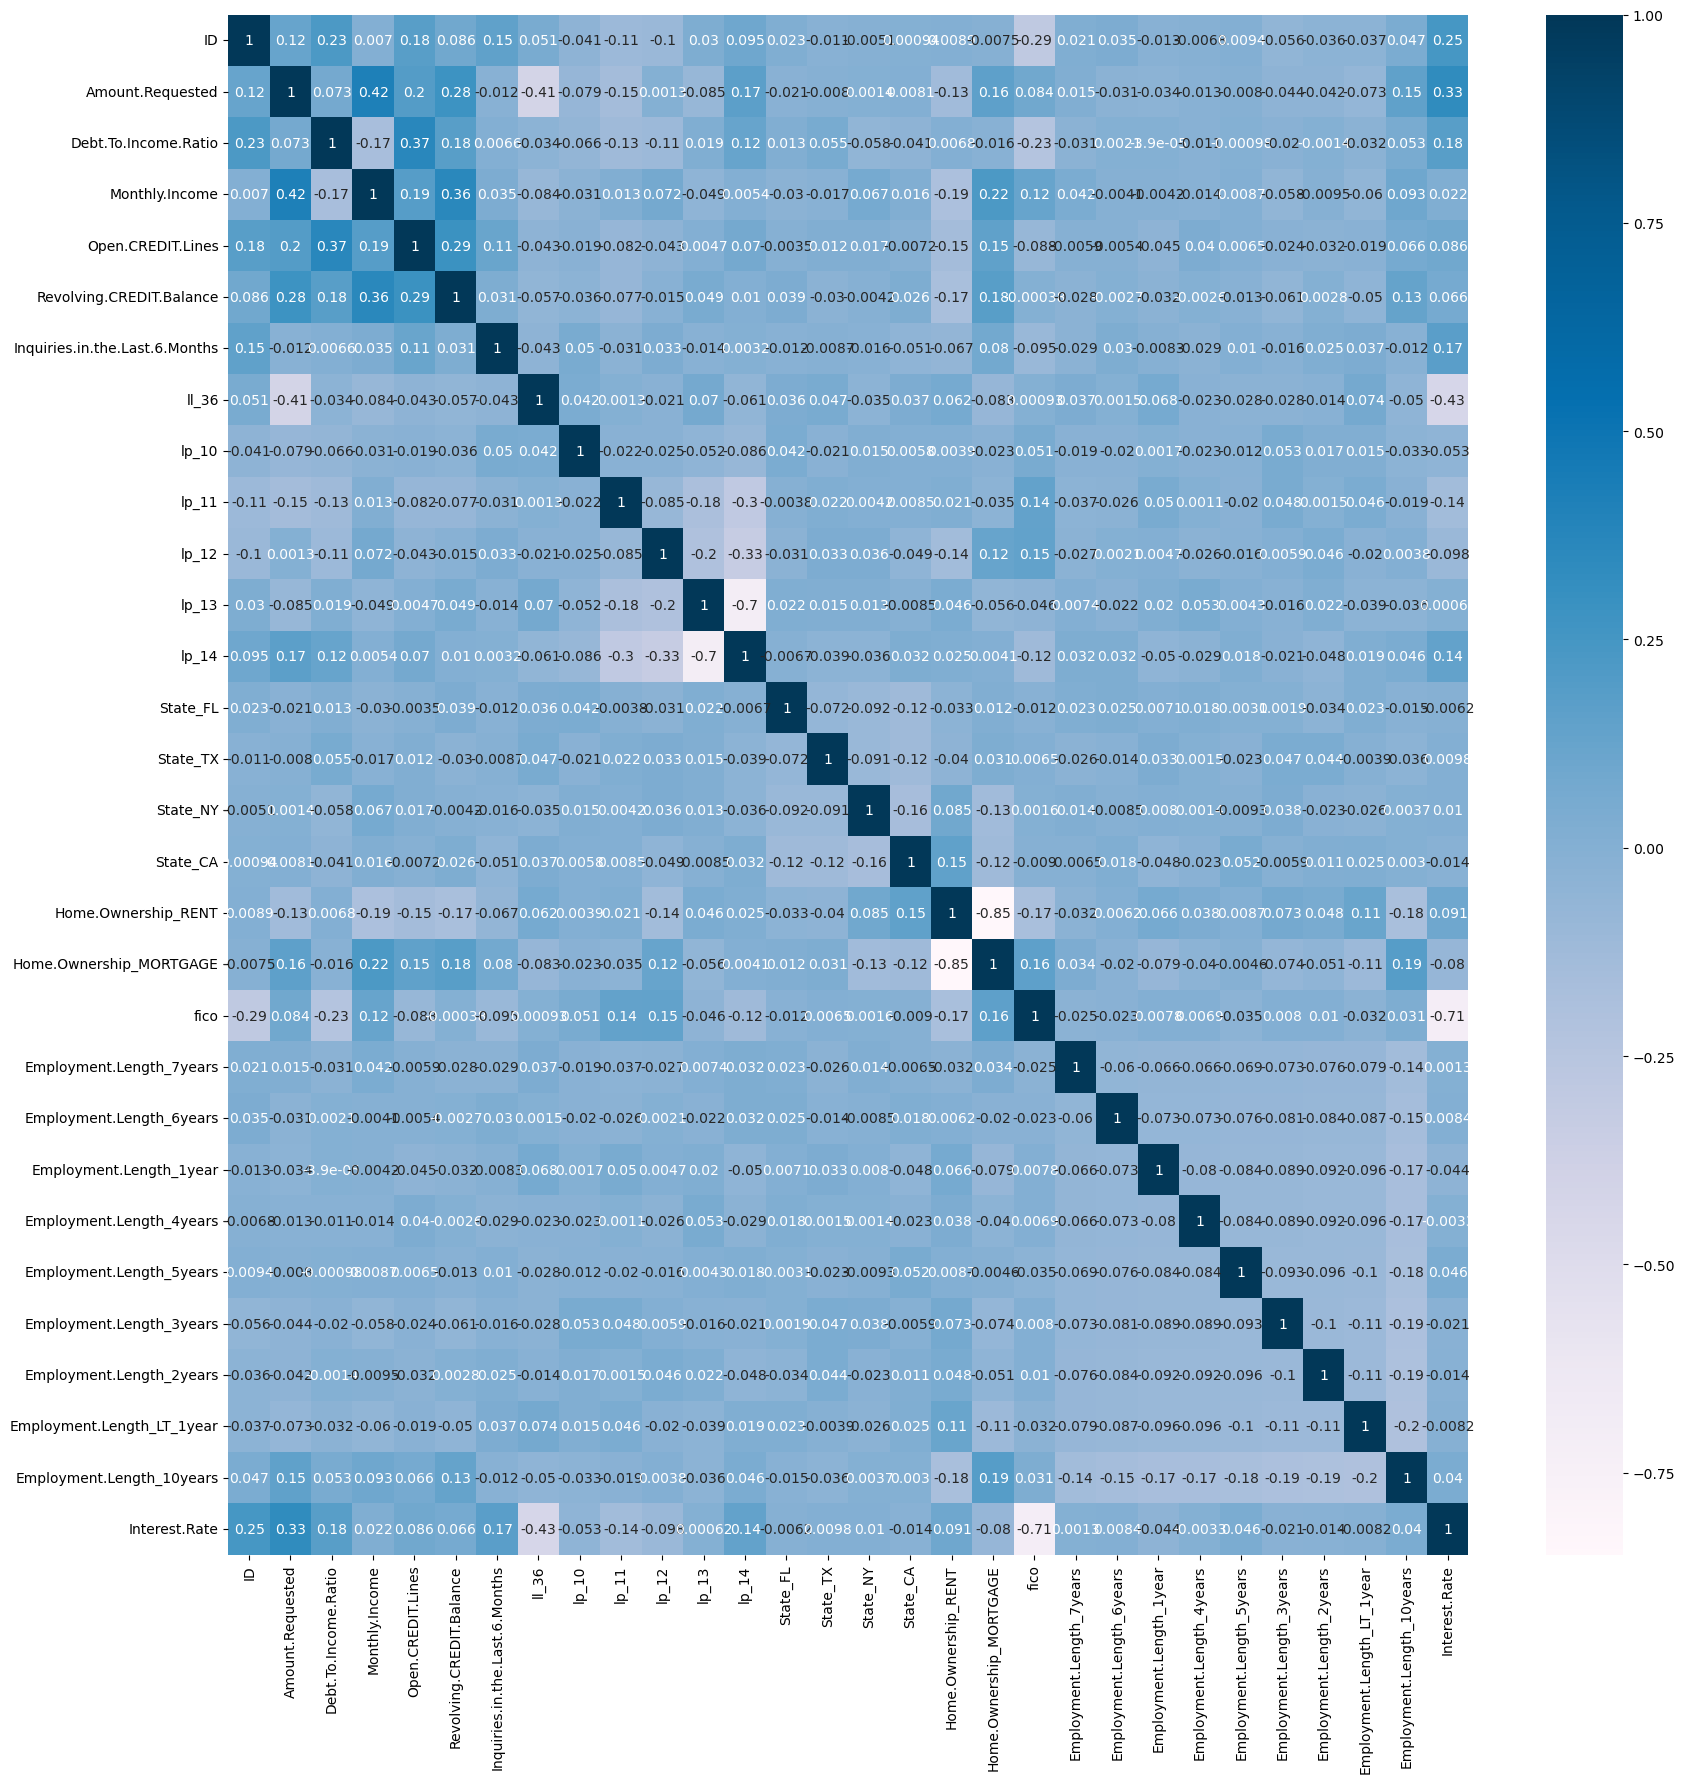

In [28]:
# Visual representation of variable relationships

plt.figure(figsize = (20,20))
sns.heatmap(Cor,annot = True, cmap = plt.cm.PuBu)
plt.show()

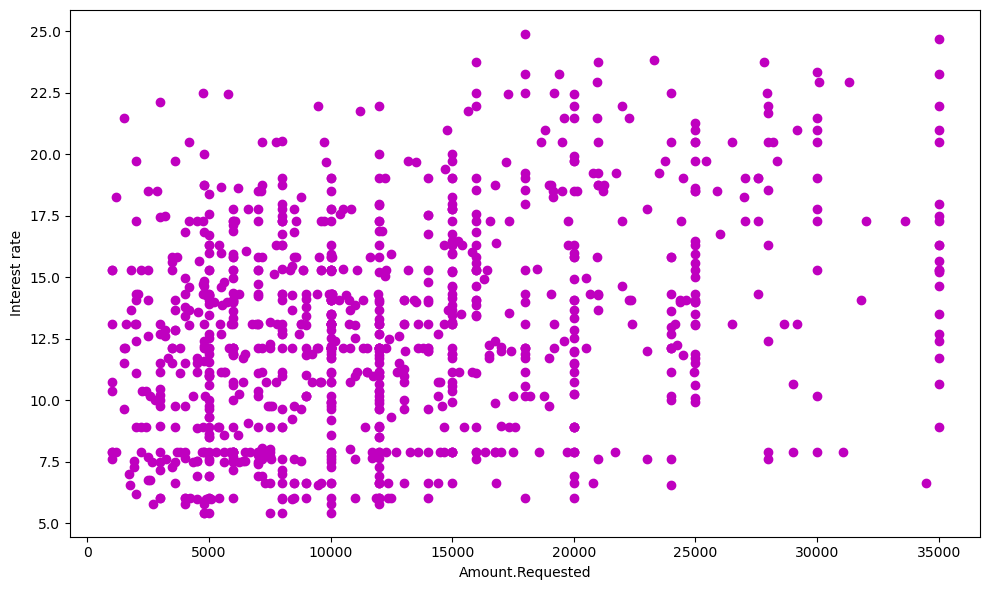

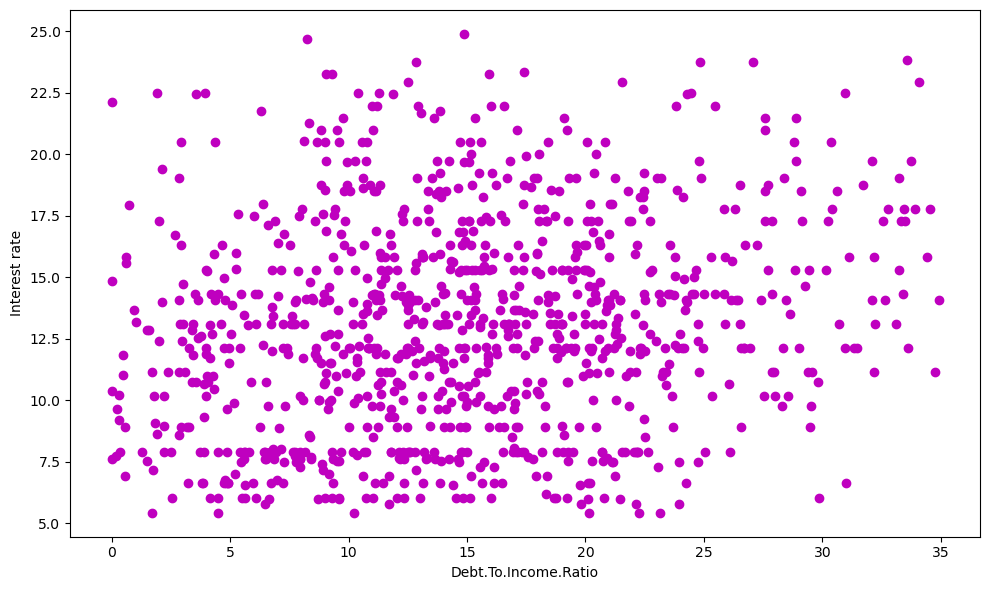

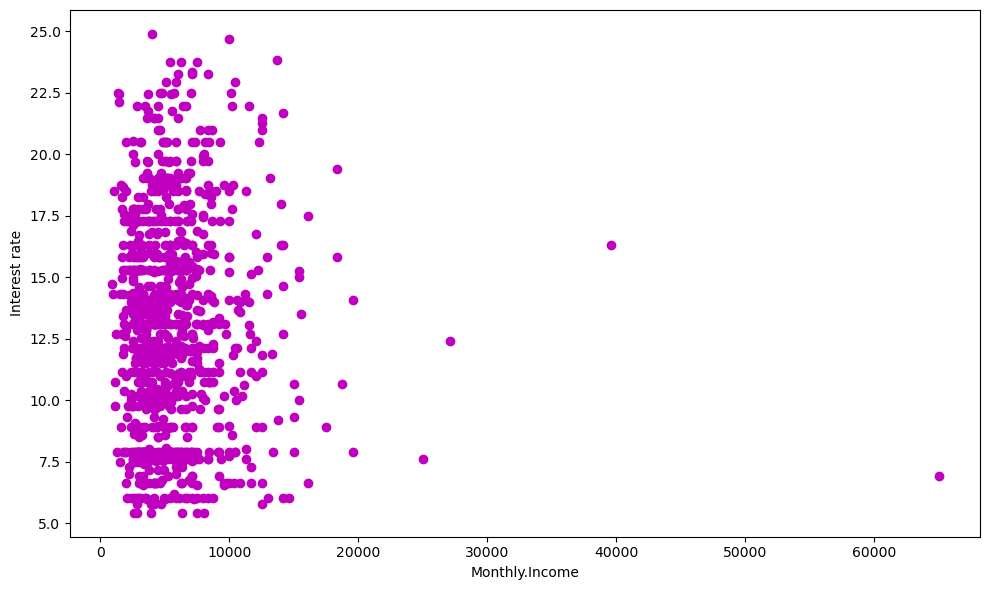

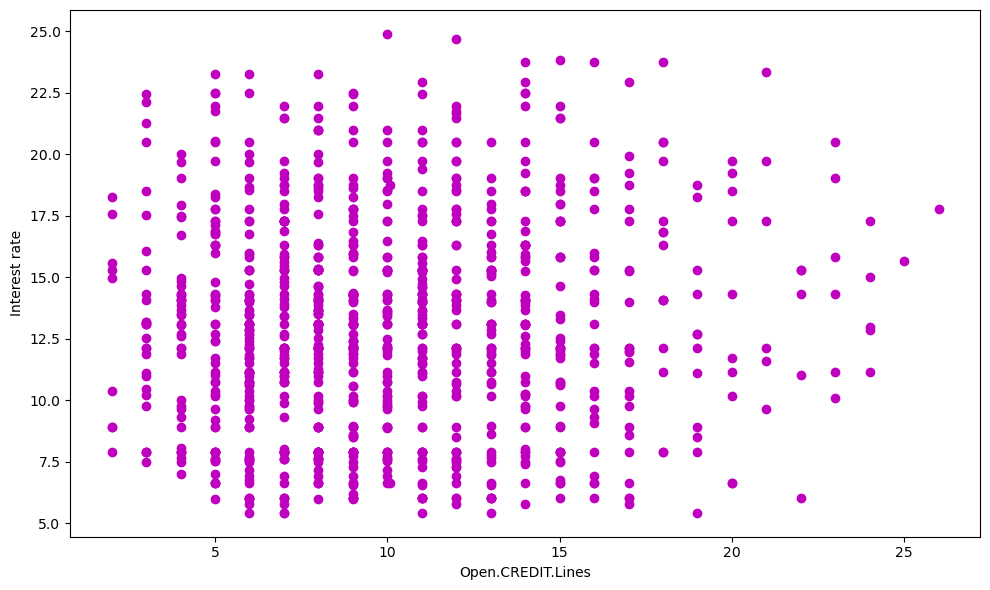

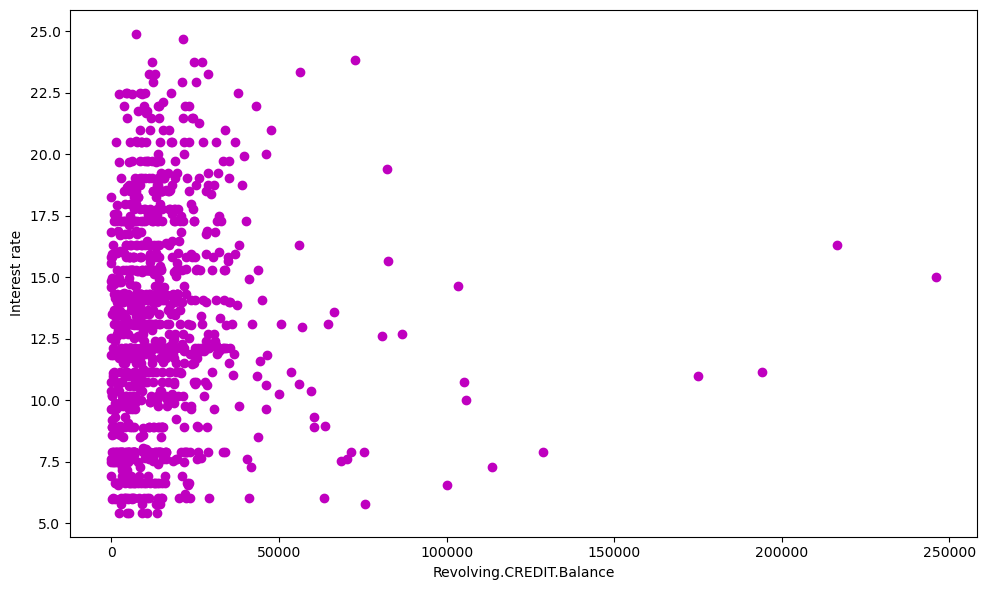

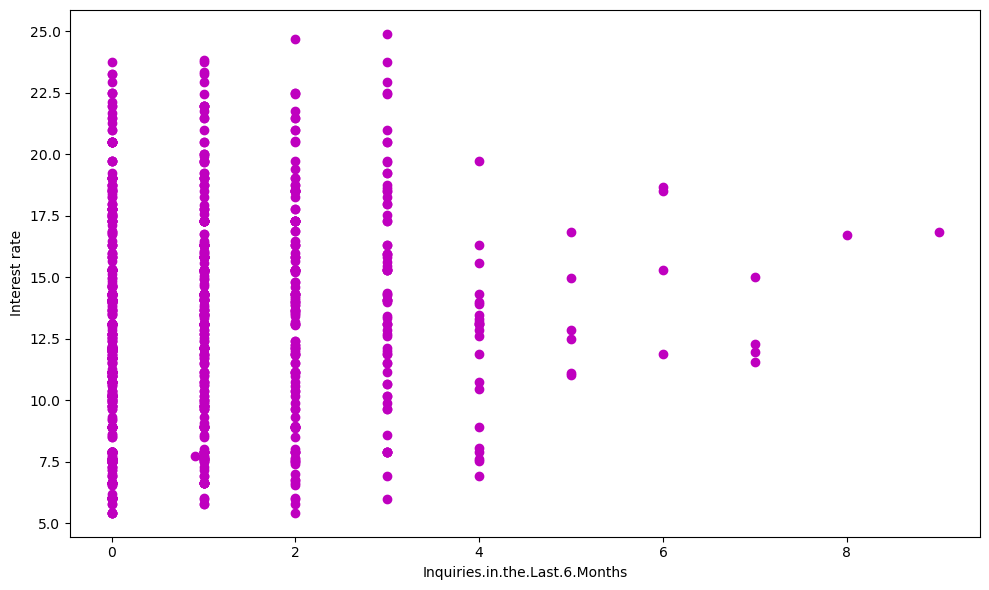

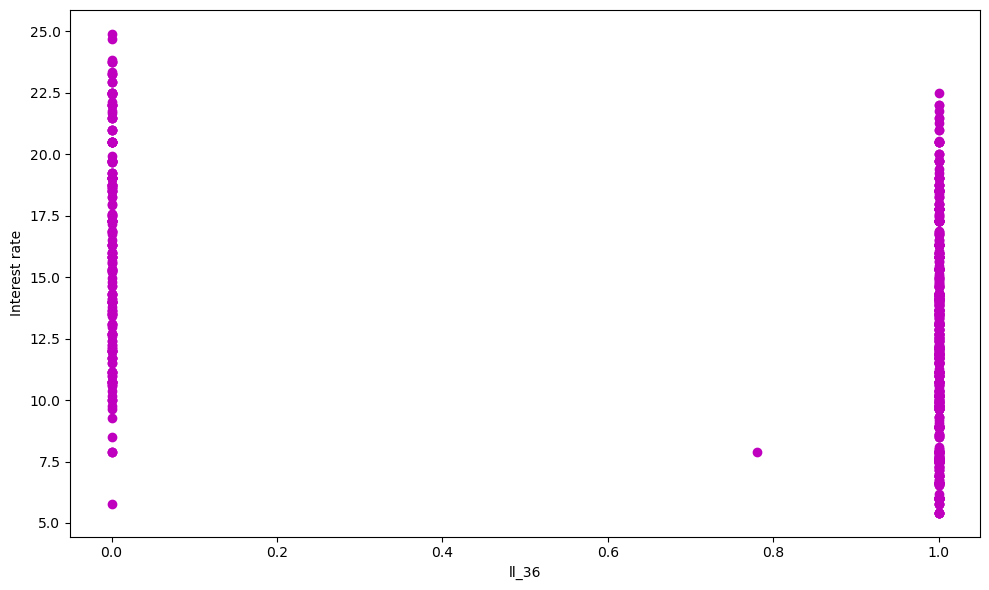

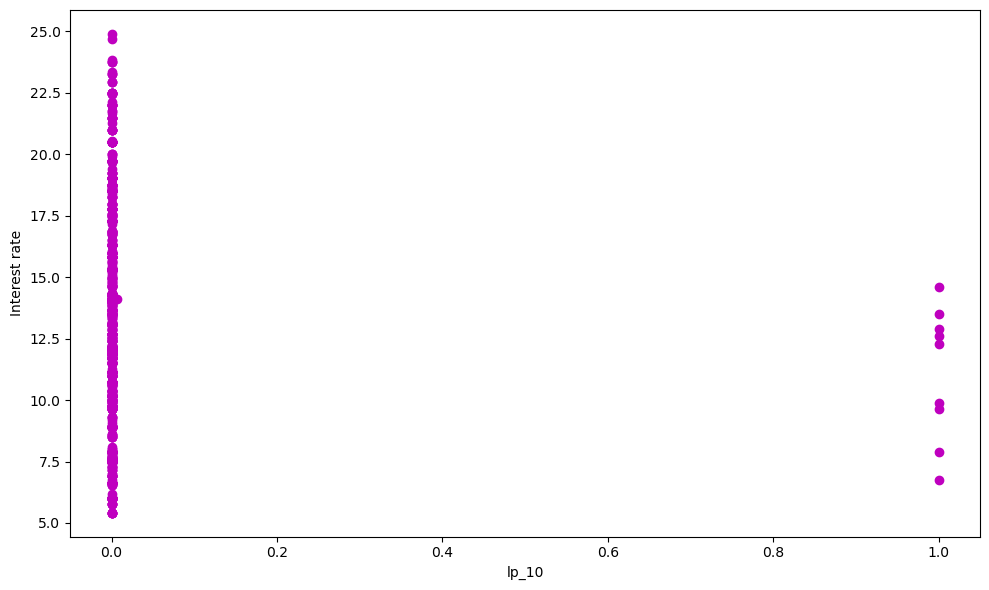

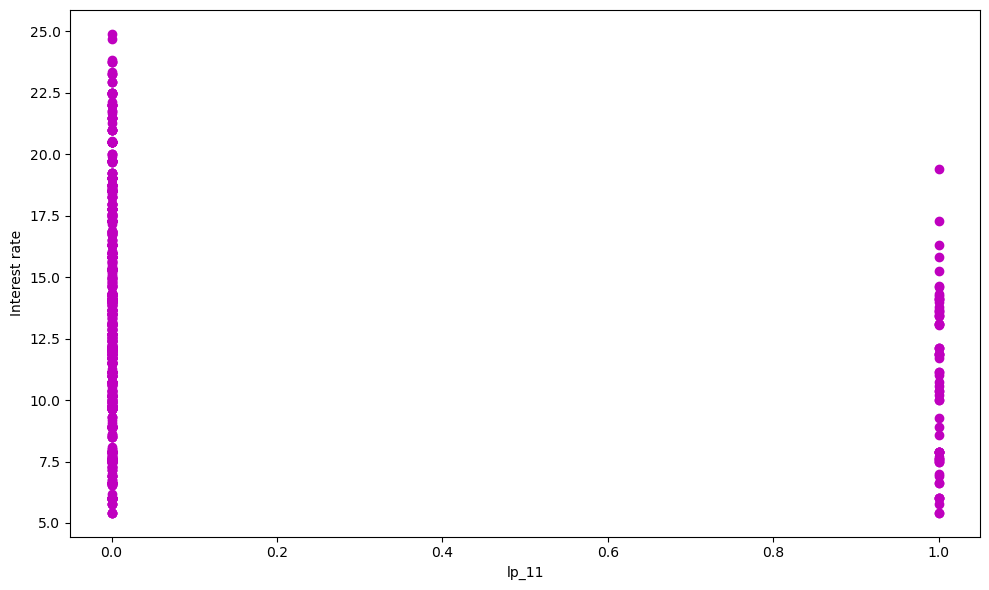

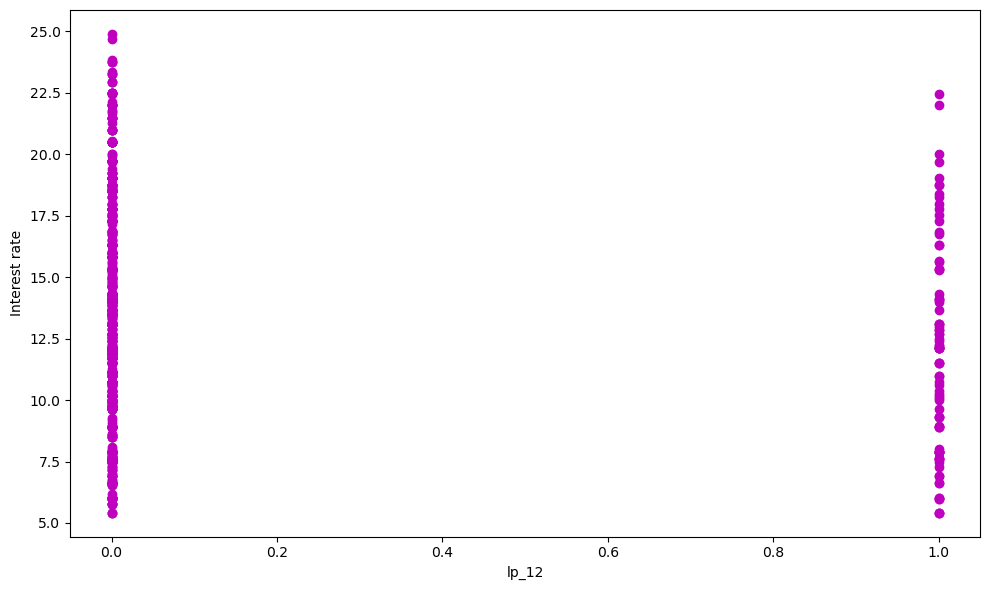

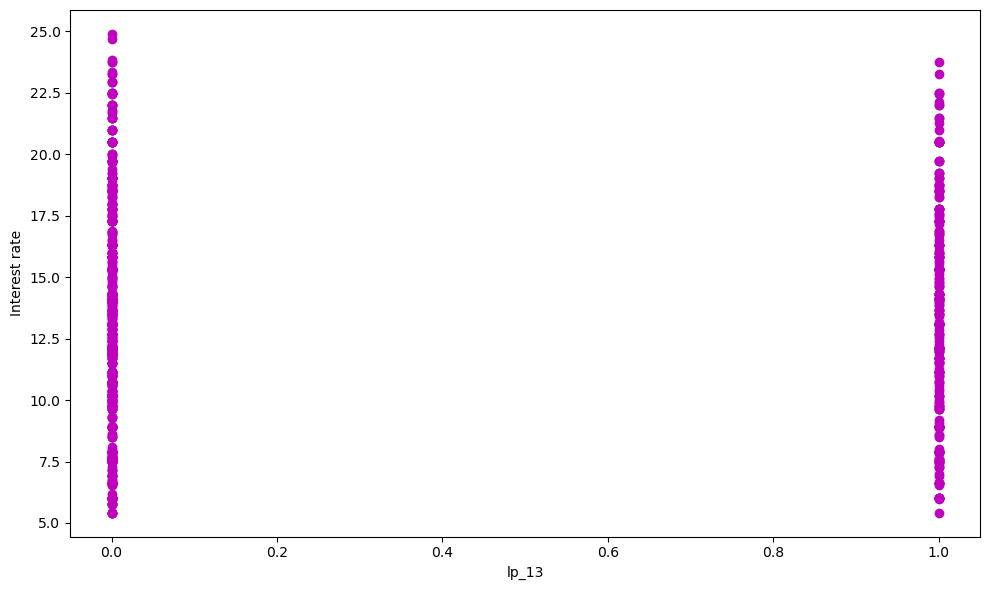

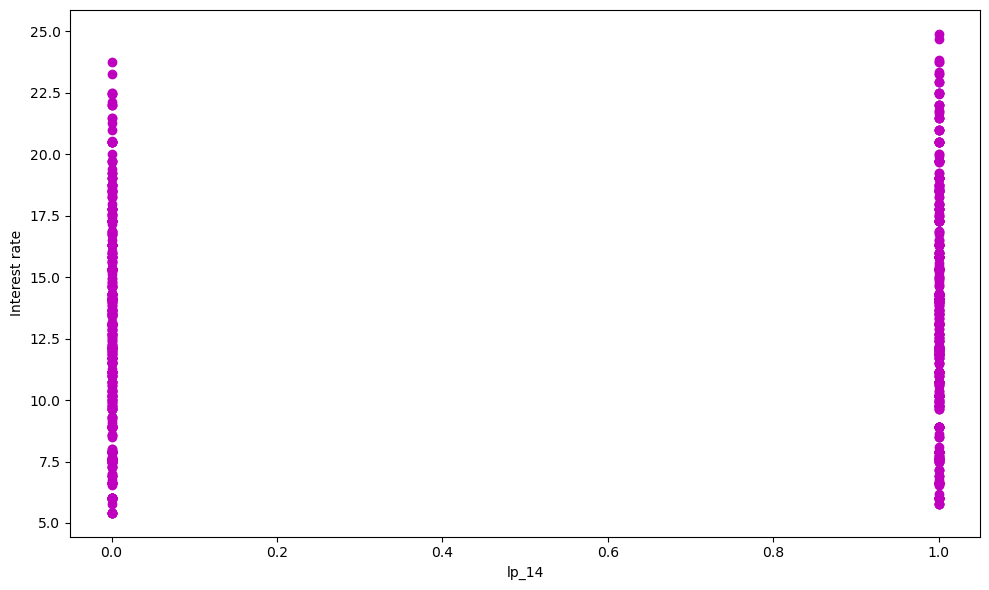

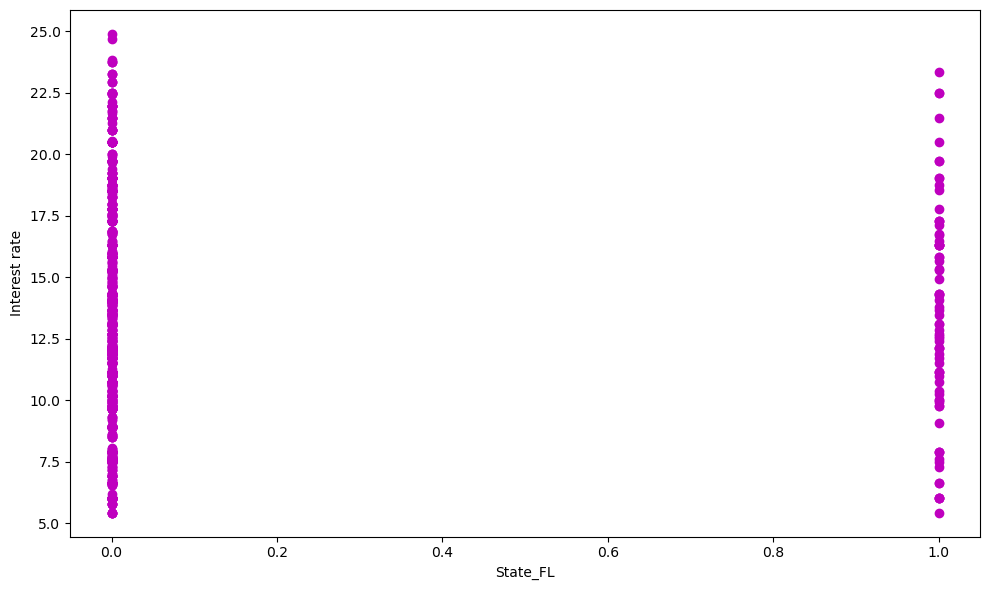

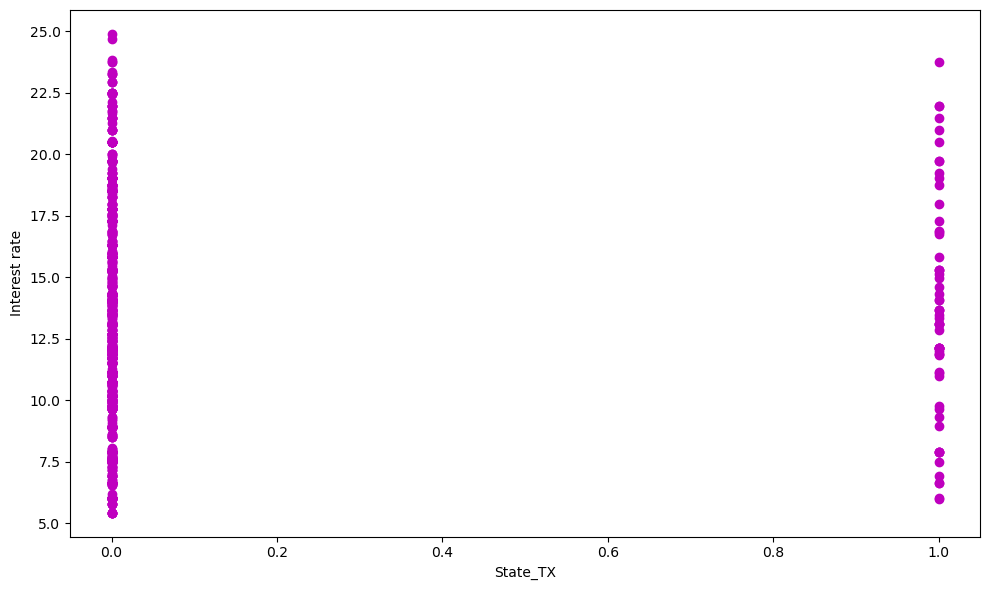

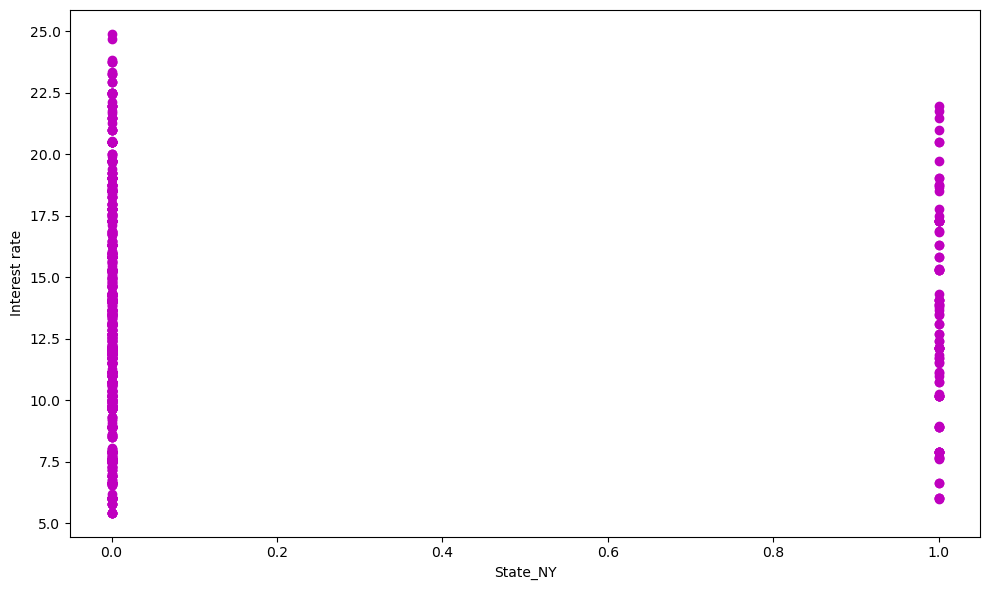

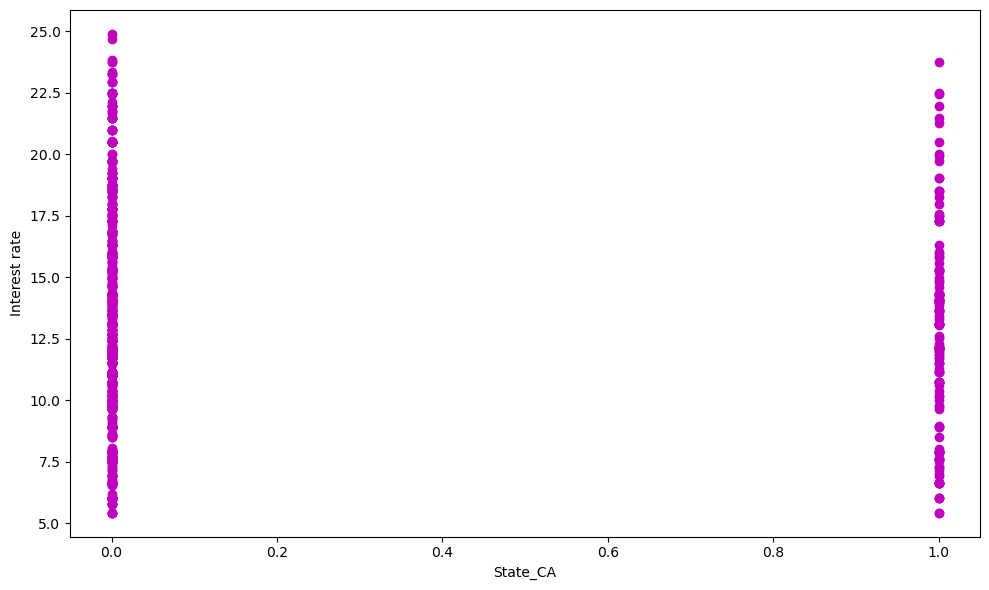

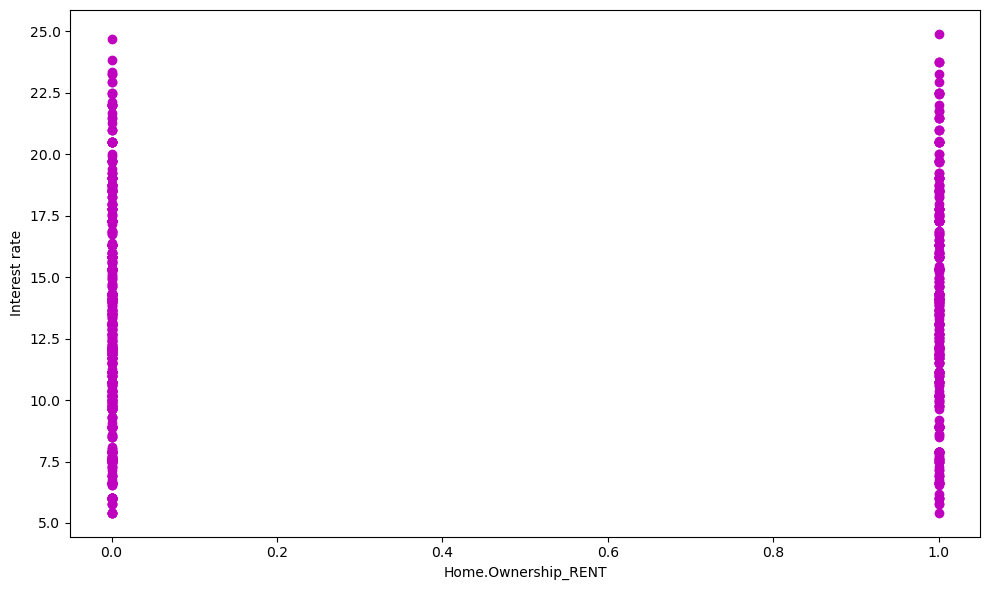

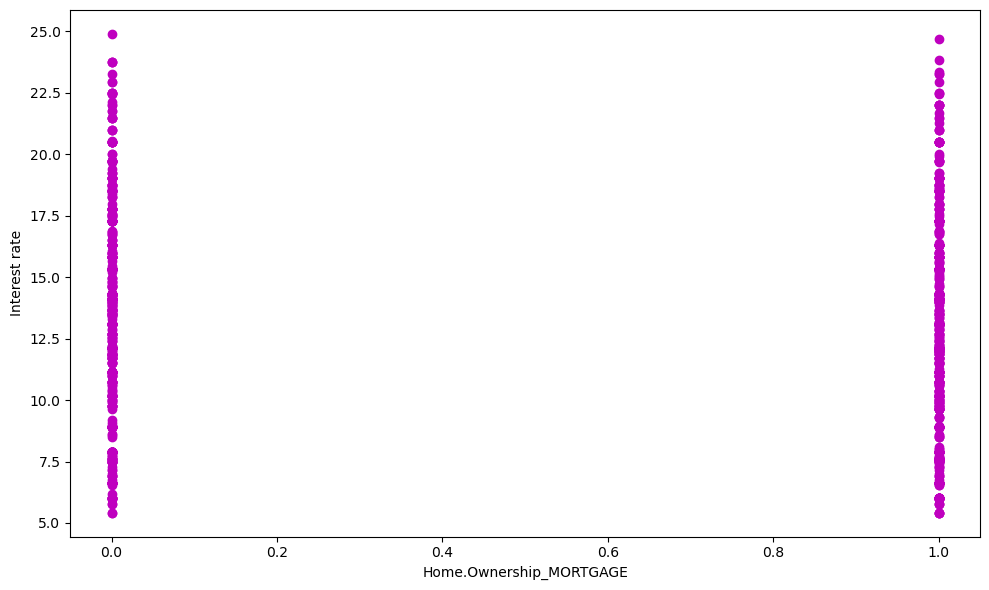

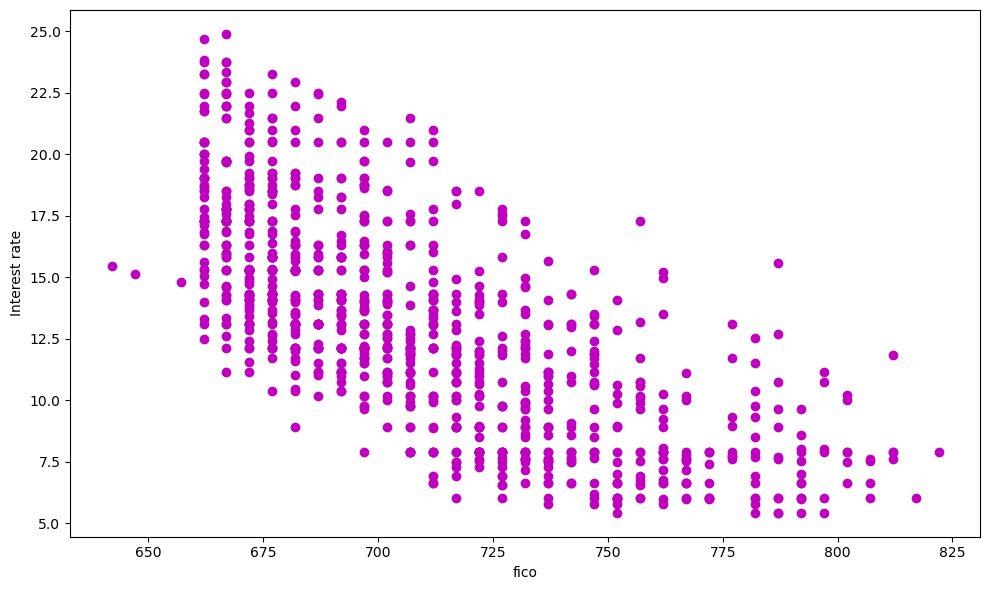

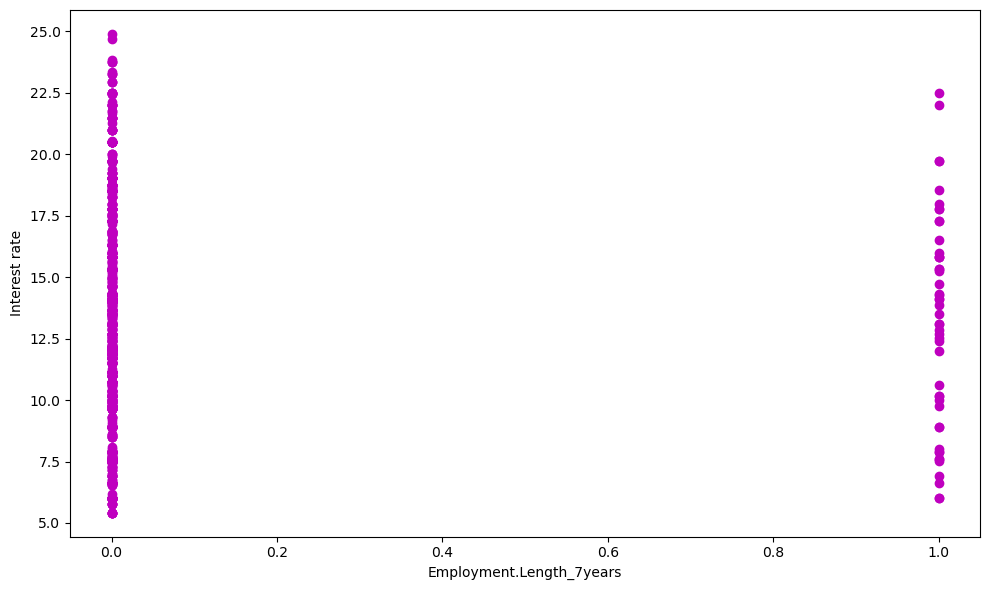

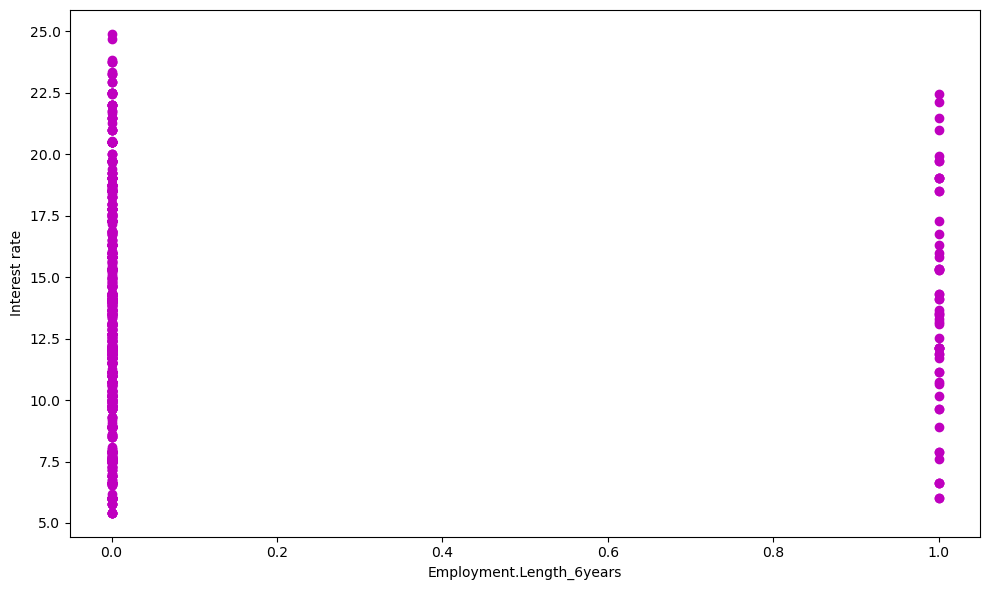

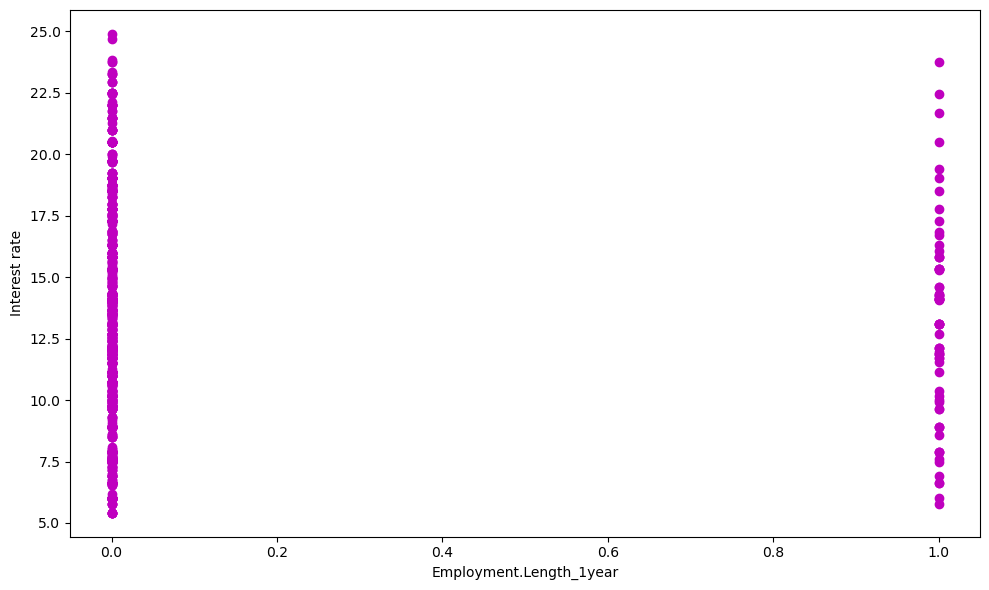

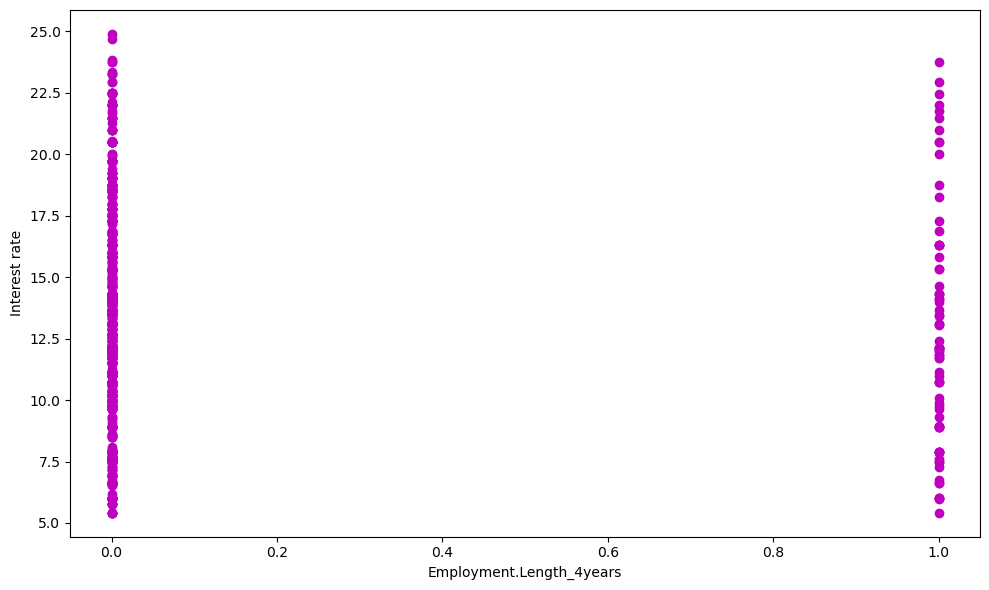

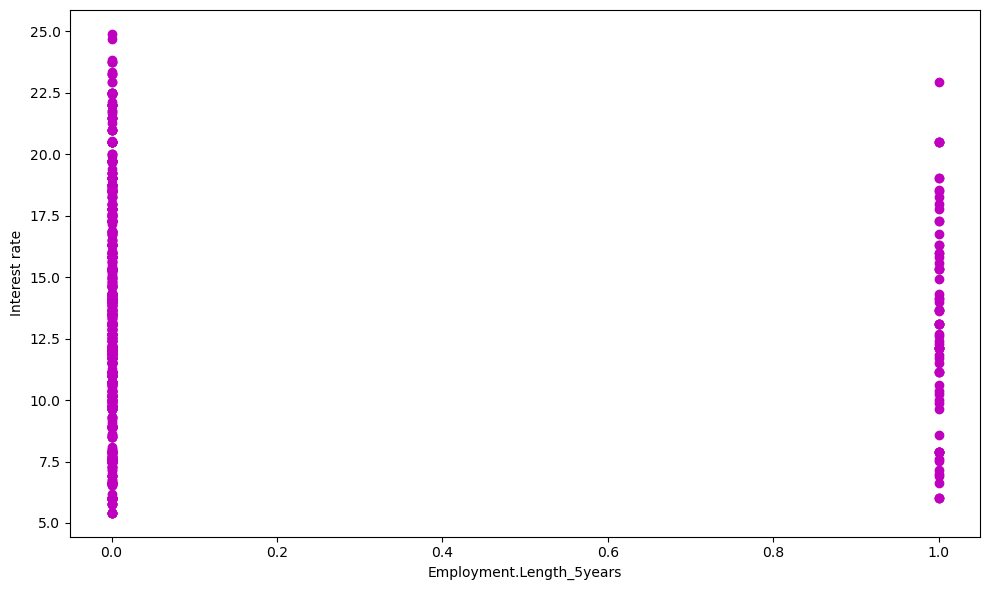

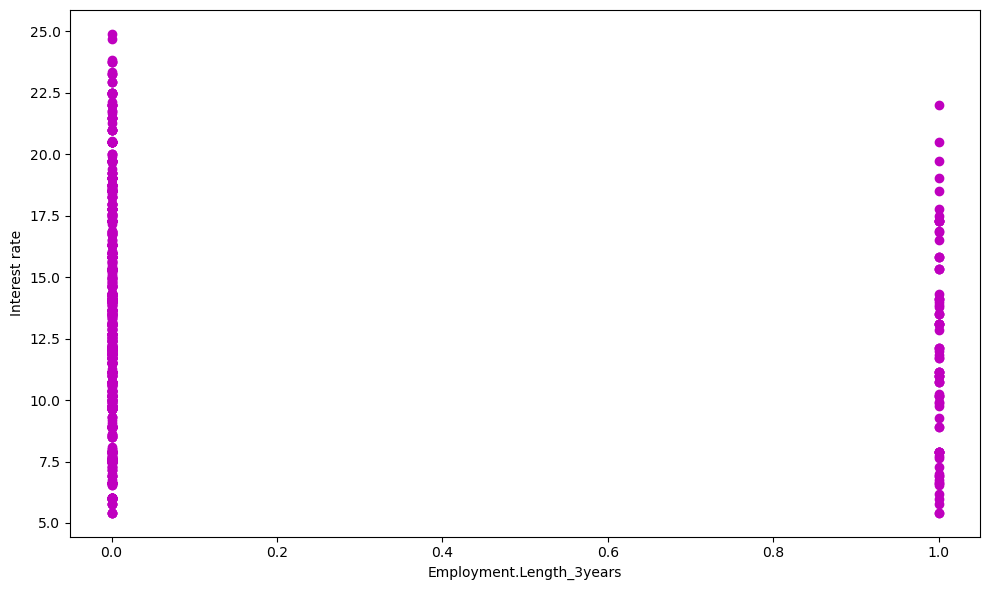

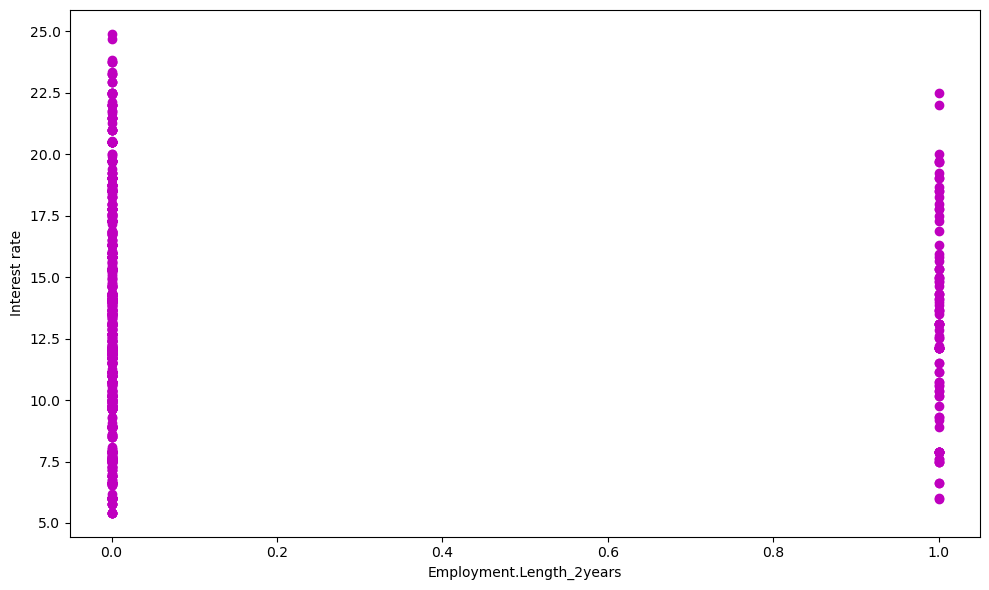

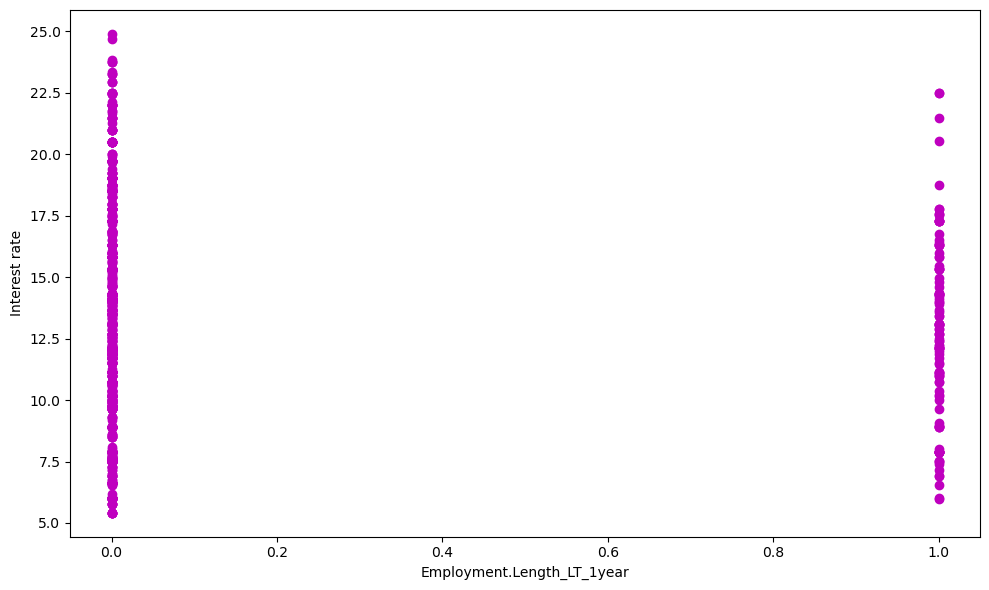

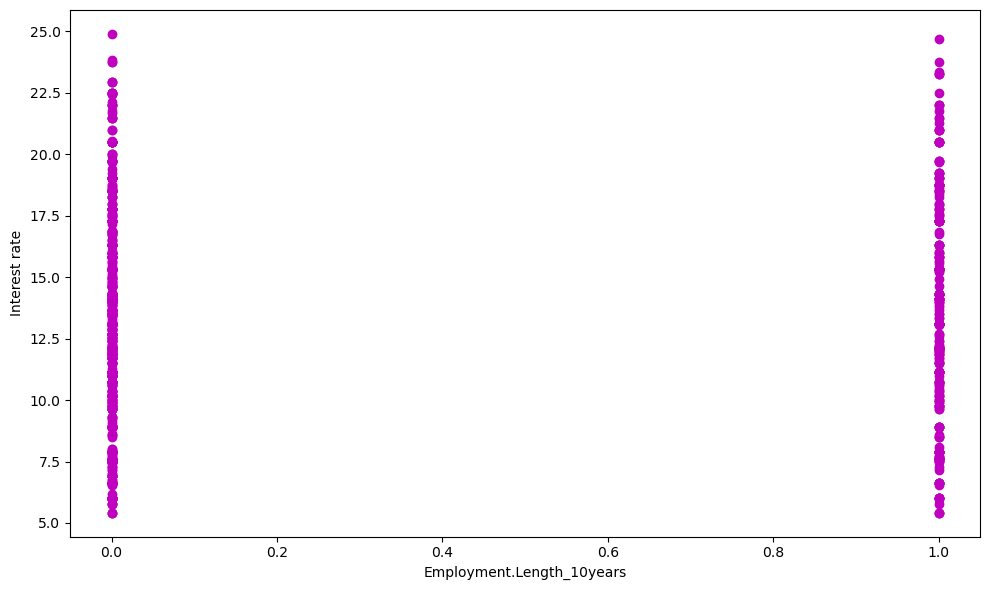

In [29]:
# Plotting relationship between target and each feature for the first thousand row

for i in X_train.columns[1:]:
    plt.figure(figsize=(10,6))
    plt.scatter(X_train[i][:1001], y_train[:1001], c = 'm')
    plt.xlabel(i)
    plt.ylabel('Interest rate')
    plt.tight_layout()
    plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Initializing scaler to normalize features
scaler = StandardScaler()

In [32]:
# Normalizing features

X_train_reg = scaler.fit_transform(X_train)
X_test_reg = scaler.fit_transform(X_test)
X_val_reg = scaler.fit_transform(X_valid)

In [33]:
# Function to visualize data evaluation for the first 1000 variables

def plot_predictions(test_data, test_labels, predictions):
    for i in test_data.columns[1:]:
        plt.figure(figsize=(10,6))
        plt.scatter(test_data[i][:1001], test_labels[:1001], c = 'm', label = 'Testing data')
        plt.scatter(test_data[i][:1001], predictions[:1001], c = 'g', label = 'Predictions')
        plt.xlabel(i)
        plt.ylabel('price')
        plt.tight_layout()
        plt.legend()
        plt.show()

In [34]:
# Function to calculate mean absolute error

def absolute_error(y_test, pred):
    mae = tf.metrics.mean_absolute_error(y_true = tf.squeeze(tf.constant(y_test)),
                               y_pred = tf.squeeze(pred))
    return mae.numpy()


In [35]:
# Function to calculate mean squared error

def squared_error(y_test, pred):
    mse = tf.metrics.MSE(y_true = tf.squeeze(tf.constant(y_test)),
                               y_pred = tf.squeeze(pred))
    return mse.numpy() 

### Experimenting models

#### Model 1

In [36]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Creating model

Credit_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, name = 'Output_layer')],
    name = 'Credit_model')

In [38]:
# Compiling model

Credit_model.compile(loss = tf.keras.losses.mae,
                     optimizer = tf.keras.optimizers.SGD(),
                     metrics = ['mae'])

In [40]:
# Fitting model

history_I = Credit_model.fit(X_train_reg, y_train, epochs = 100, verbose = 0)

In [42]:
# Getting model info

Credit_model.summary()

Model: "Credit_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3000      
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Checking model accuracy

Credit_model.evaluate(X_val_reg, y_valid)

14/14 [==============================] - 0s 2ms/step - loss: 1.1443 - mae: 1.1443


[1.144293189048767, 1.144293189048767]

In [44]:
# Predicting on validation set

Validation_pred = Credit_model.predict(X_val_reg)
Validation_pred[:11]

14/14 [==============================] - 0s 1ms/step


array([[16.224634 ],
       [14.42508  ],
       [22.620705 ],
       [11.240145 ],
       [12.356176 ],
       [14.320888 ],
       [17.244919 ],
       [ 9.630826 ],
       [10.577108 ],
       [17.27778  ],
       [ 7.6496663]], dtype=float32)

In [45]:
y_valid.head(10)

Interest.Rate
0          18.49
1          12.23
2          22.47
3          11.89
4          11.14
5          14.09
6          17.27
7           9.88
8          10.00
9          17.27

In [46]:
# Mean absolute error

Cred_abs_err = absolute_error(y_valid, Validation_pred)
Cred_abs_err

1.144293

In [47]:
# Mean squared error

Cred_mean_err = squared_error(y_valid, Validation_pred)
Cred_mean_err

2.5601418

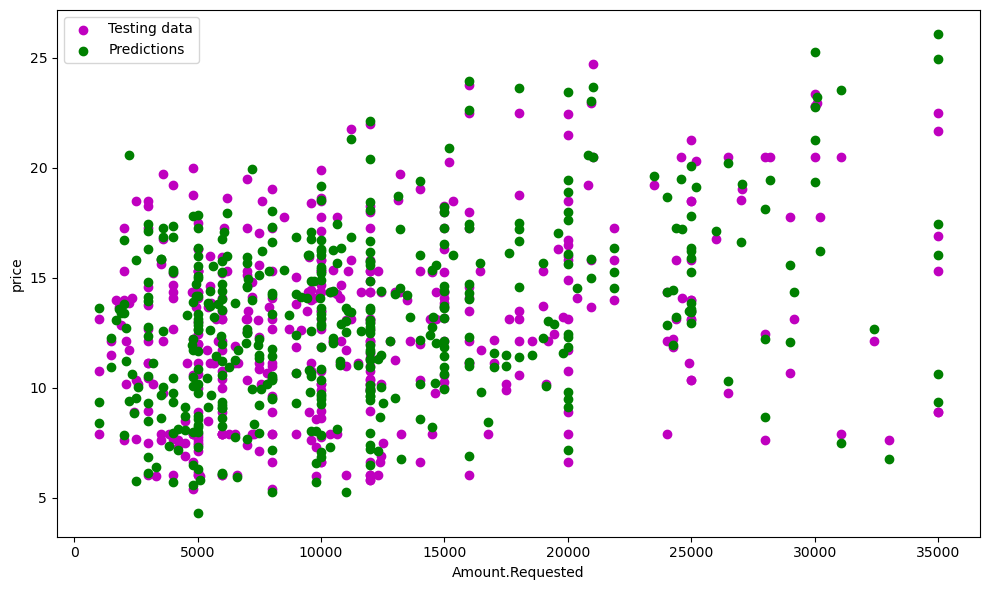

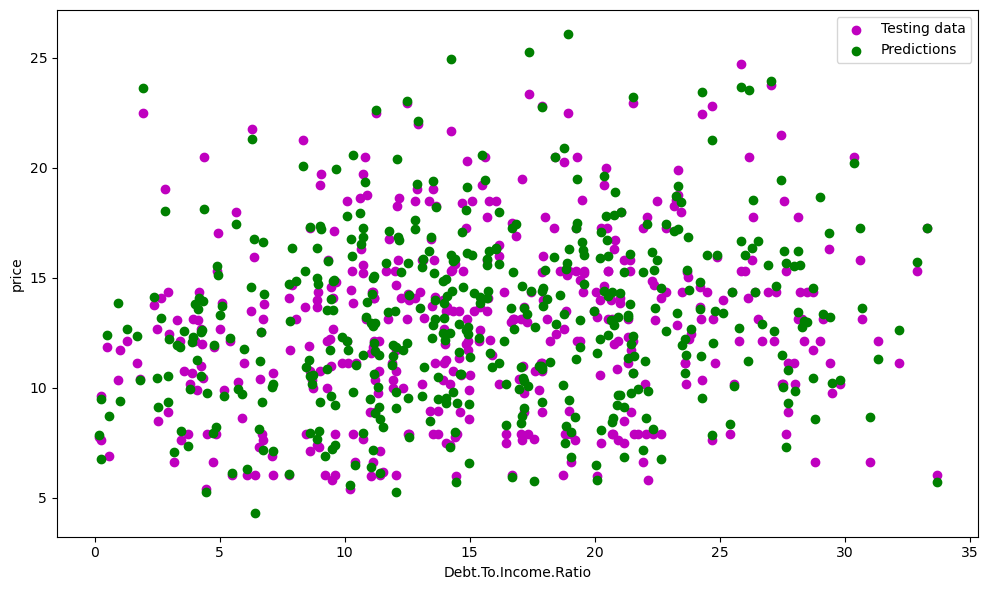

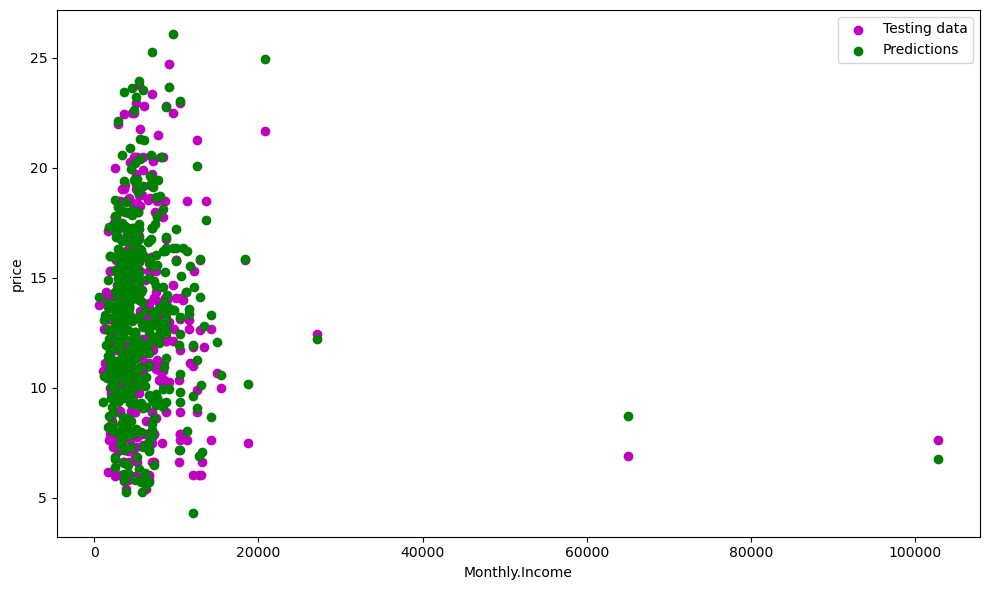

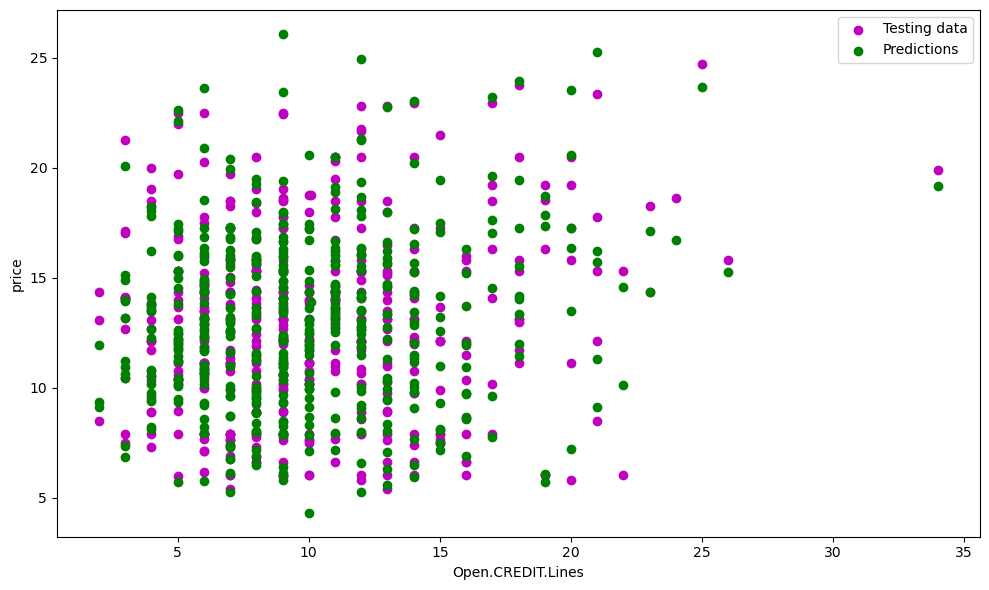

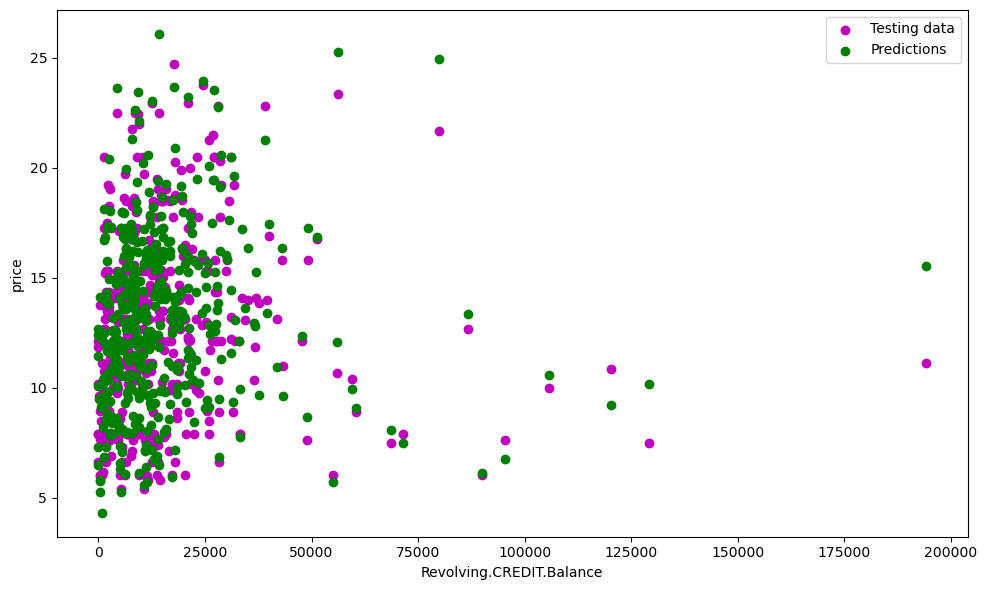

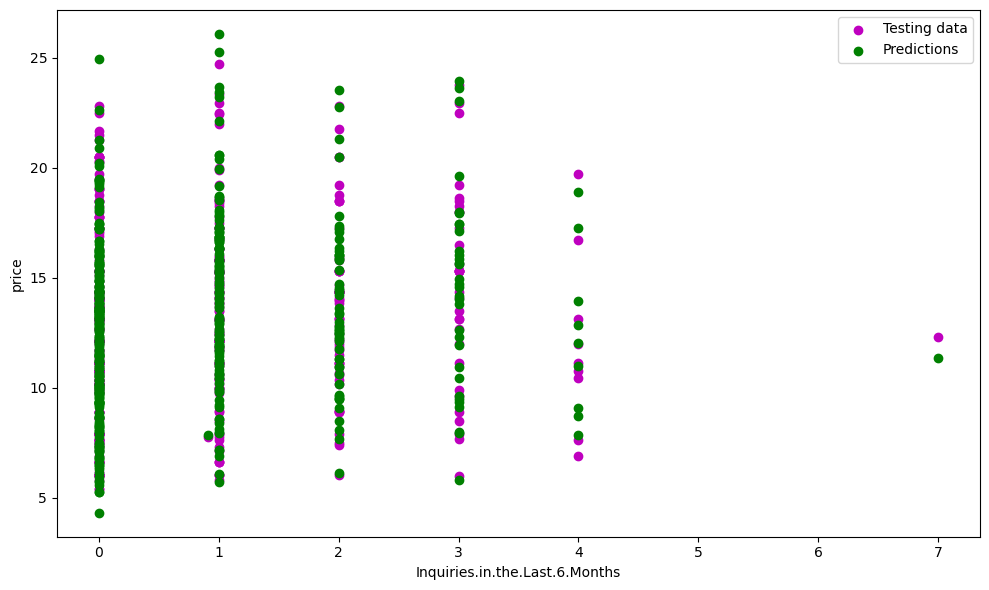

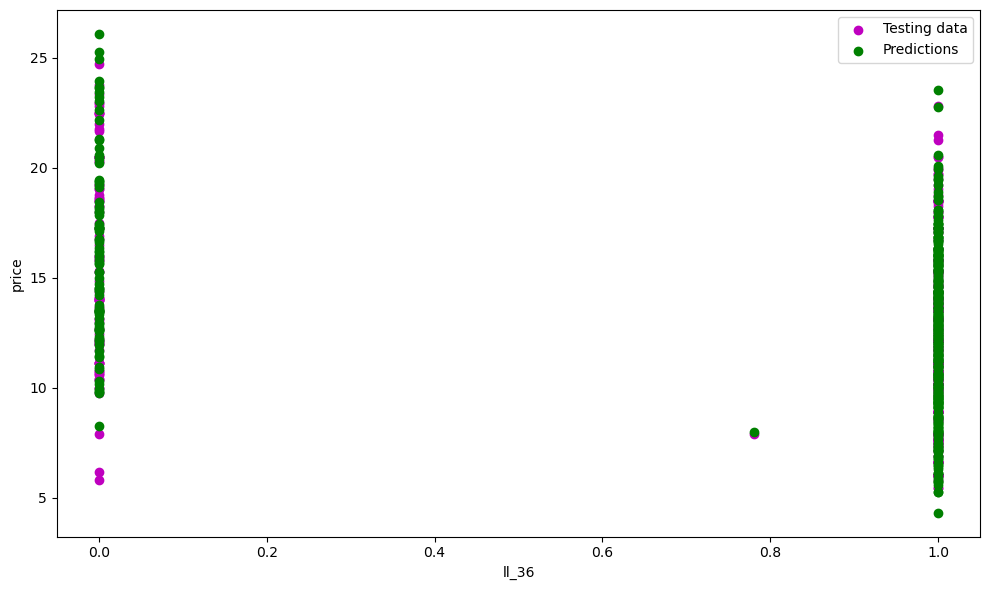

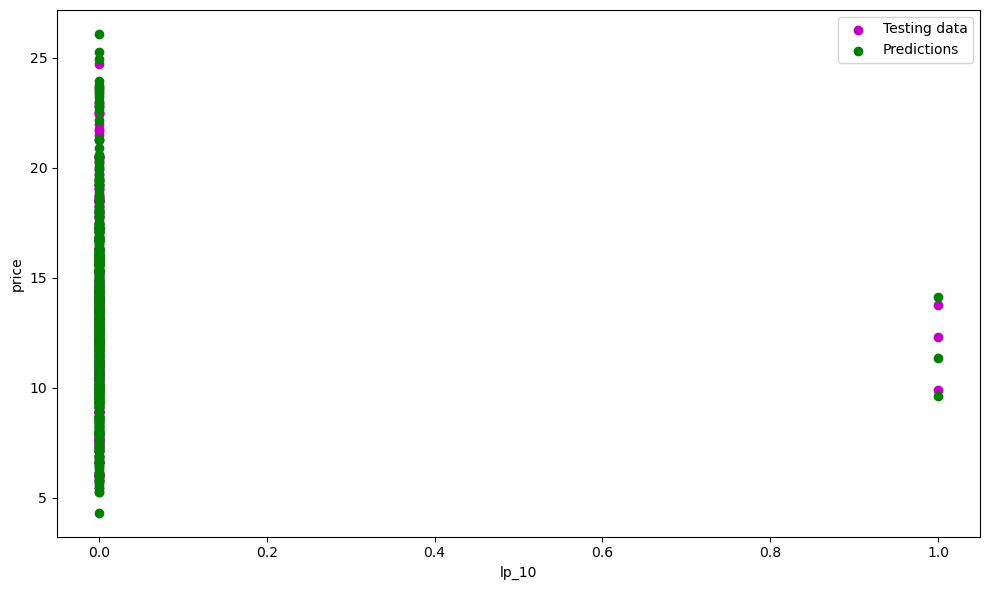

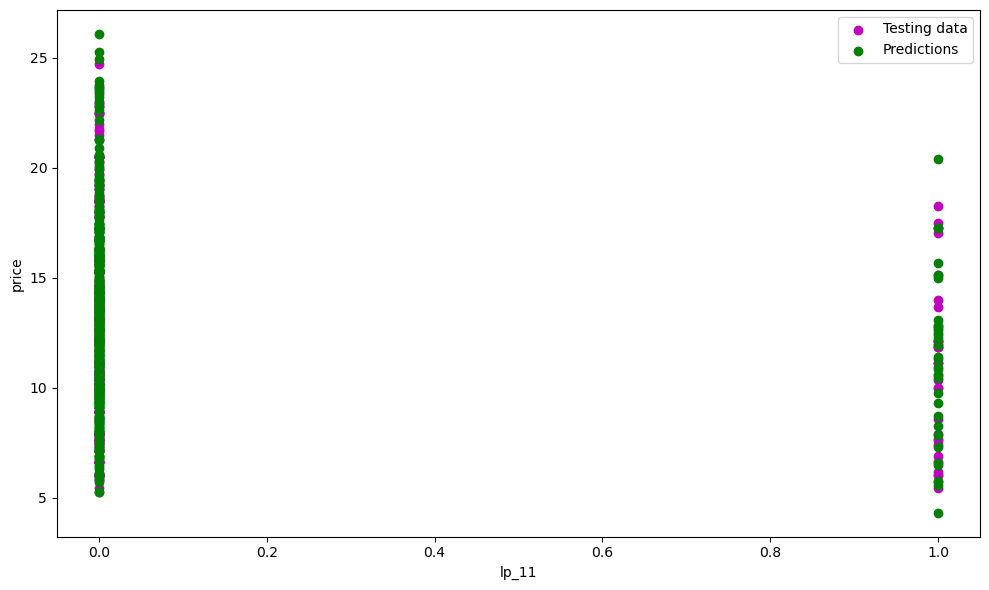

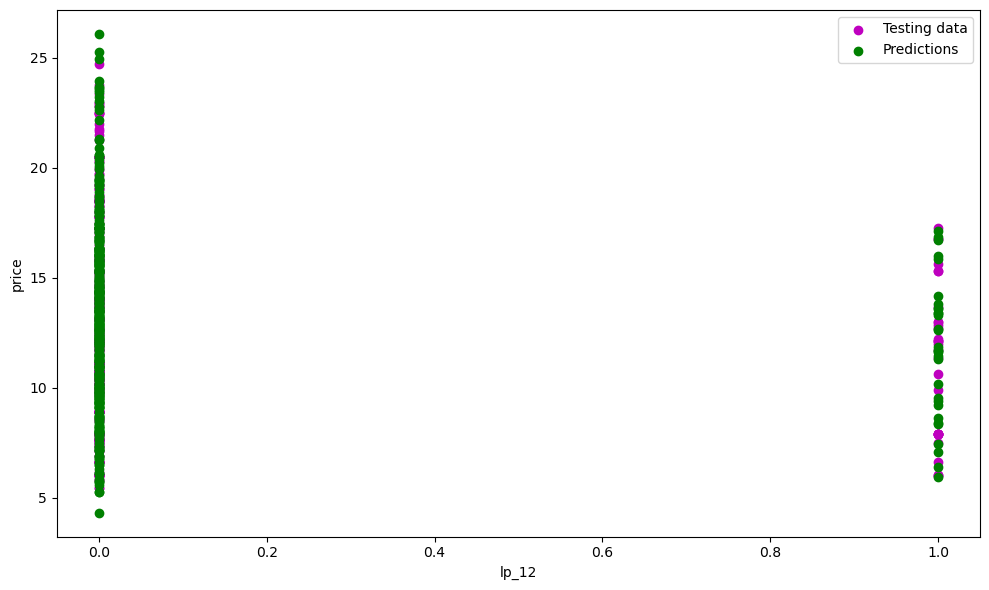

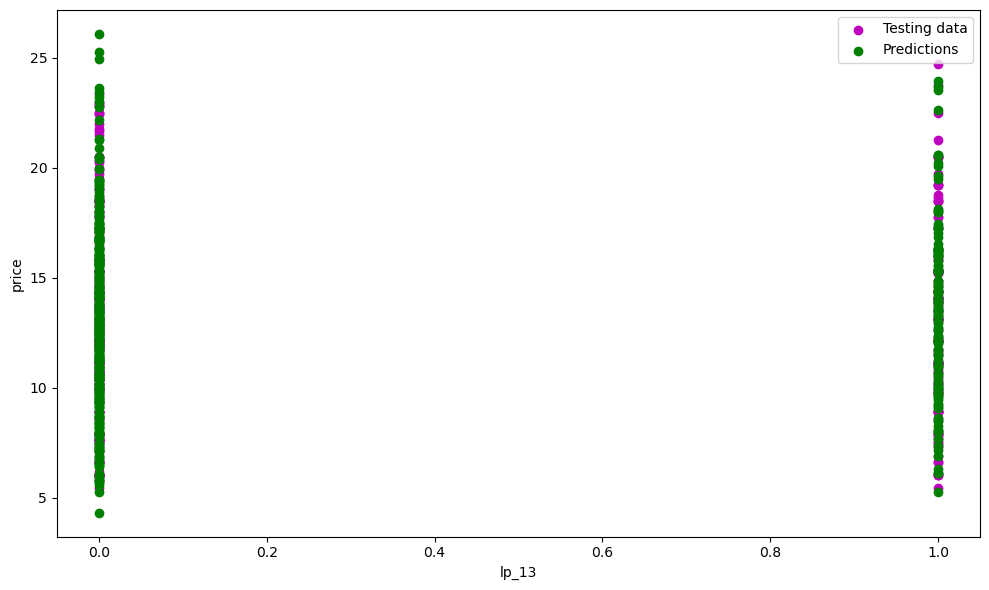

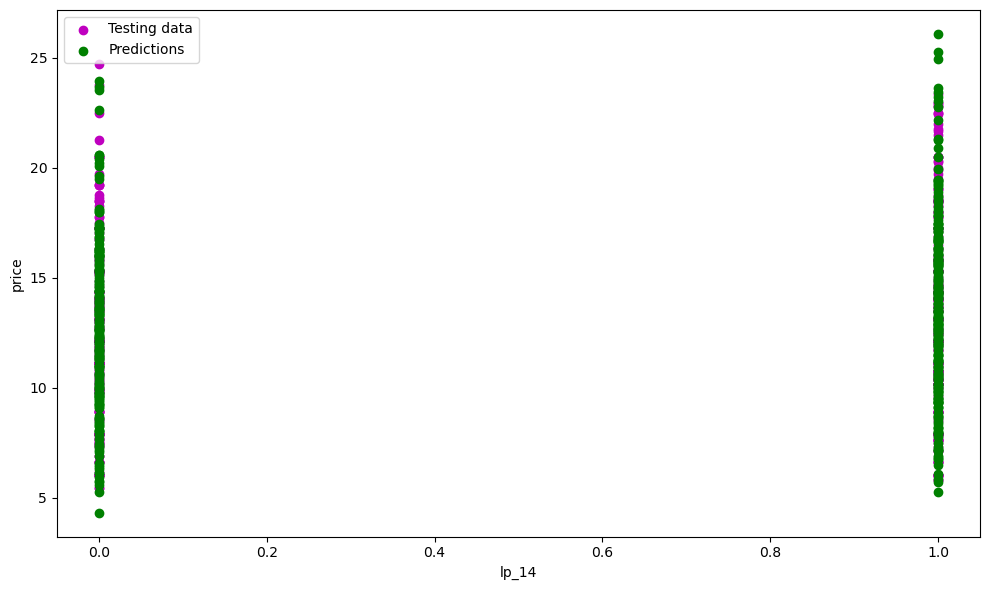

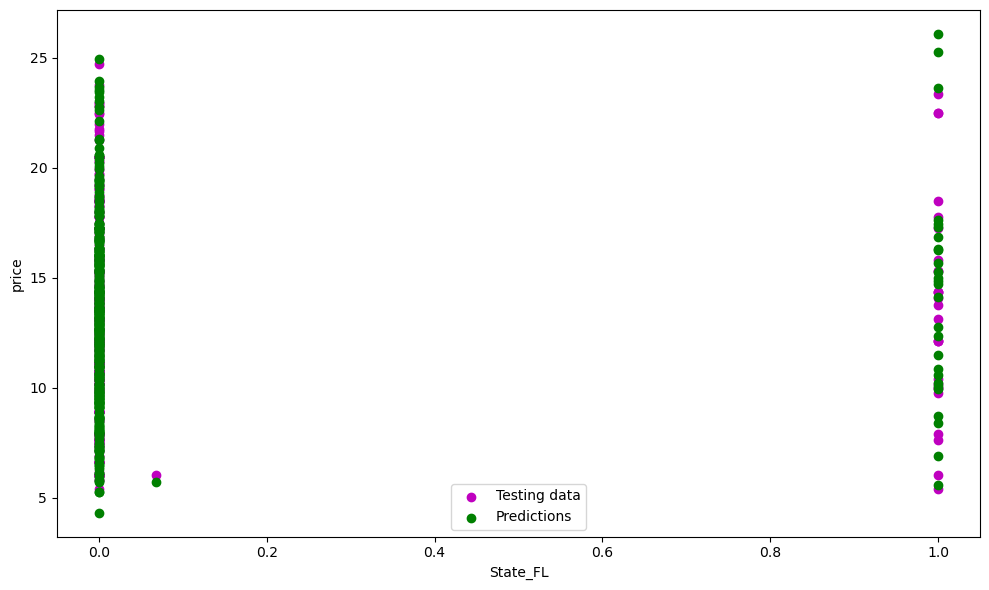

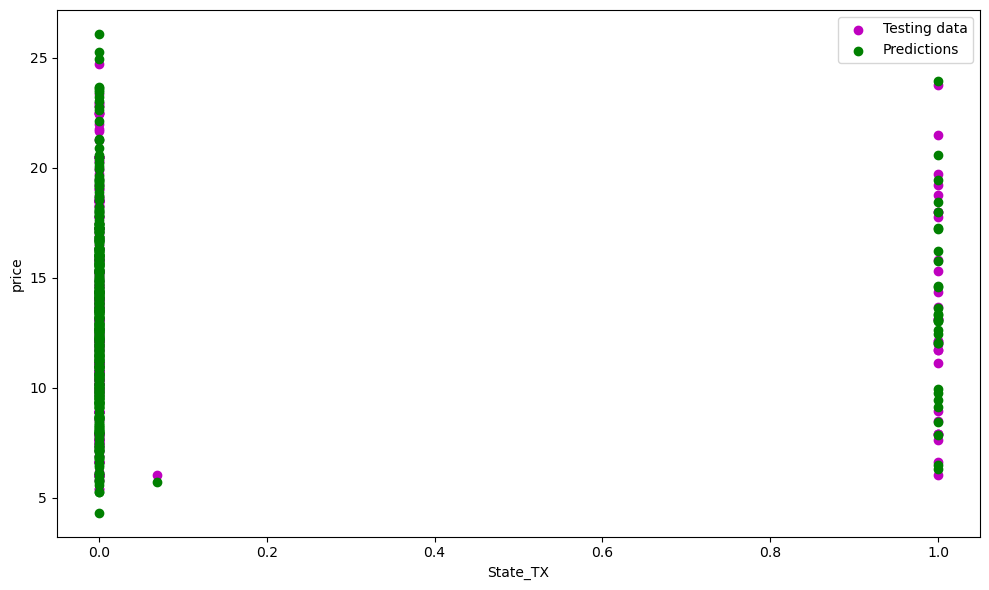

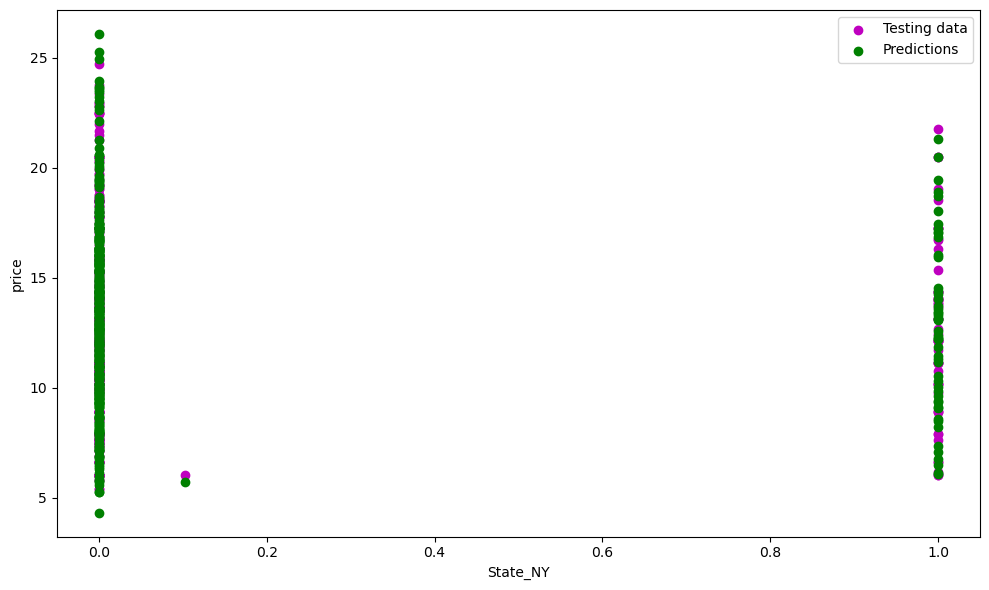

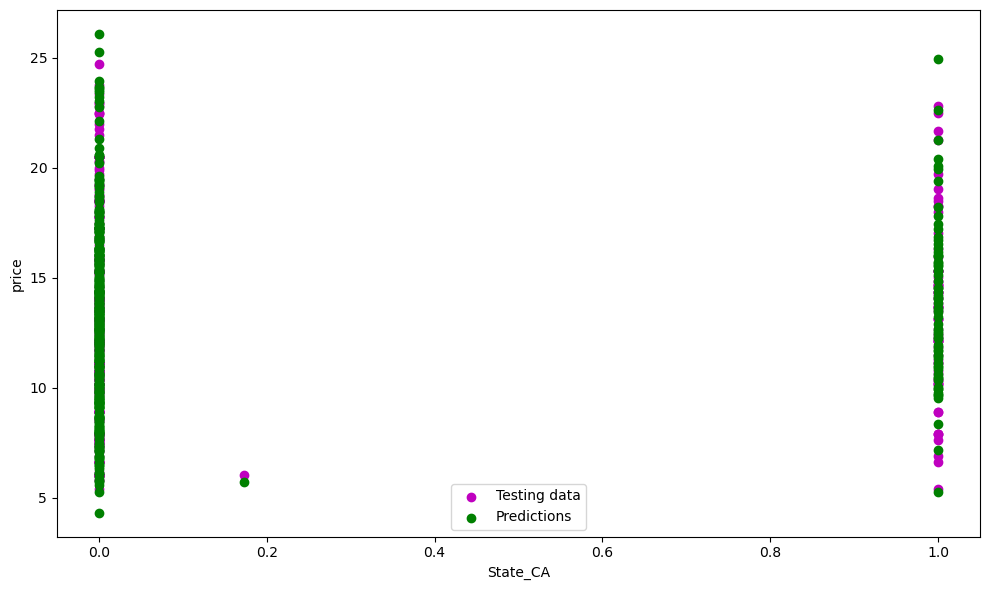

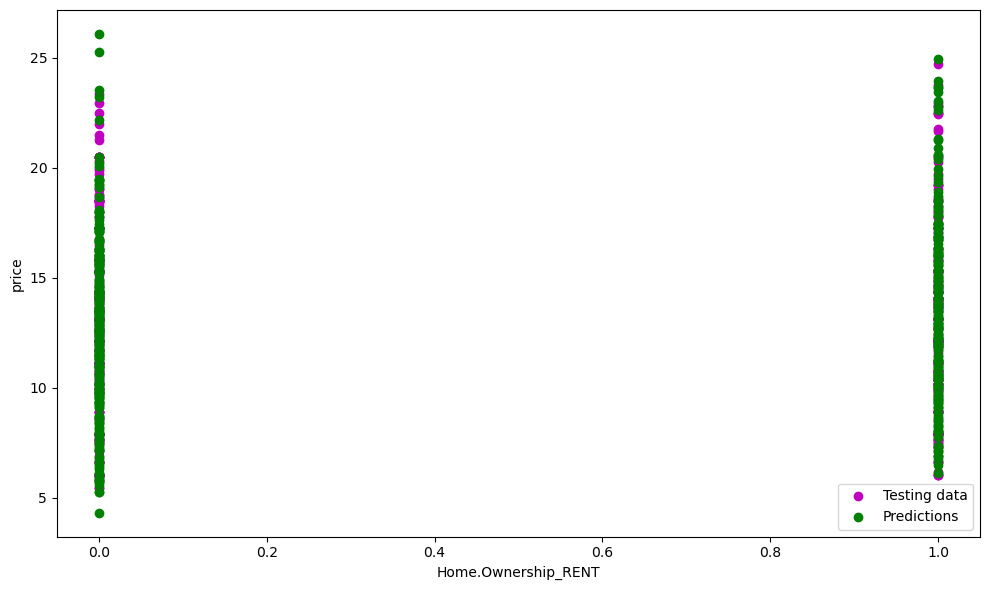

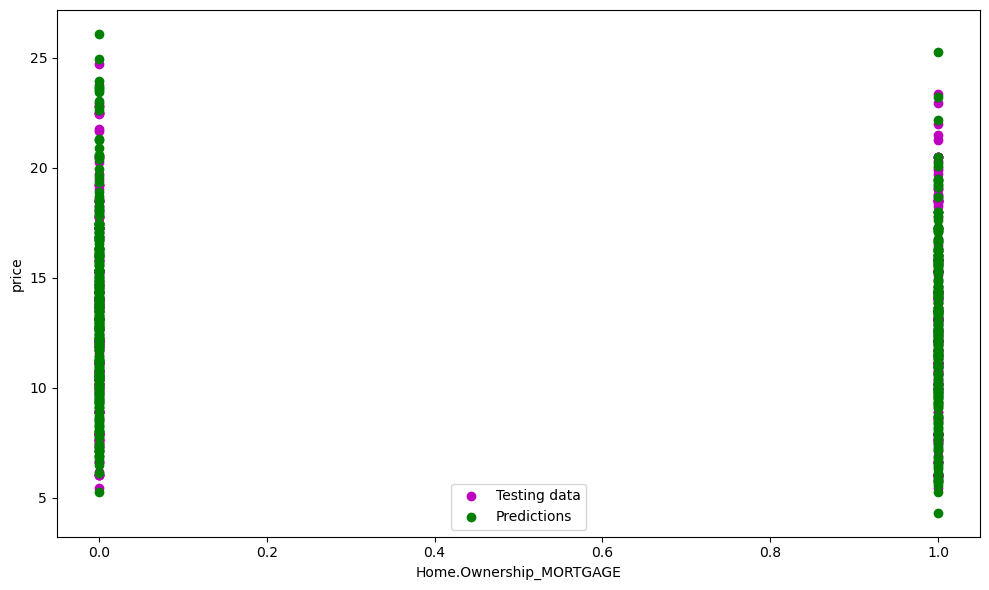

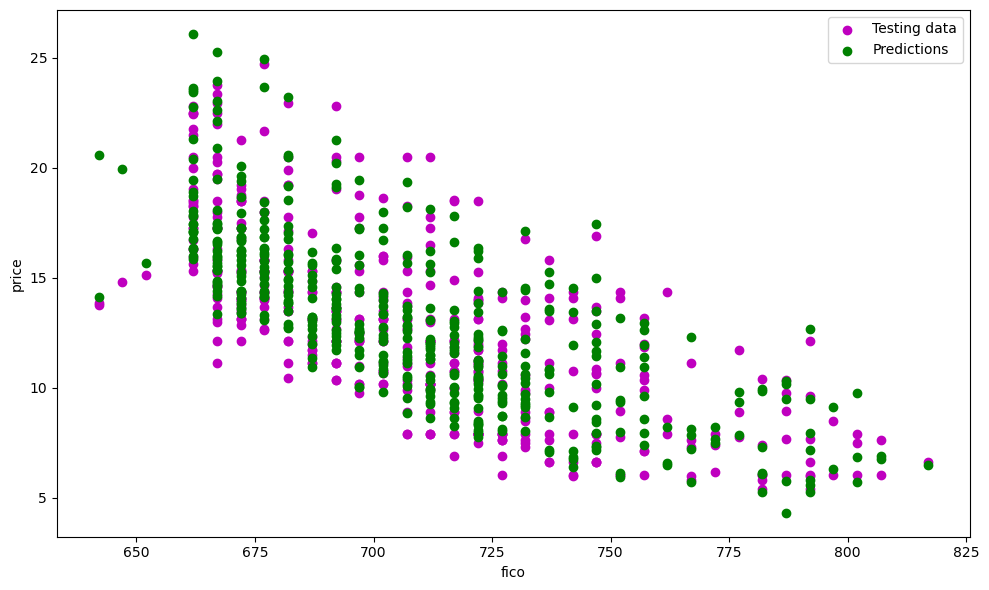

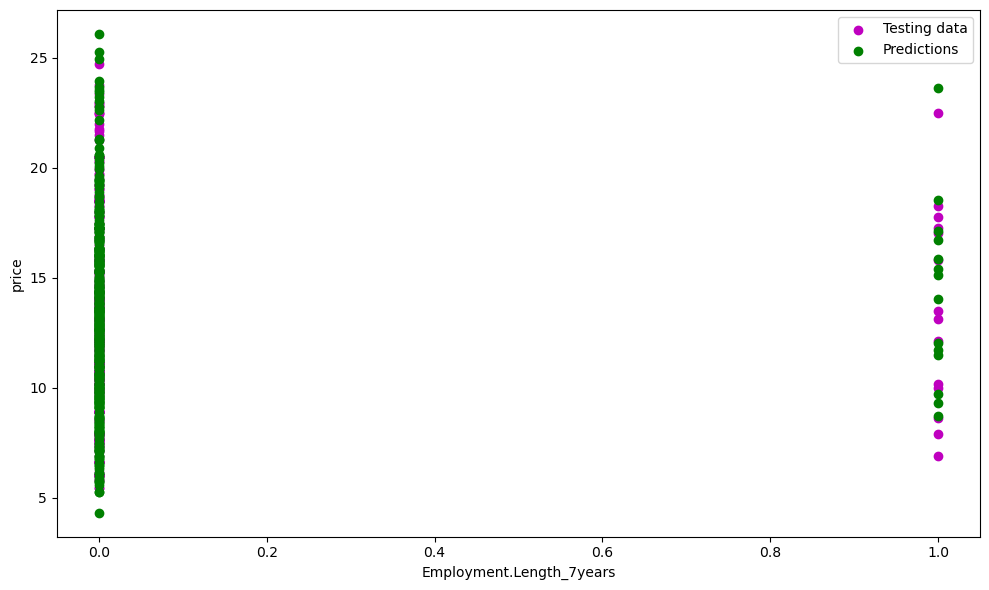

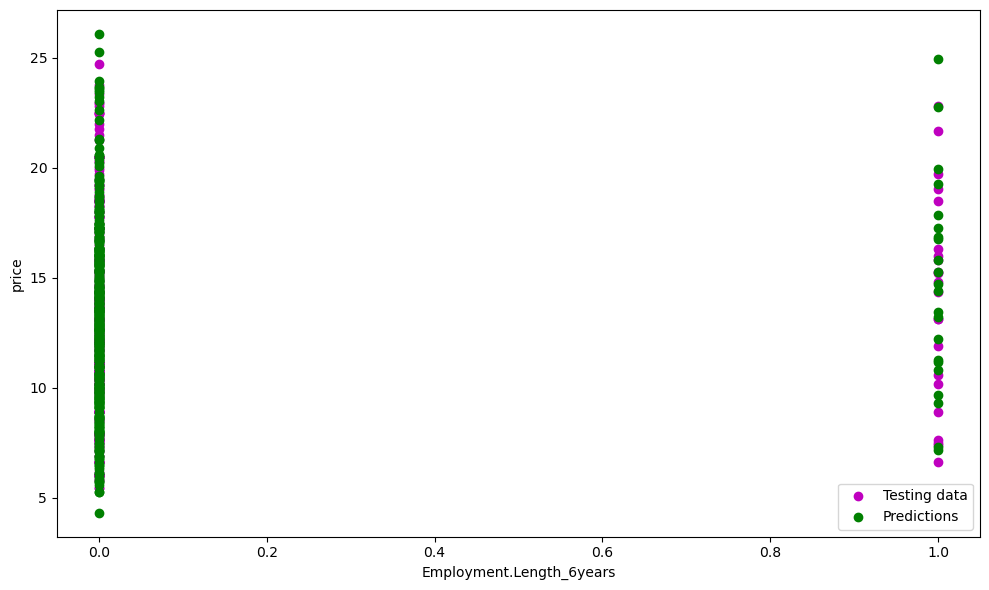

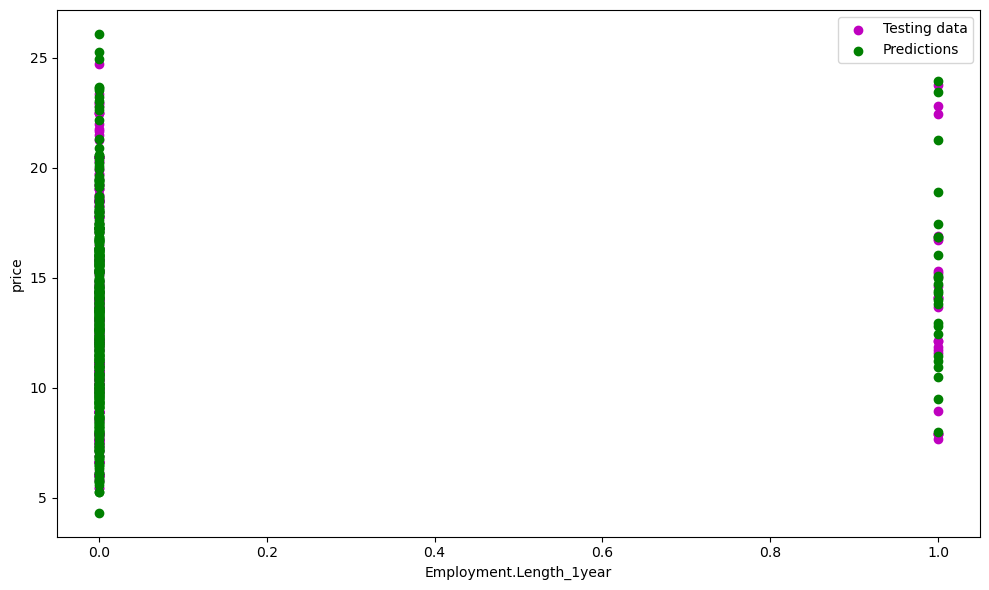

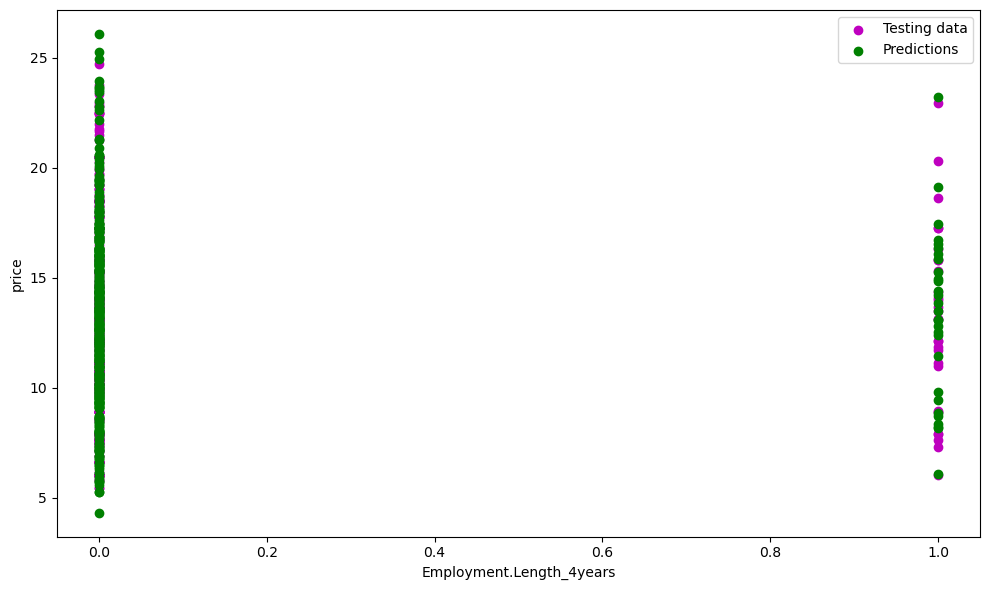

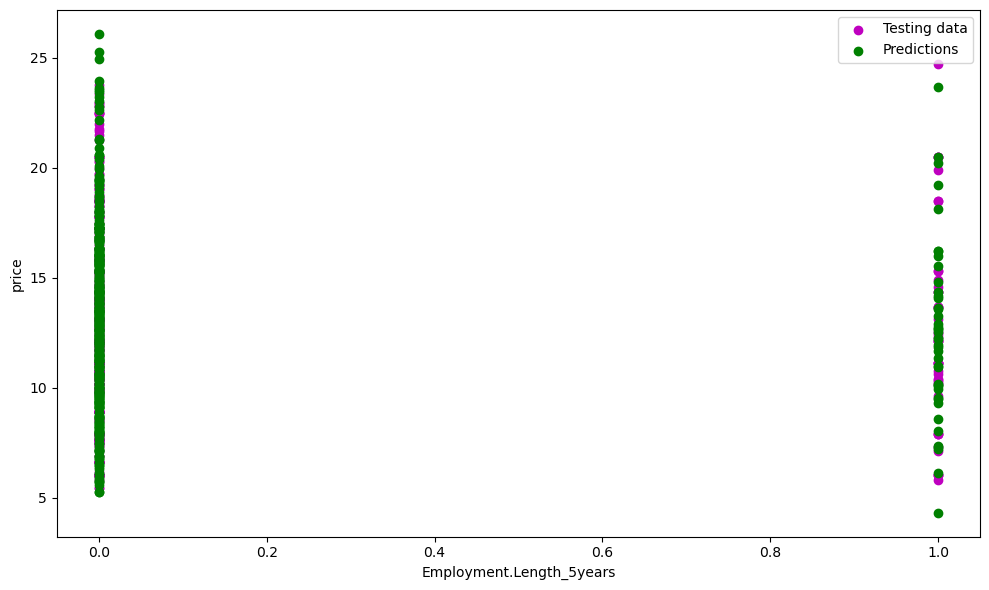

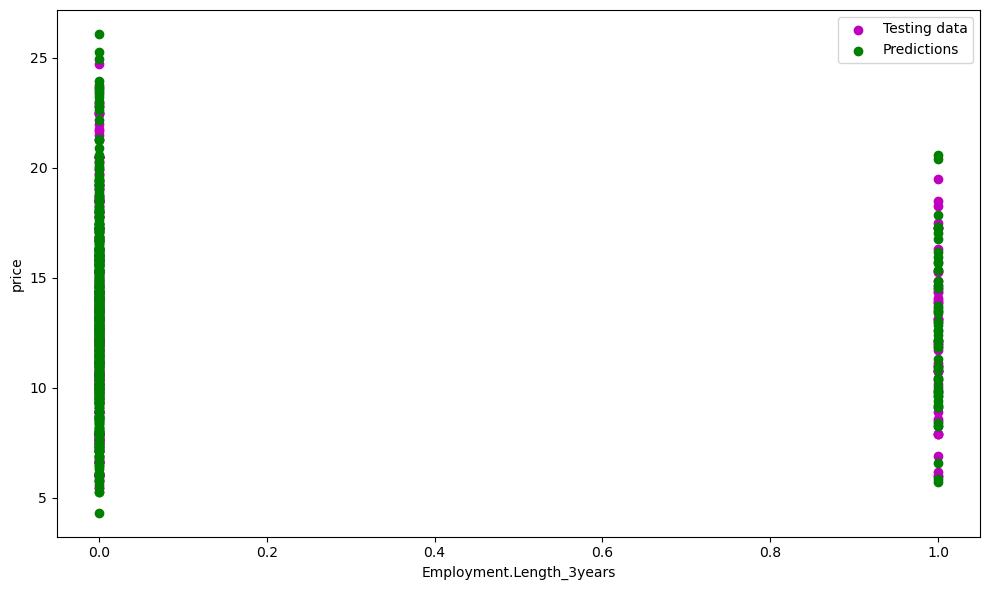

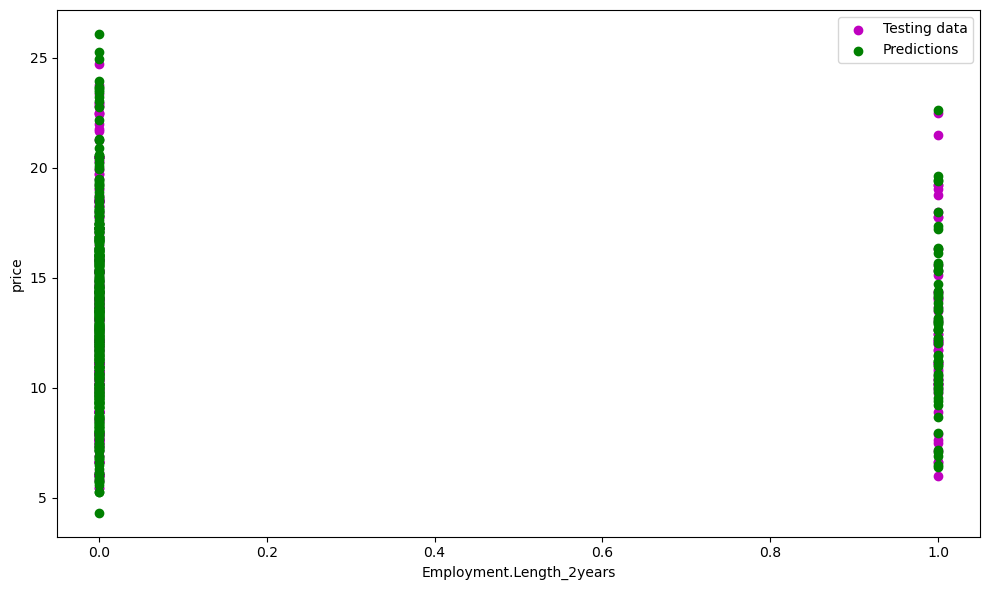

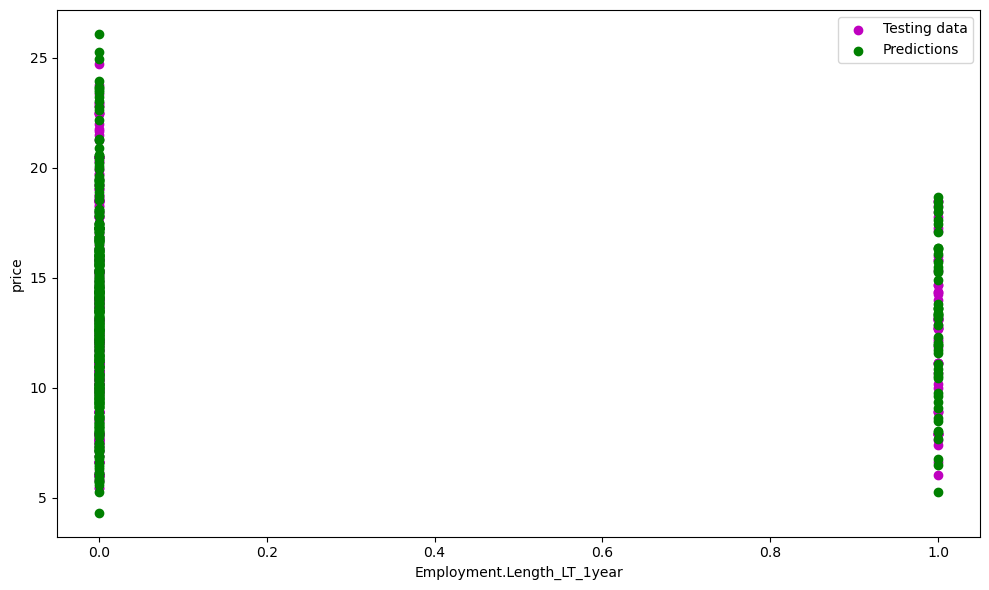

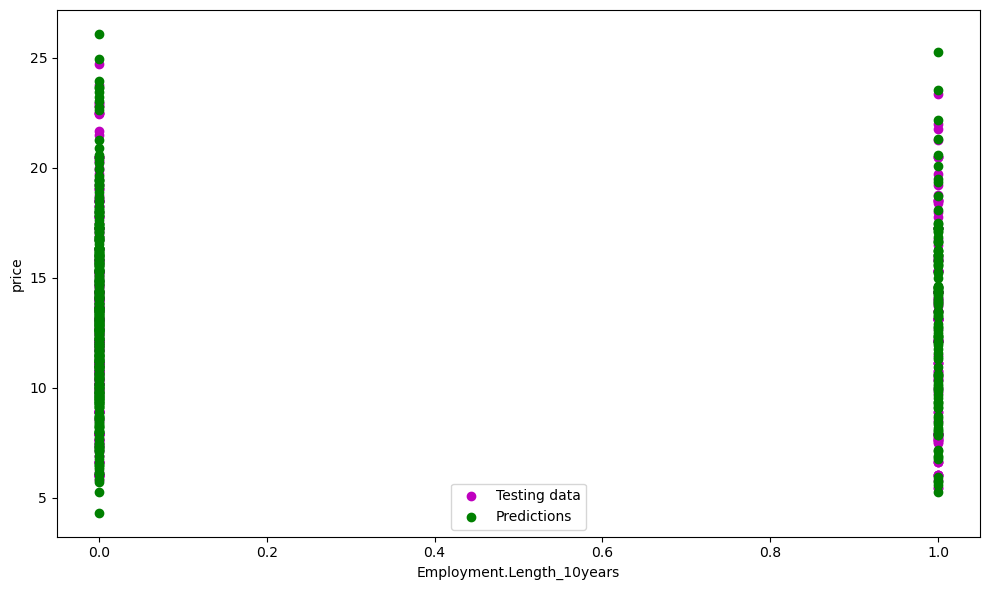

In [48]:
# Checking how our predictions fare

plot_predictions(X_valid, y_valid, Validation_pred)

Text(0.5, 0, 'epochs')

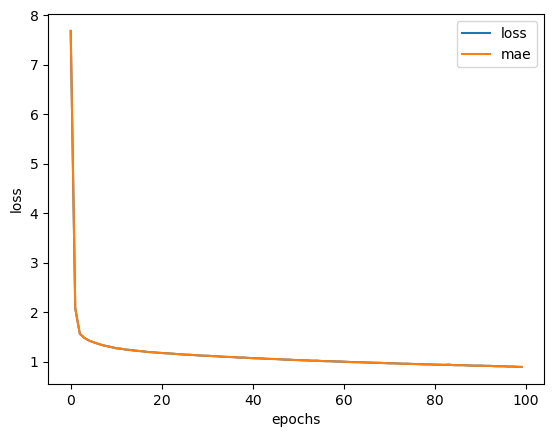

In [49]:
# Plotting how the model improves its accuracy in training

pd.DataFrame(history_I.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

#### Model 2

In [50]:
tf.random.set_seed(42)

# Creating model

Credit_model_II = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(1, name = 'Output_layer')],
    name = 'Credit_model_II')

Credit_model_II.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
                        metrics = ['mae'])

In [51]:
# Fitting model

history_II = Credit_model_II.fit(X_train_reg, y_train, epochs = 220, verbose = 0)
history_II

In [52]:
# Model info

Credit_model_II.summary()

Model: "Credit_model_II"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               3000      
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 Output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 8,101
Trainable params: 8,101
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Checking accuracy

Credit_model_II.evaluate(X_val_reg, y_valid)

14/14 [==============================] - 0s 2ms/step - loss: 0.6659 - mae: 0.6659


[0.6658799052238464, 0.6658799052238464]

In [54]:
# Predicting on validation set

Validation_pred_II=Credit_model_II.predict(X_val_reg)
Validation_pred_II[:10]

14/14 [==============================] - 0s 1ms/step


array([[17.906576 ],
       [13.830054 ],
       [23.015959 ],
       [12.358439 ],
       [12.79712  ],
       [15.165771 ],
       [18.238708 ],
       [ 9.385852 ],
       [10.7660265],
       [18.20394  ]], dtype=float32)

In [55]:
y_valid.head(10)

Interest.Rate
0          18.49
1          12.23
2          22.47
3          11.89
4          11.14
5          14.09
6          17.27
7           9.88
8          10.00
9          17.27

In [56]:
# Mean absolute error

Cred_abs_err_II = absolute_error(y_valid, Validation_pred_II)
Cred_abs_err_II

0.66587985

In [57]:
# Mean squared error

Cred_mean_err_II = squared_error(y_valid, Validation_pred_II)
Cred_mean_err_II

0.9270748

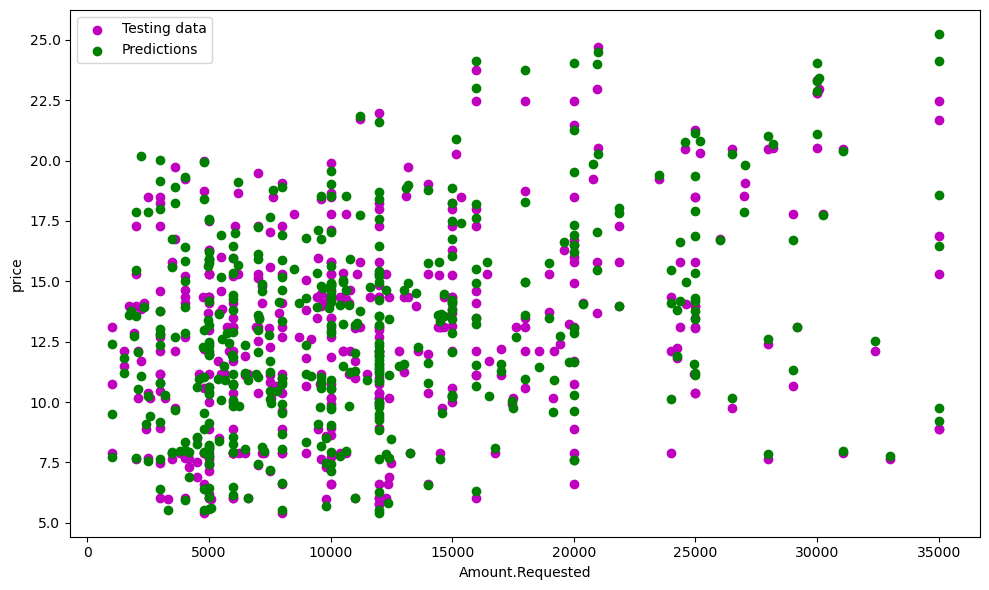

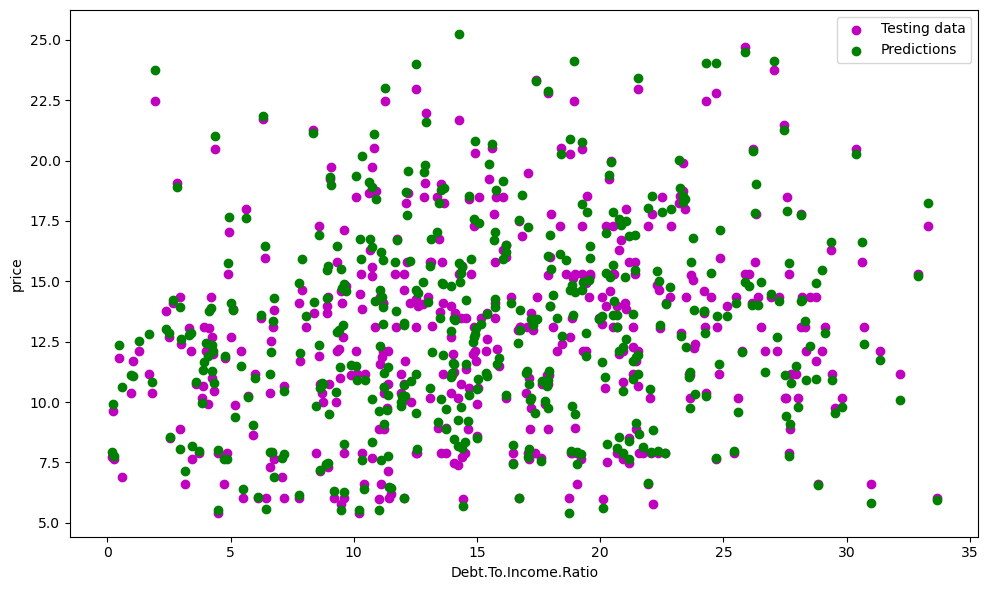

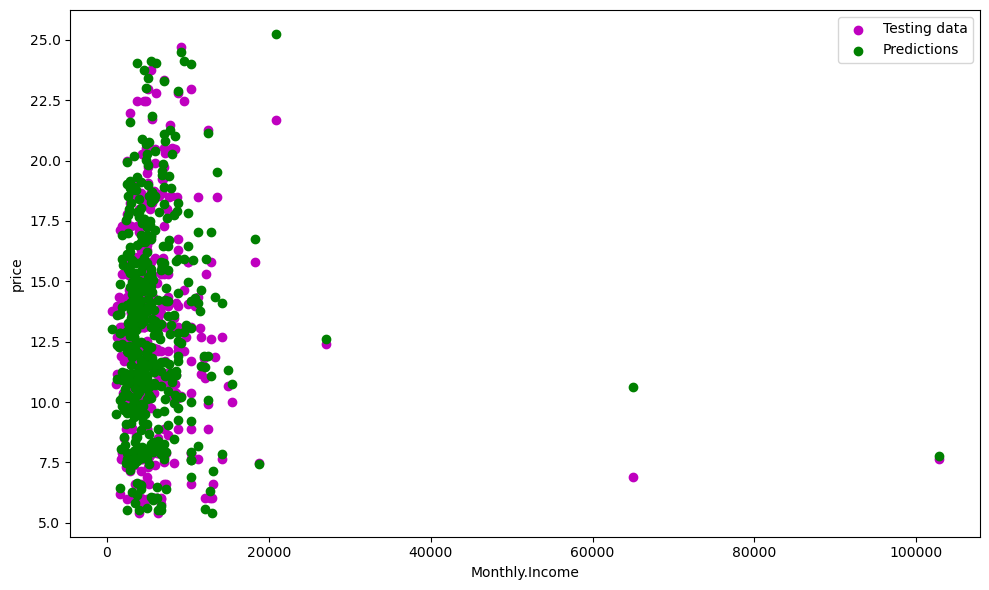

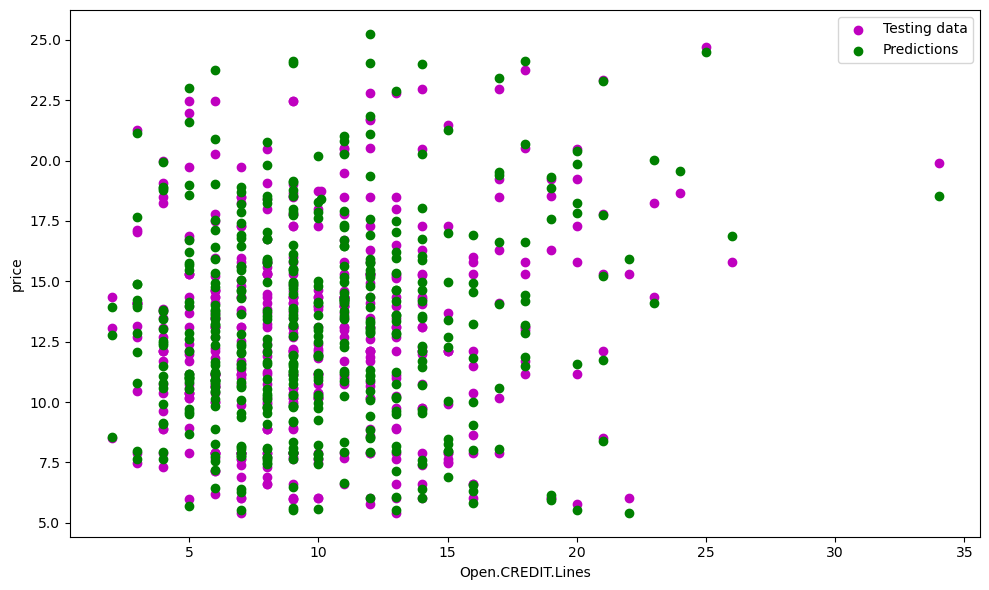

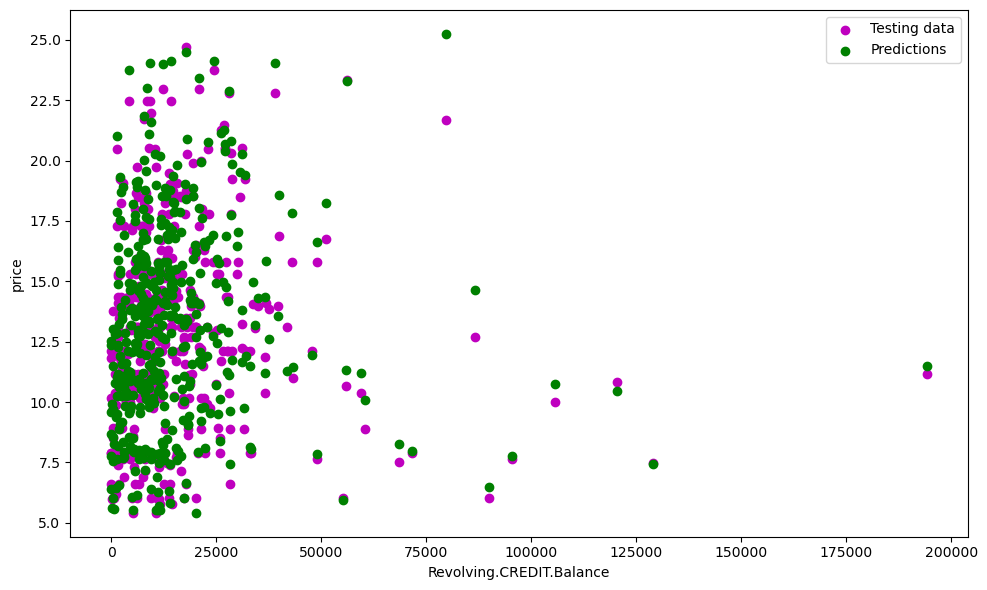

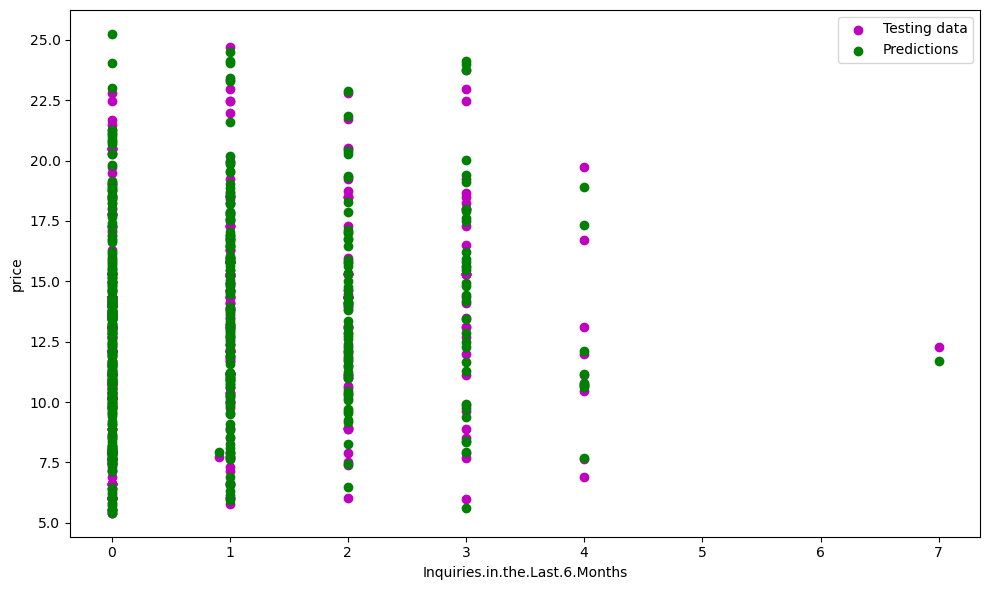

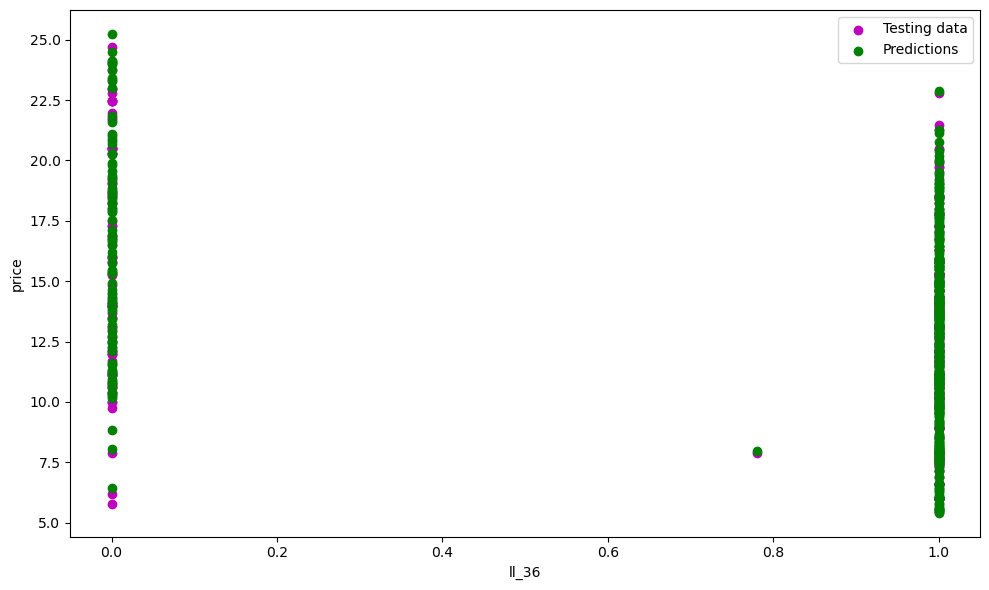

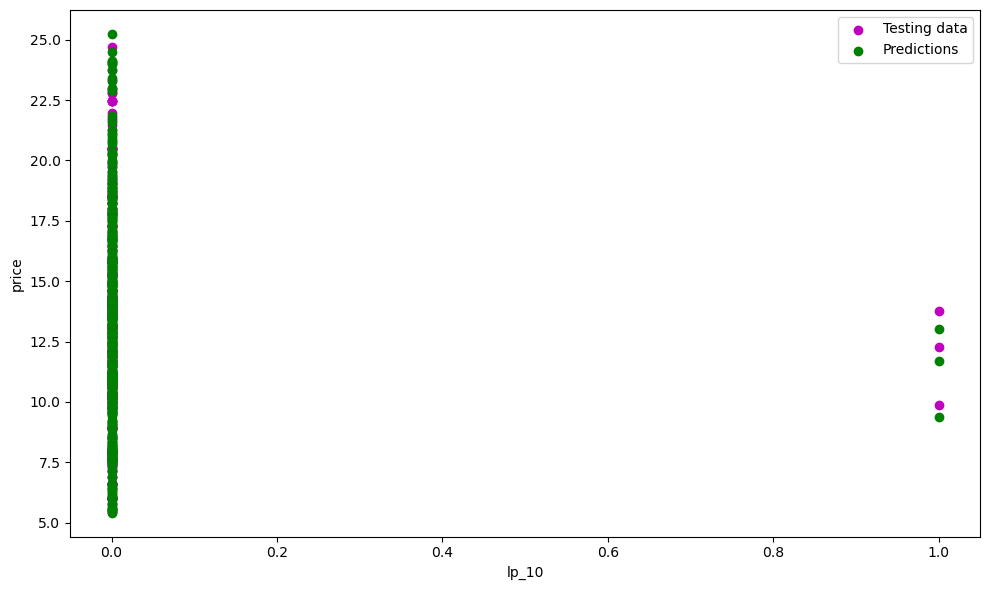

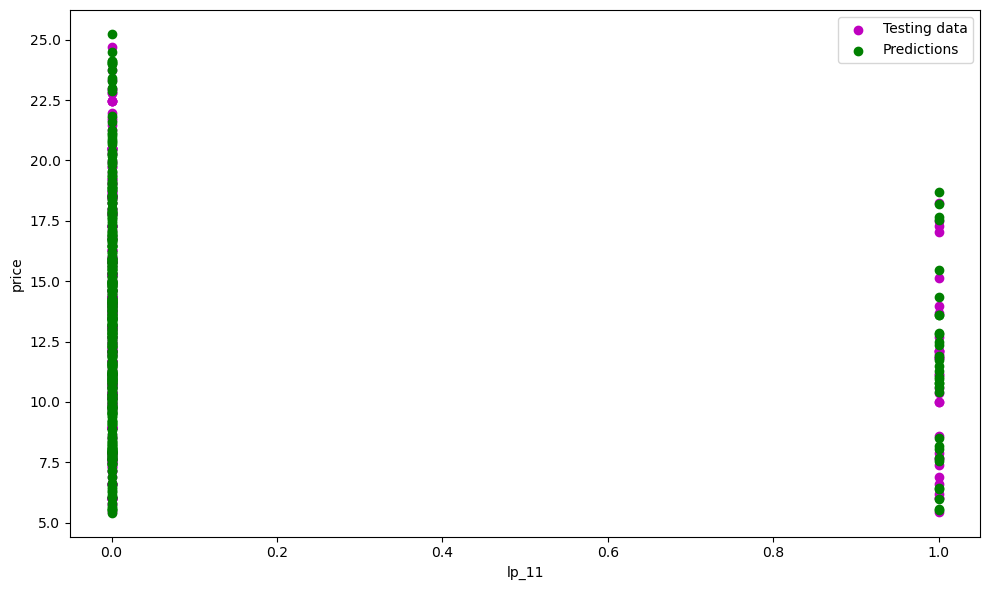

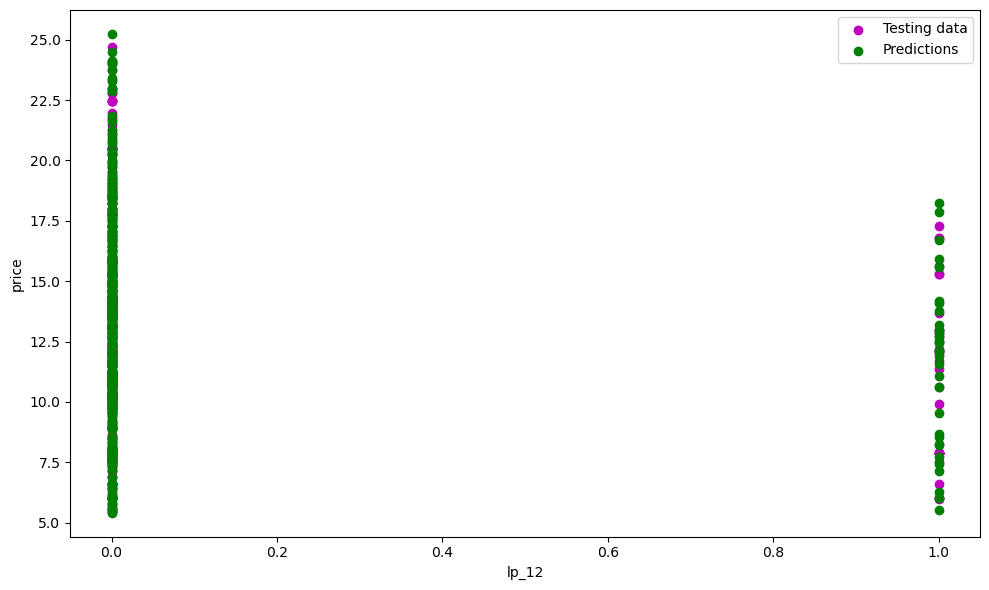

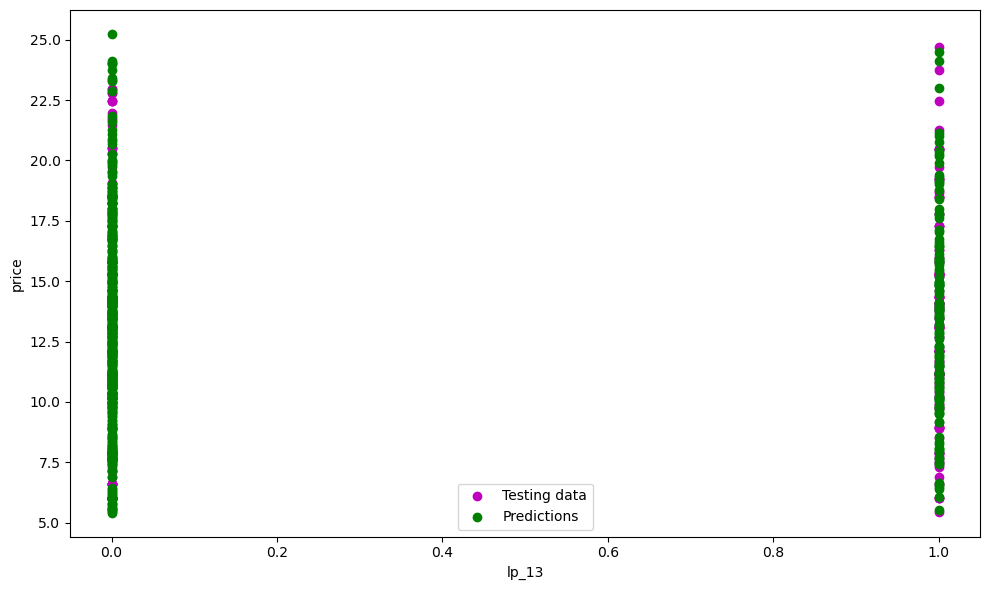

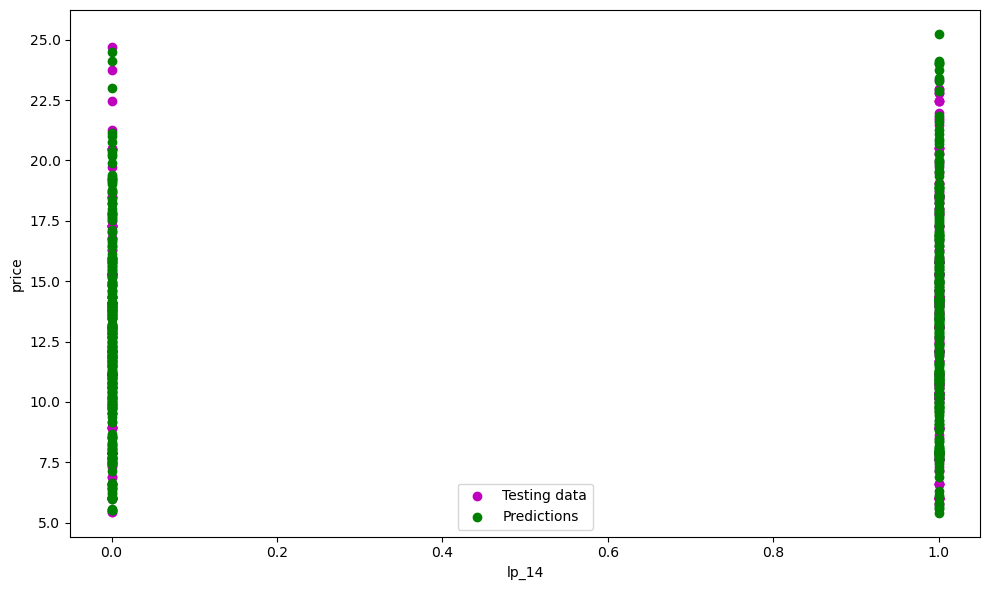

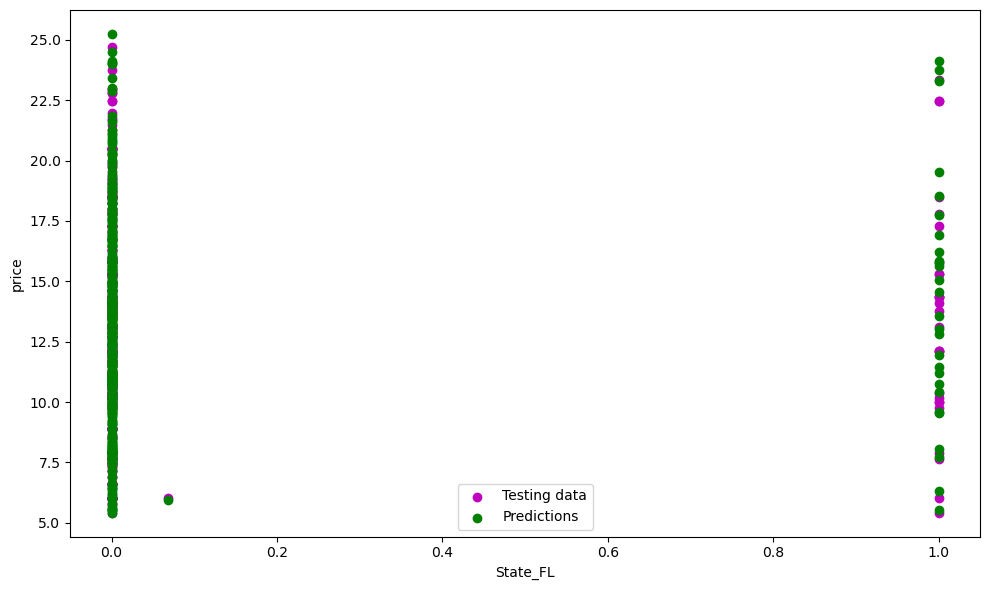

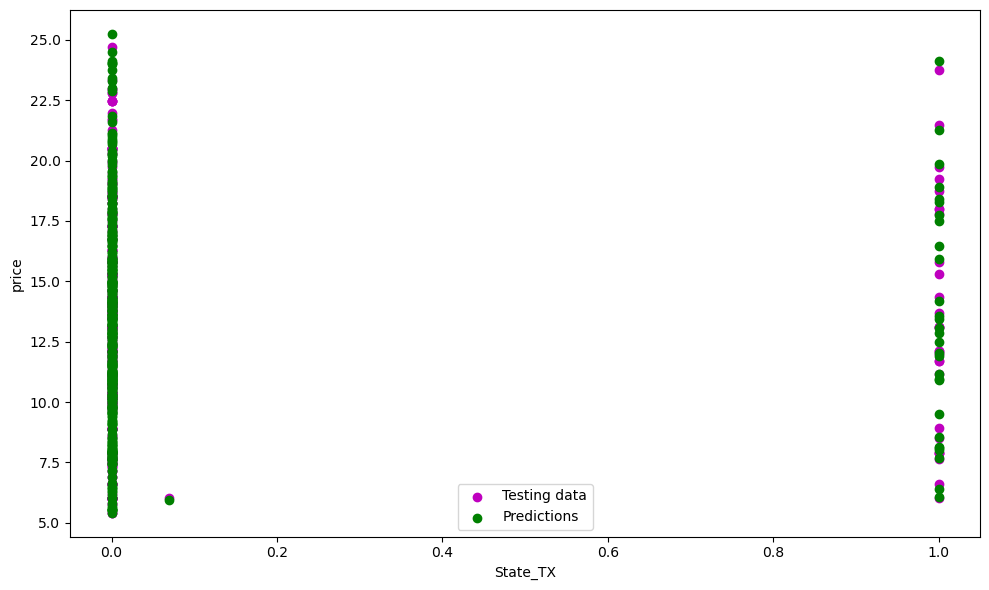

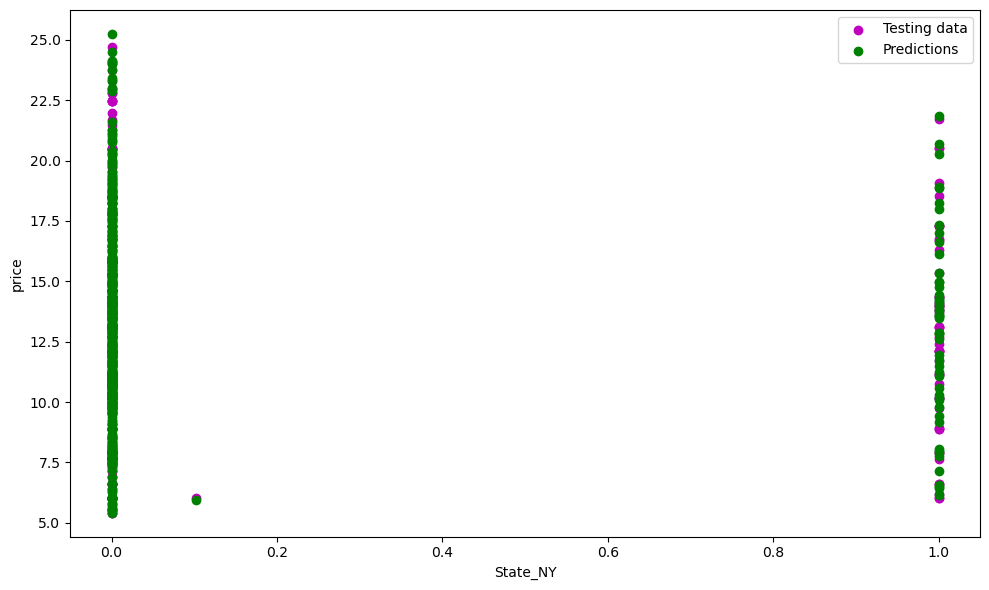

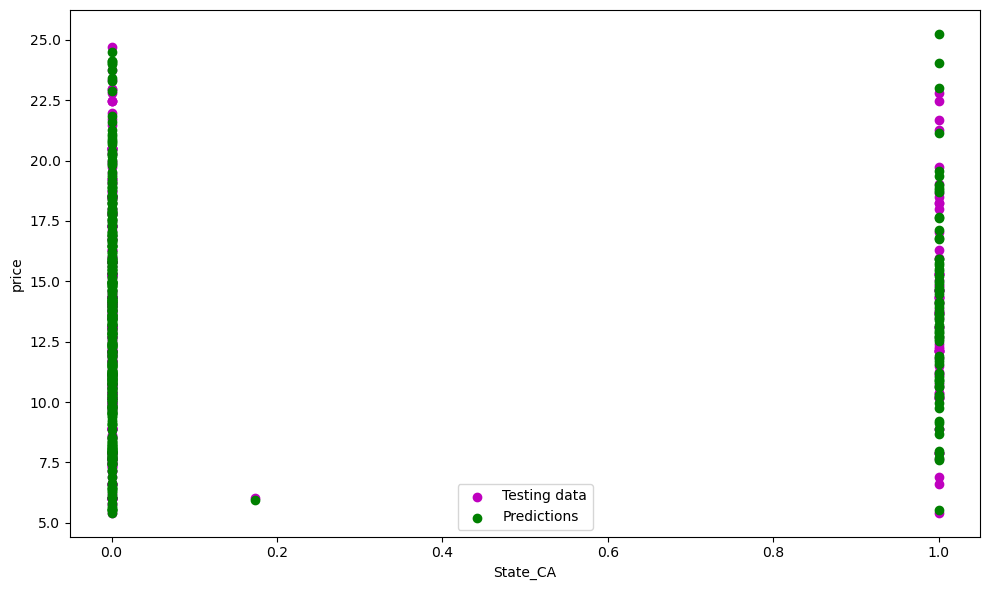

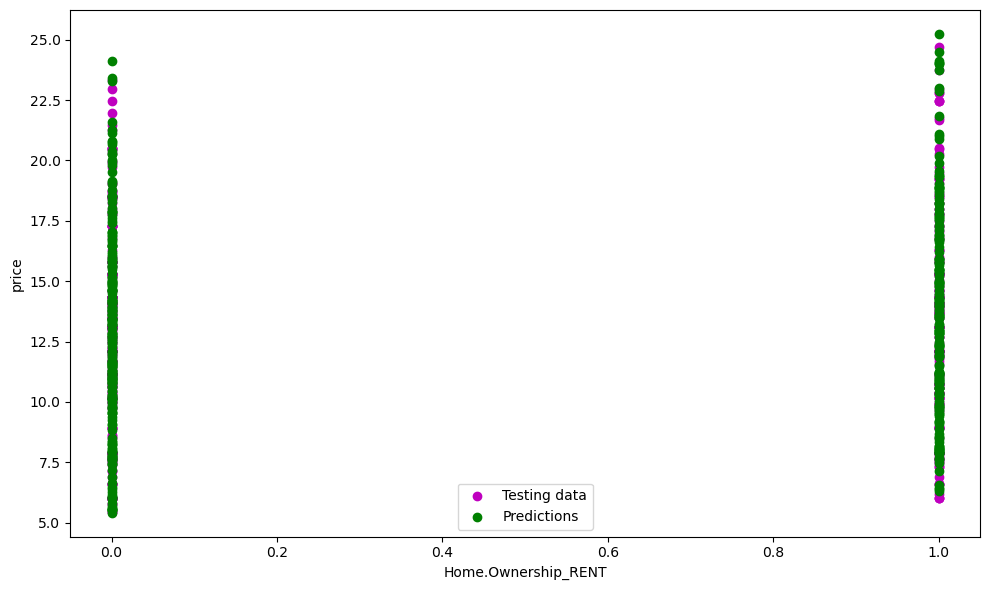

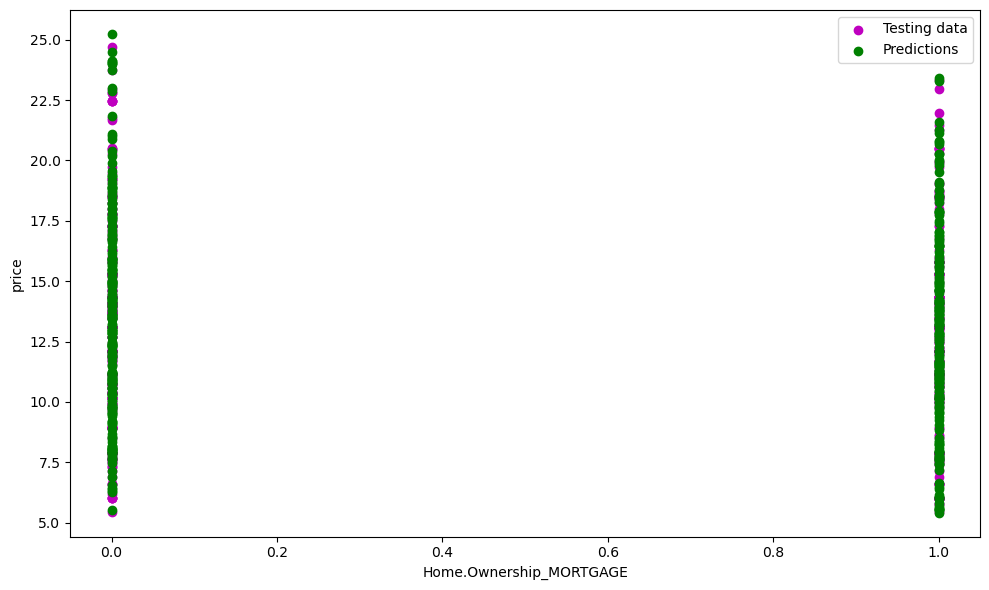

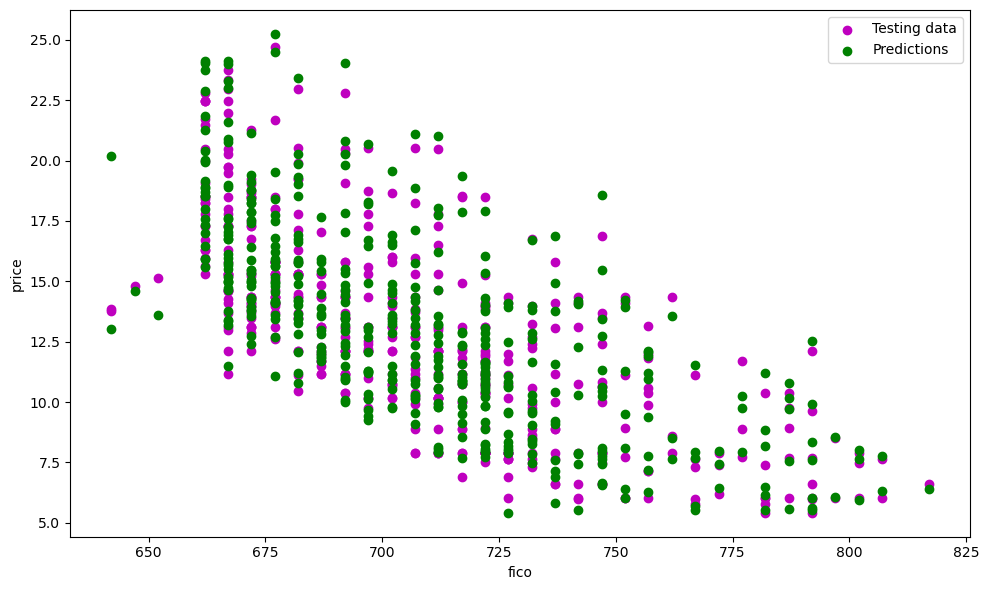

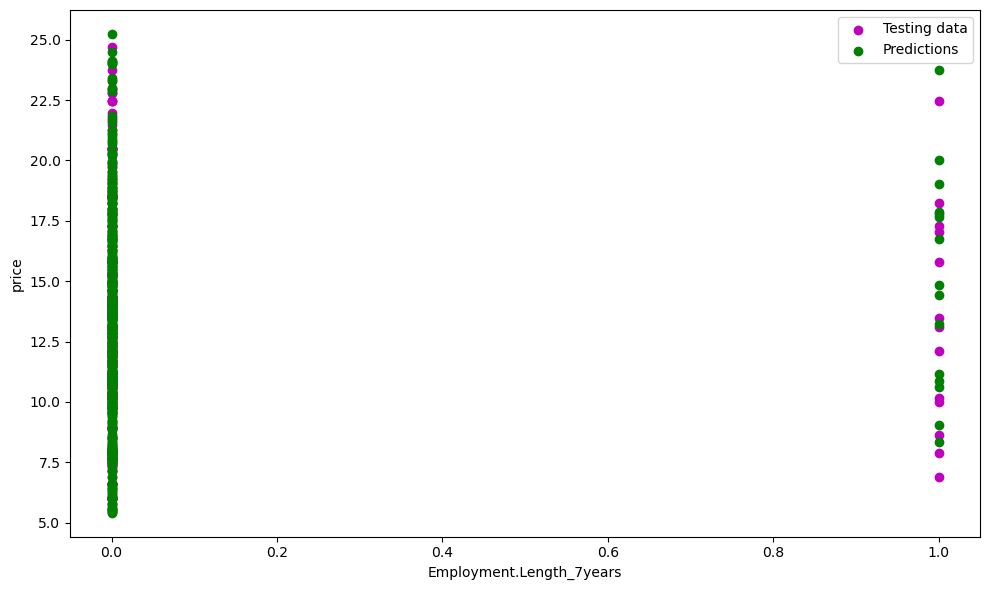

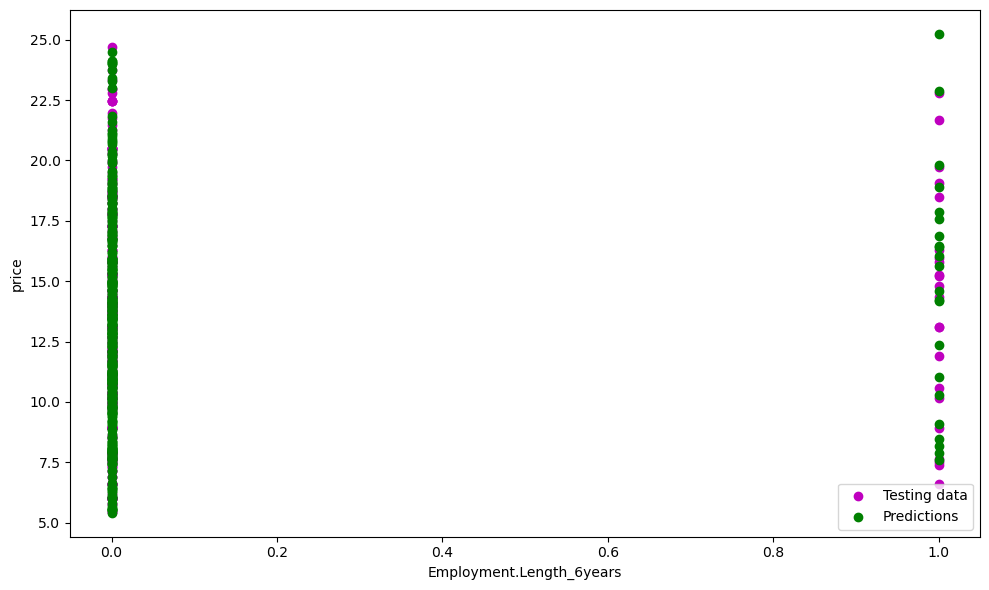

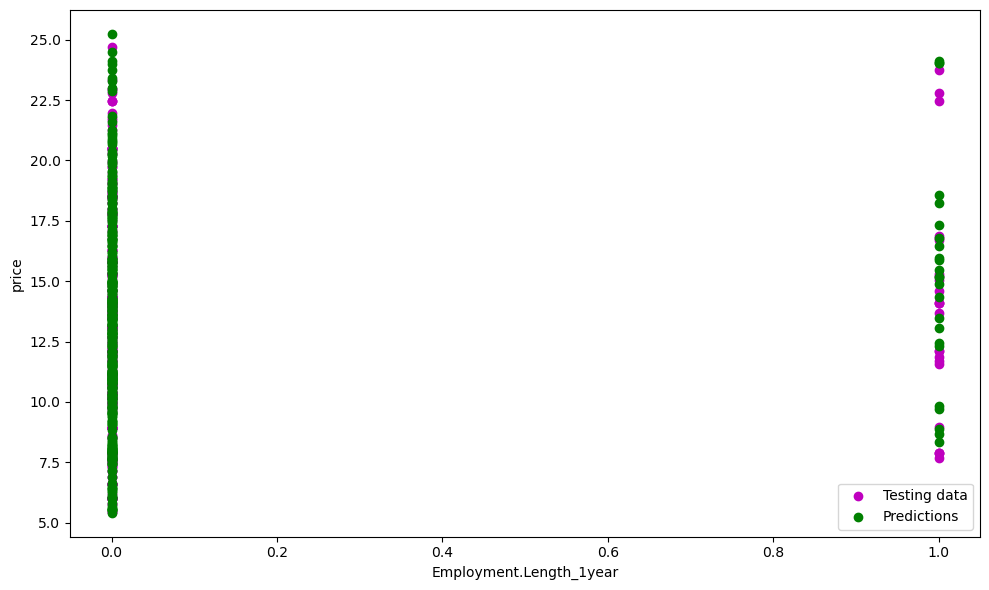

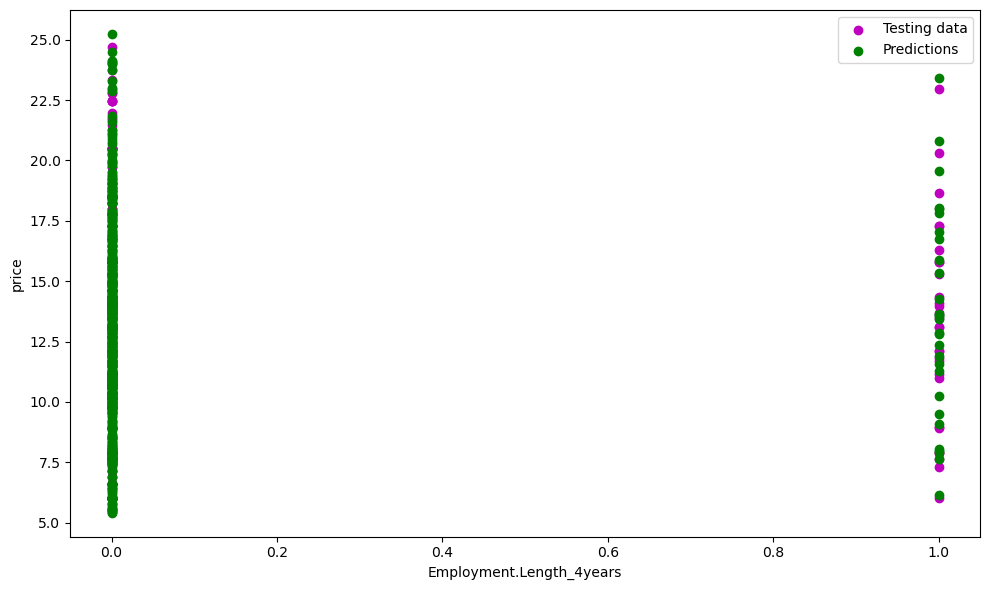

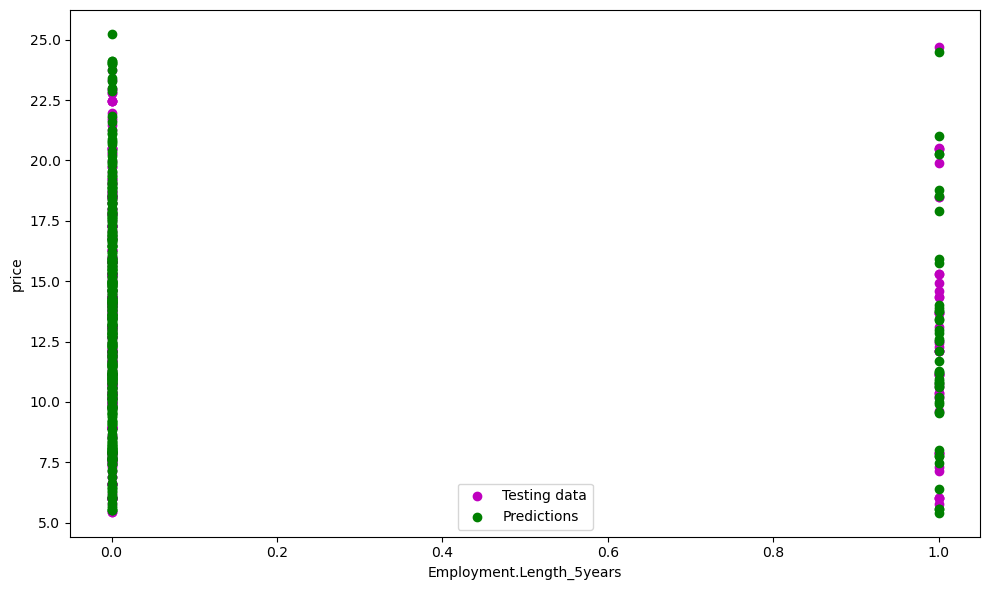

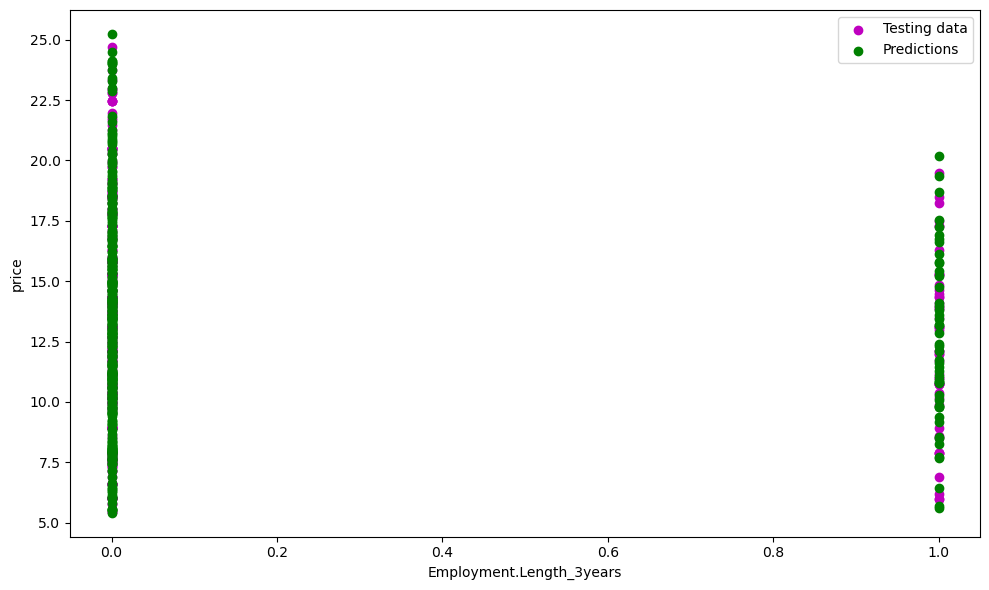

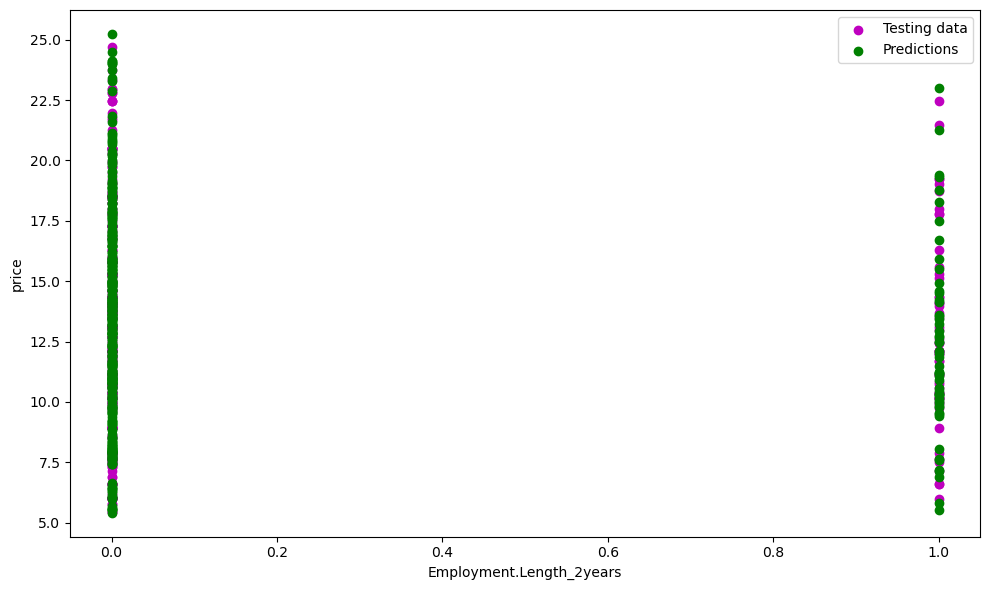

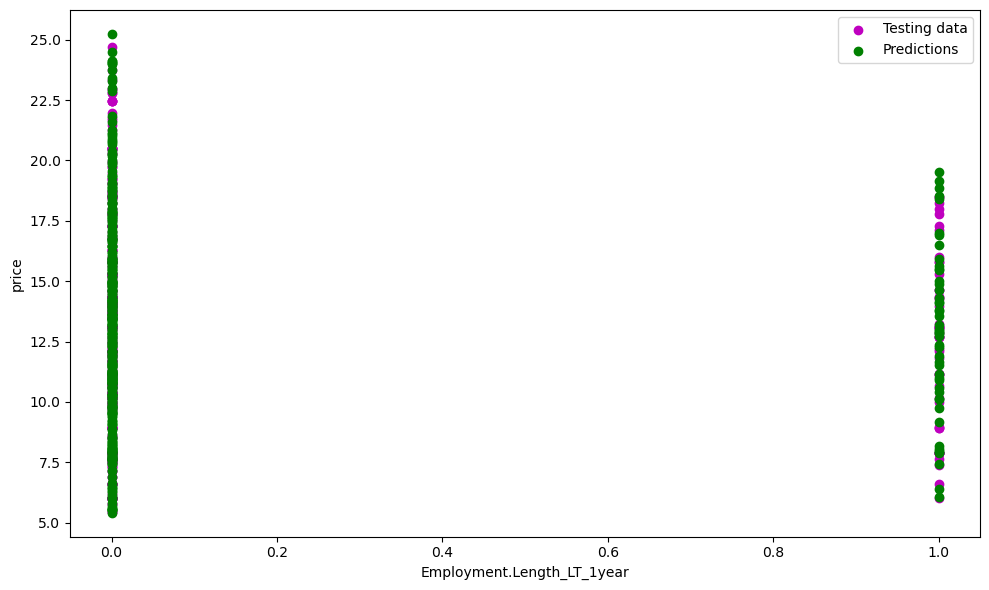

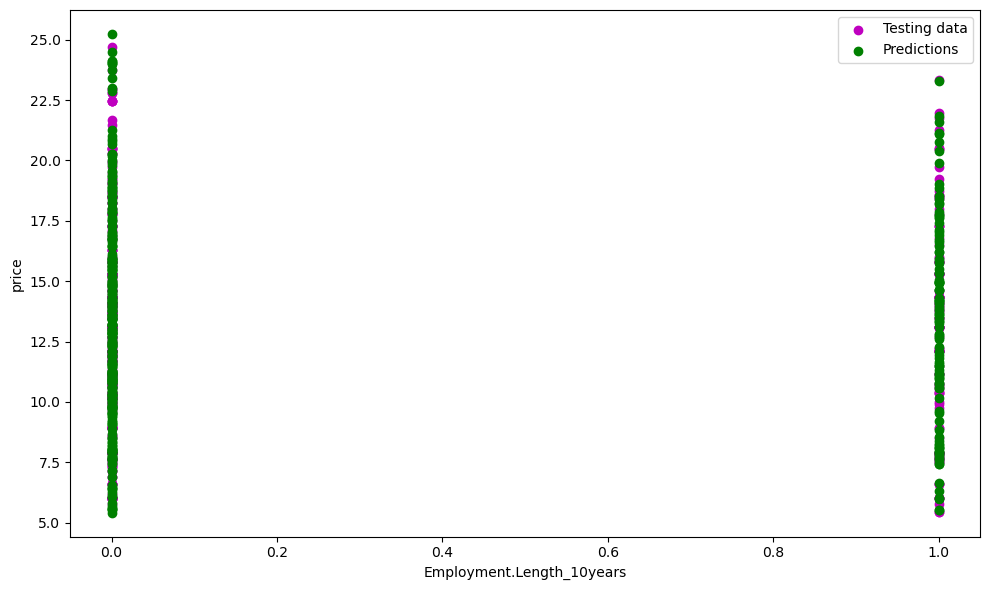

In [58]:
# Plotting evaluation 

plot_predictions(X_valid, y_valid, Validation_pred_II)

Text(0.5, 0, 'epochs')

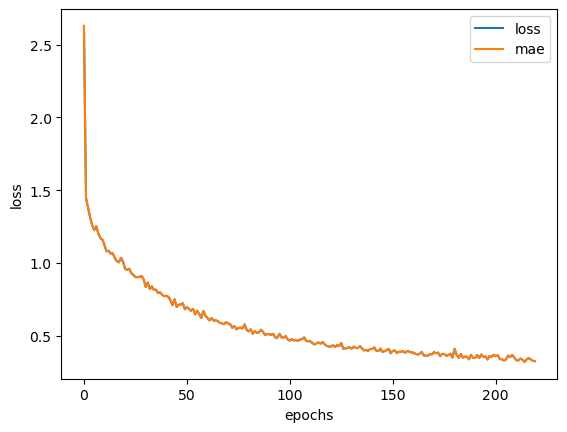

In [59]:
# Plotting model improvement in training

pd.DataFrame(history_II.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

#### Model 3

In [60]:
tf.random.set_seed(42)

# Creating model

Credit_model_III = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation = 'relu', name = 'Input_layer'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(100, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(60, activation = 'relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation = None, name = 'Output_layer')],
        name = 'Credit_model_III')

# Compiling model

Credit_model_III.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
                         loss = tf.keras.losses.mae, 
                         metrics = ['mae'])

# Fitting model

history_III = Credit_model_III.fit(X_train_reg, y_train, epochs = 200, verbose = 0)

In [61]:
# Model info

Credit_model_III.summary()

Model: "Credit_model_III"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               3000      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 60)                6060      
                                                                 
 dropout_2 (Dropout)         (None, 60)                0         
                                                                 
 Output_layer (Dense)        (None, 1)            

In [62]:
# Evaluating model

Credit_model_III.evaluate(X_val_reg, y_valid)

14/14 [==============================] - 0s 2ms/step - loss: 1.1200 - mae: 1.1200


[1.1200361251831055, 1.1200361251831055]

In [63]:
# predicting on validation set

Validation_pred_III = Credit_model_III.predict(X_val_reg)
Validation_pred_III[:10]

14/14 [==============================] - 0s 1ms/step


array([[16.029972],
       [13.165358],
       [18.541716],
       [11.403179],
       [11.927259],
       [13.460025],
       [16.996178],
       [ 8.739948],
       [11.225764],
       [15.237036]], dtype=float32)

In [64]:
y_valid.head(10)

Interest.Rate
0          18.49
1          12.23
2          22.47
3          11.89
4          11.14
5          14.09
6          17.27
7           9.88
8          10.00
9          17.27

In [65]:
# Mean absolute error

Cred_abs_err_III = absolute_error(y_valid, Validation_pred_III)
Cred_abs_err_III

1.1200361

In [66]:
# Mean squared error

Cred_mean_err_III = squared_error(y_valid, Validation_pred_III)
Cred_mean_err_III

2.4445462

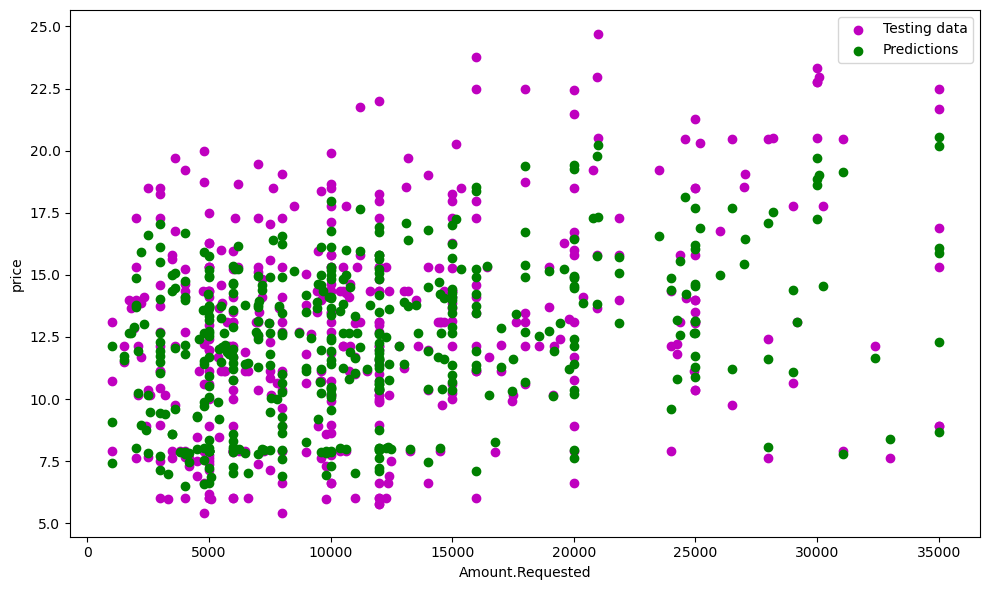

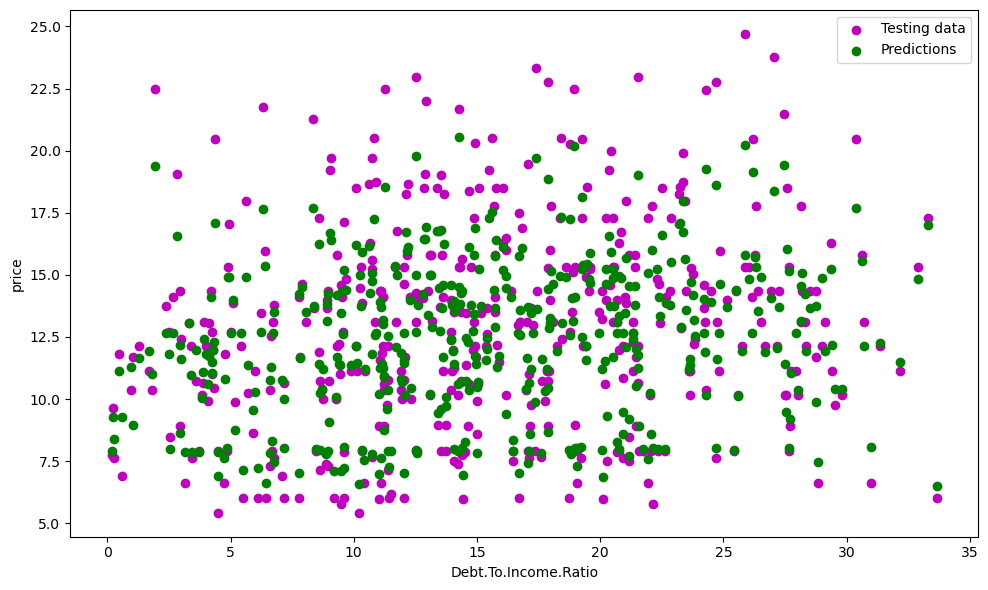

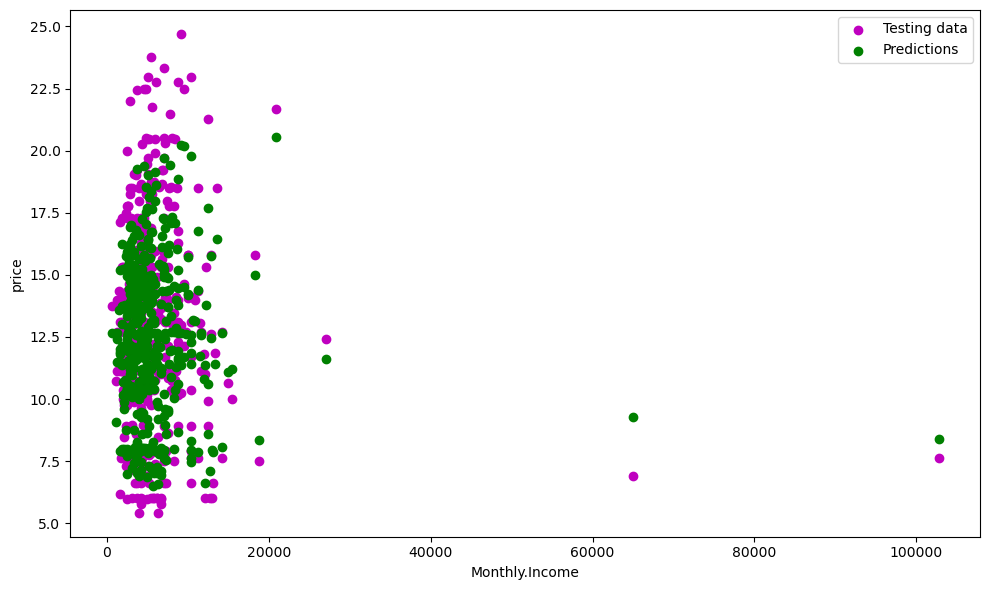

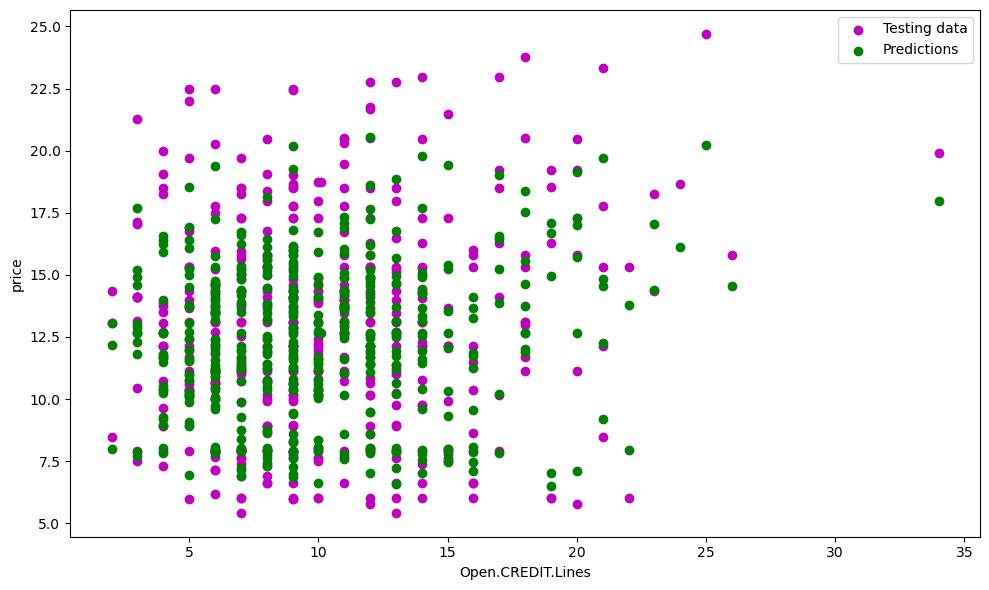

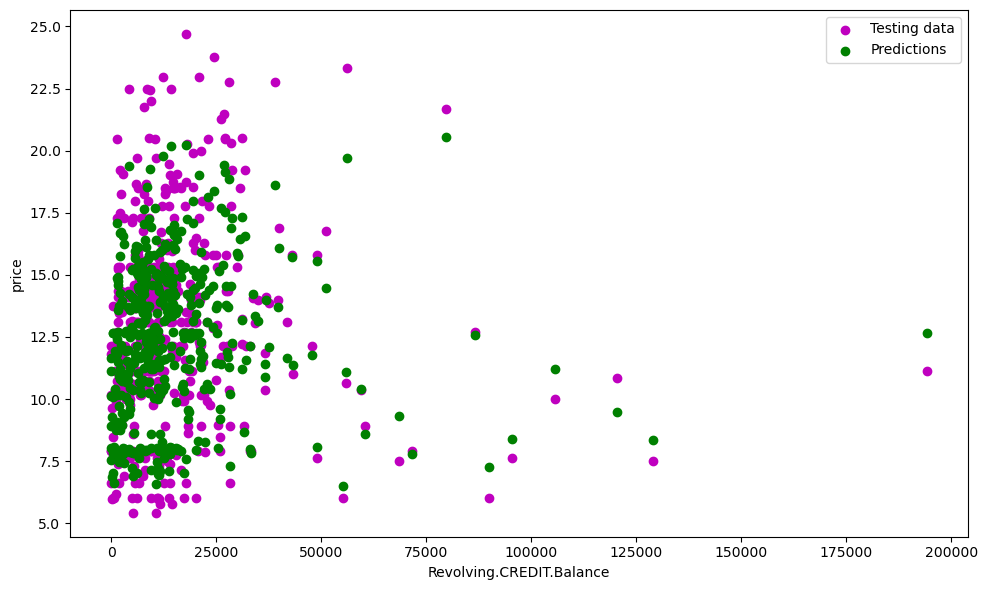

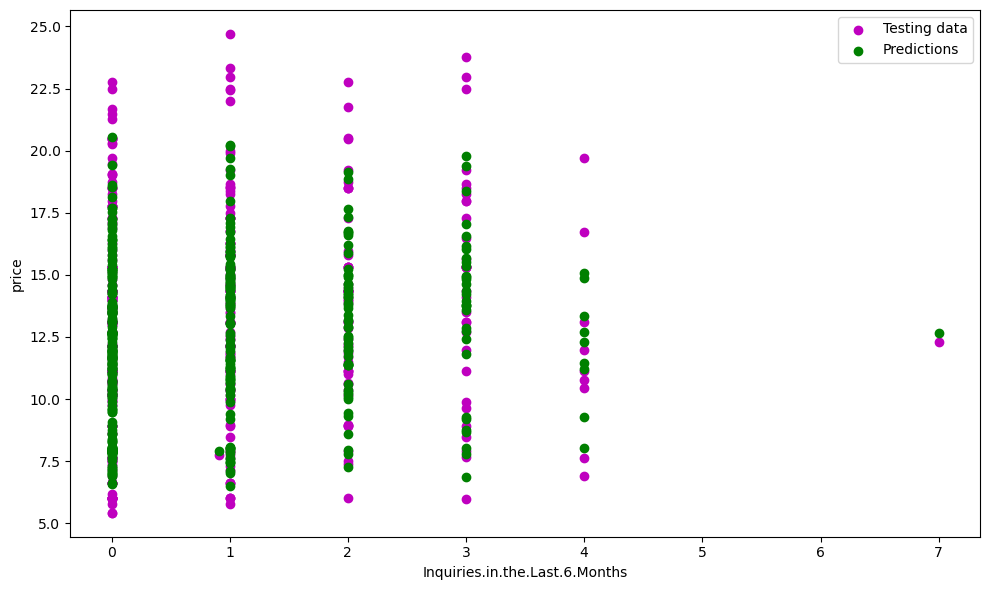

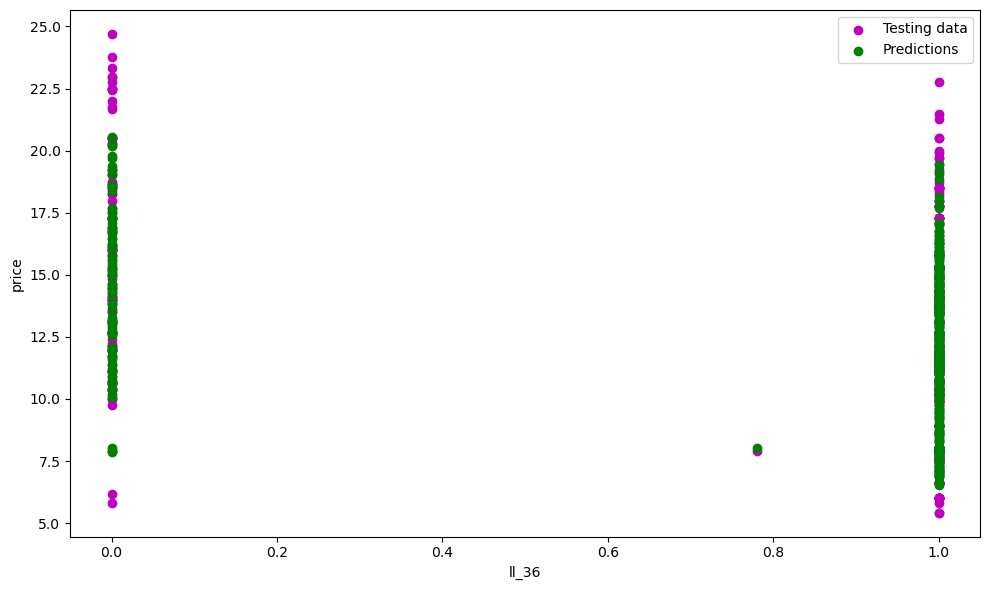

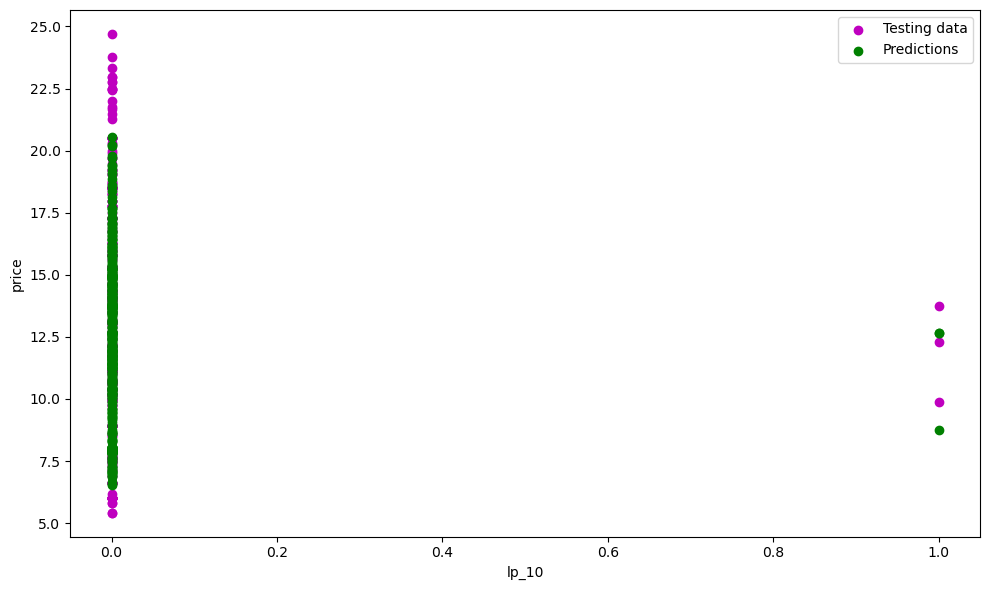

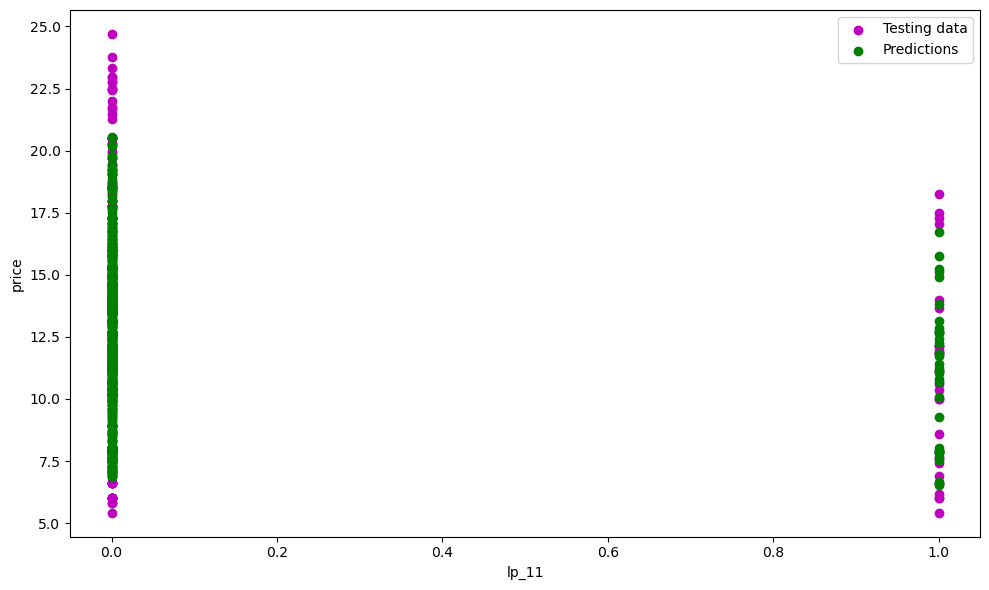

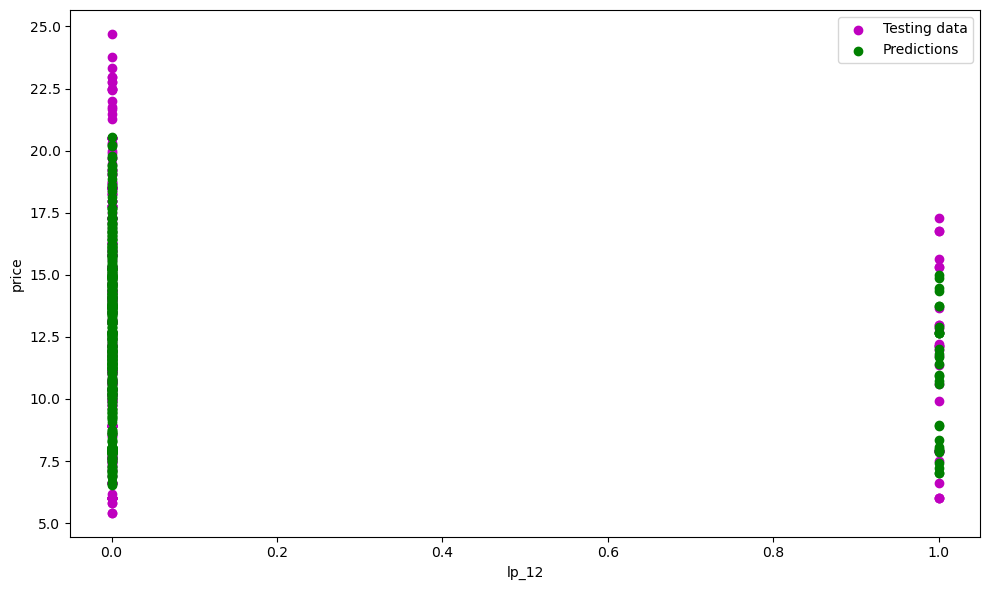

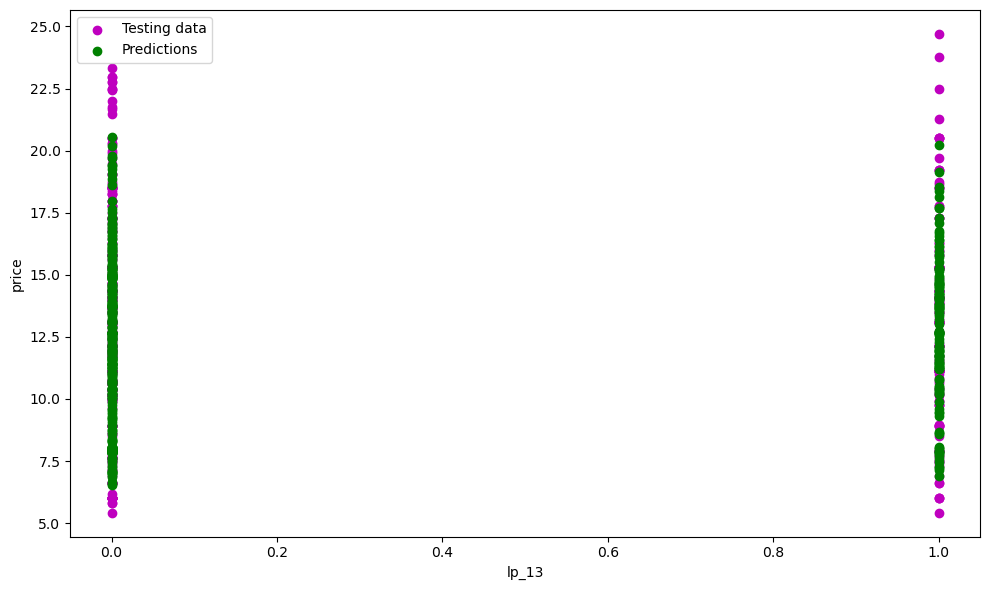

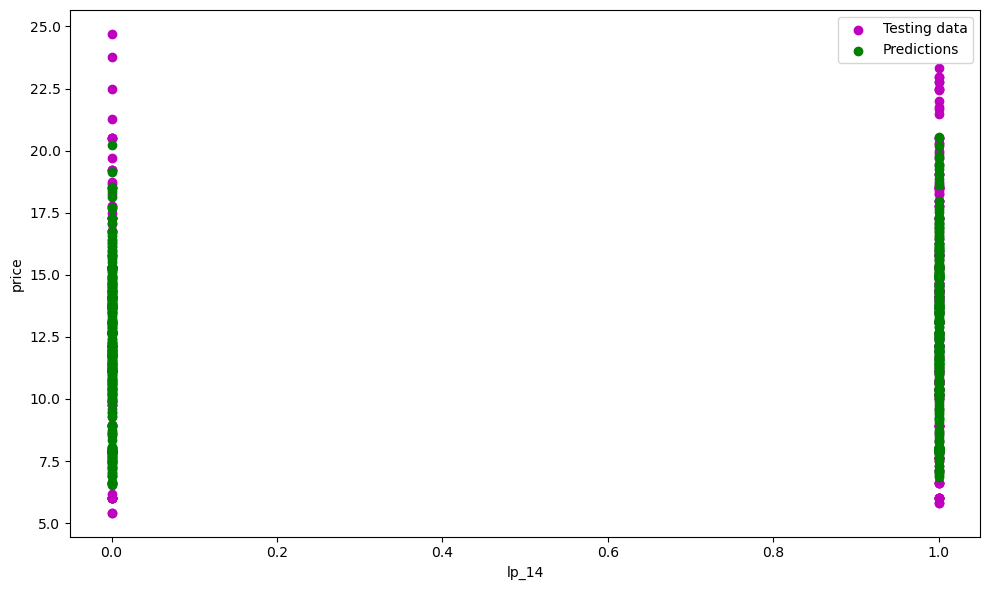

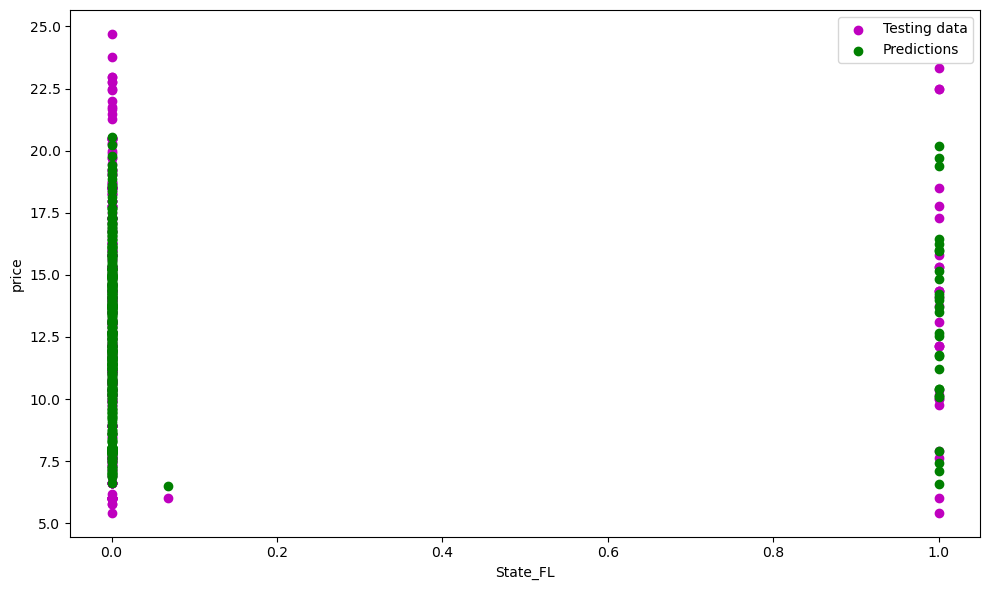

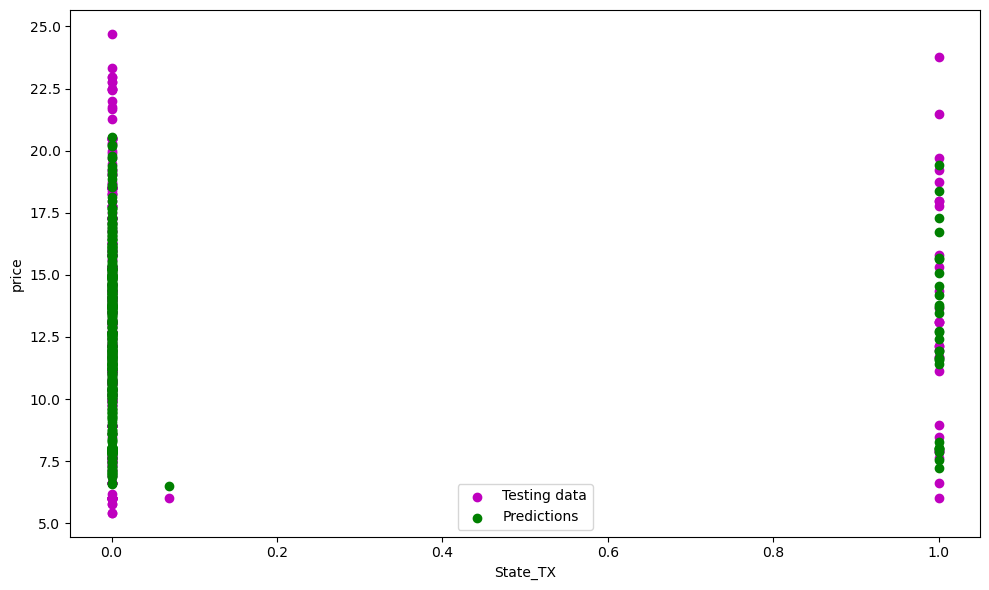

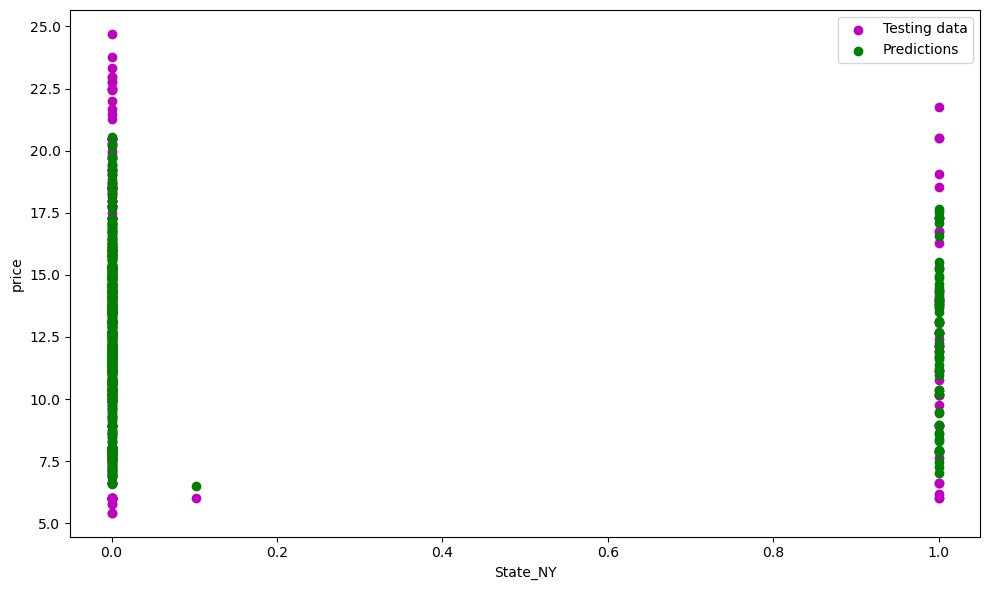

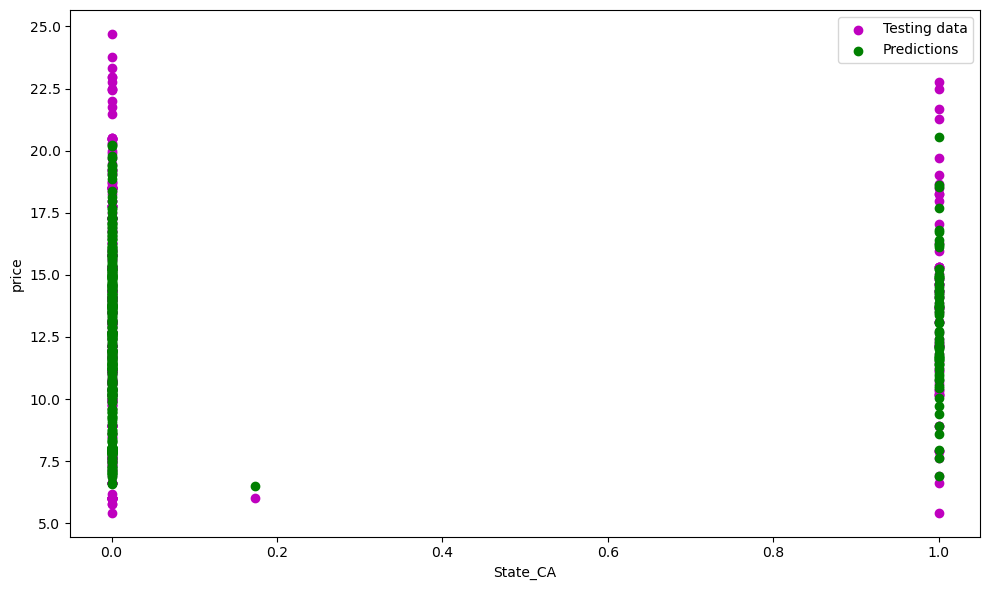

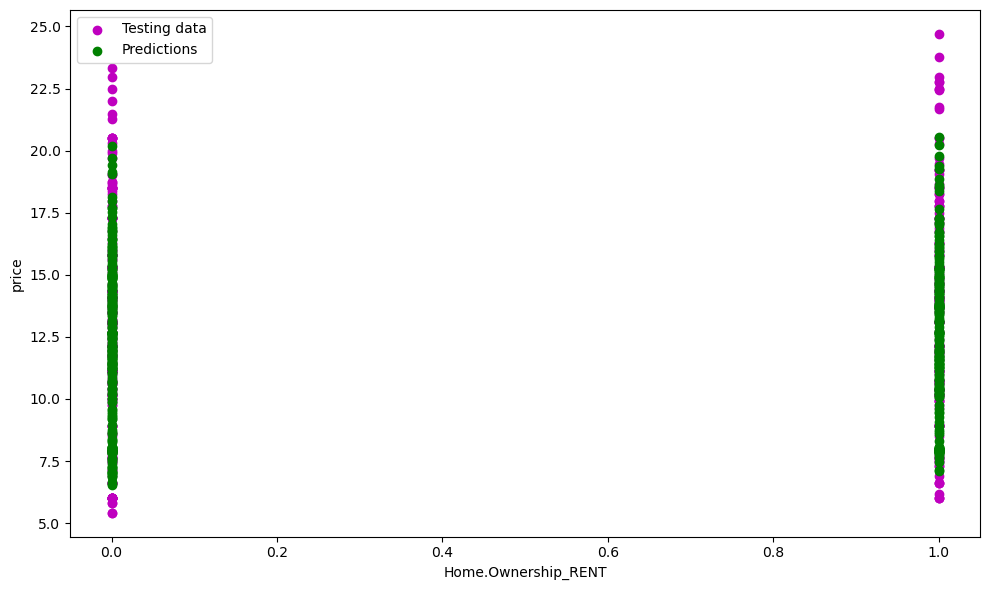

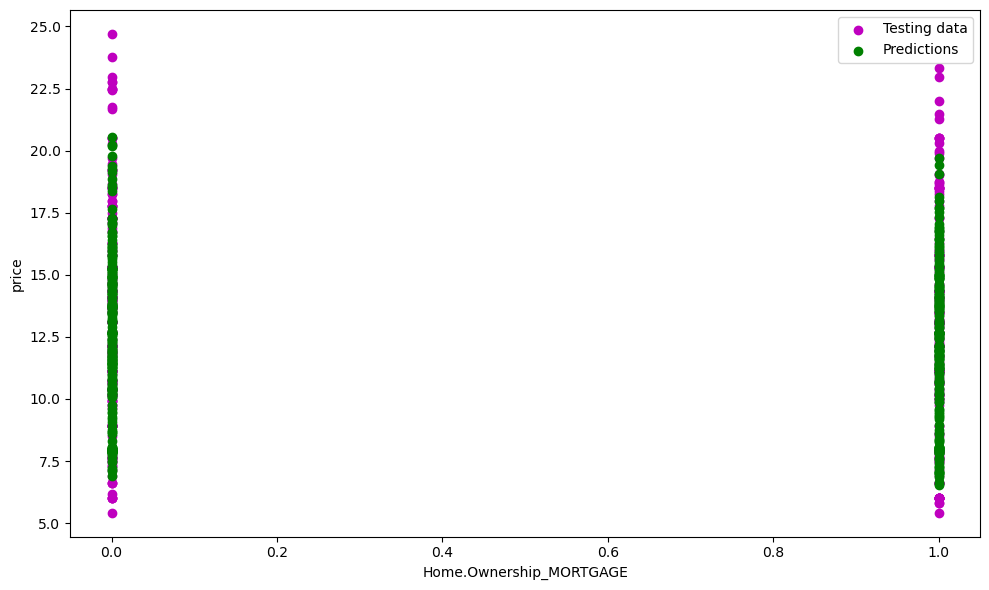

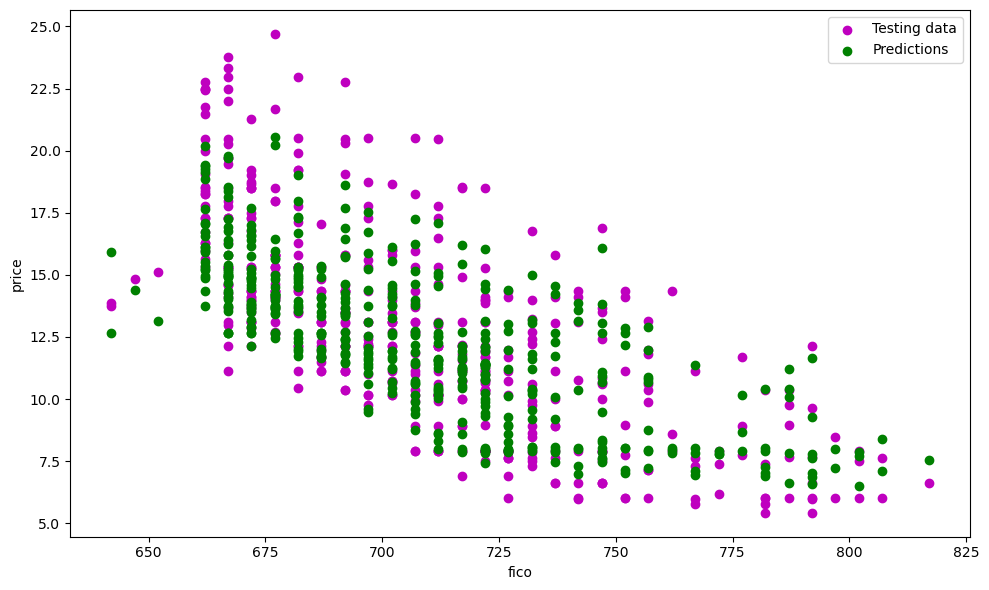

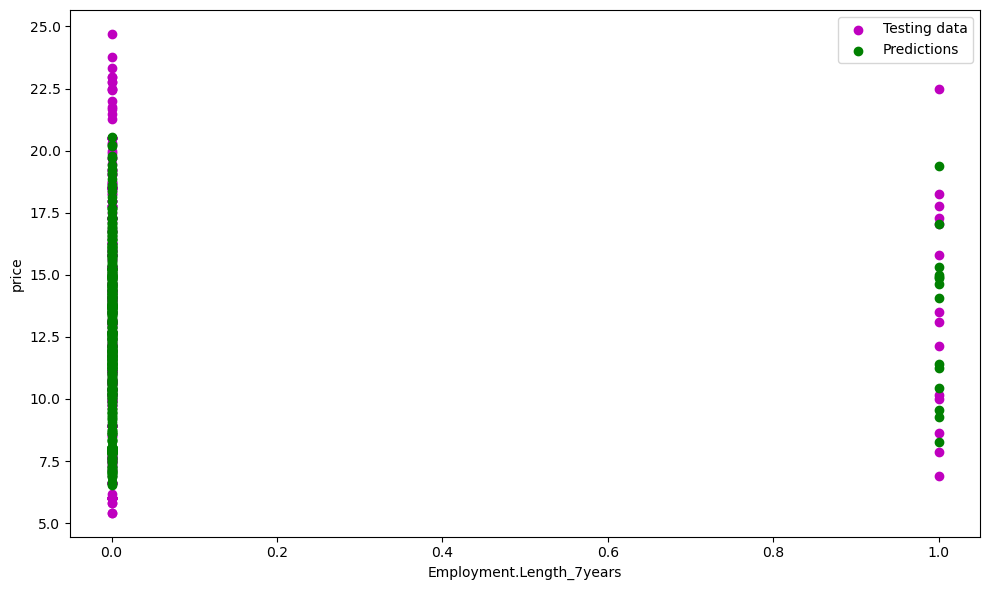

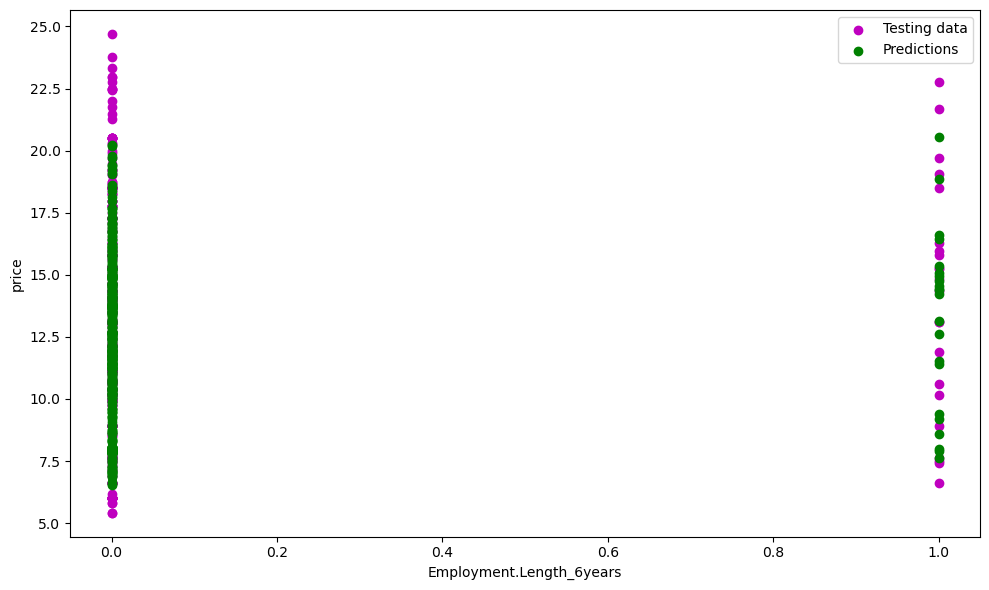

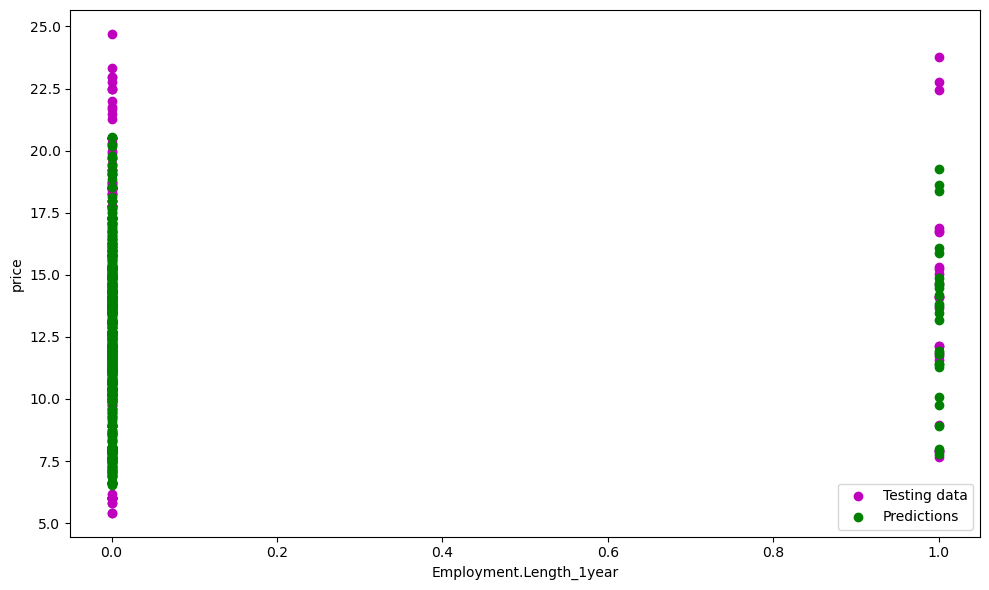

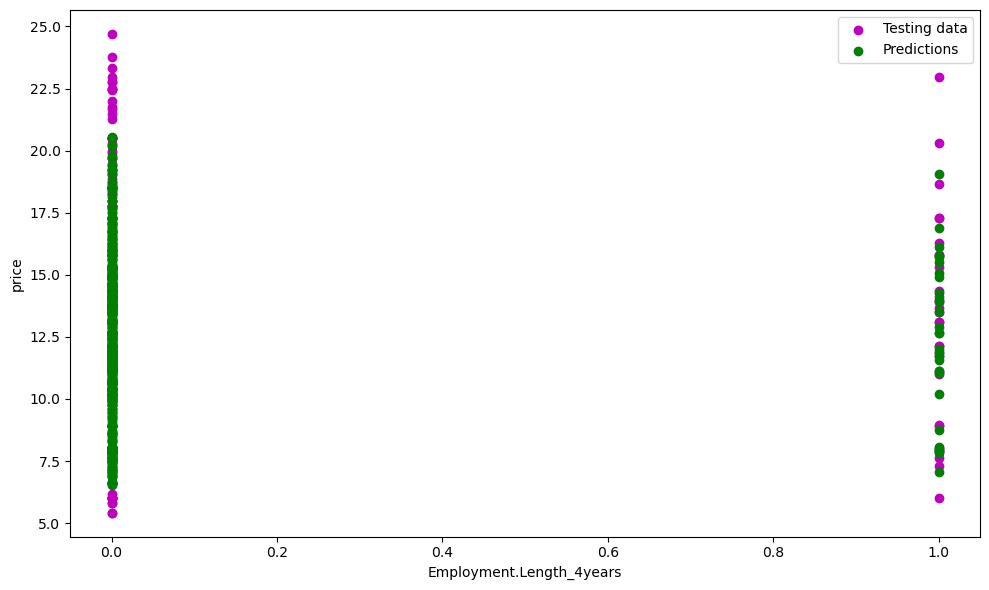

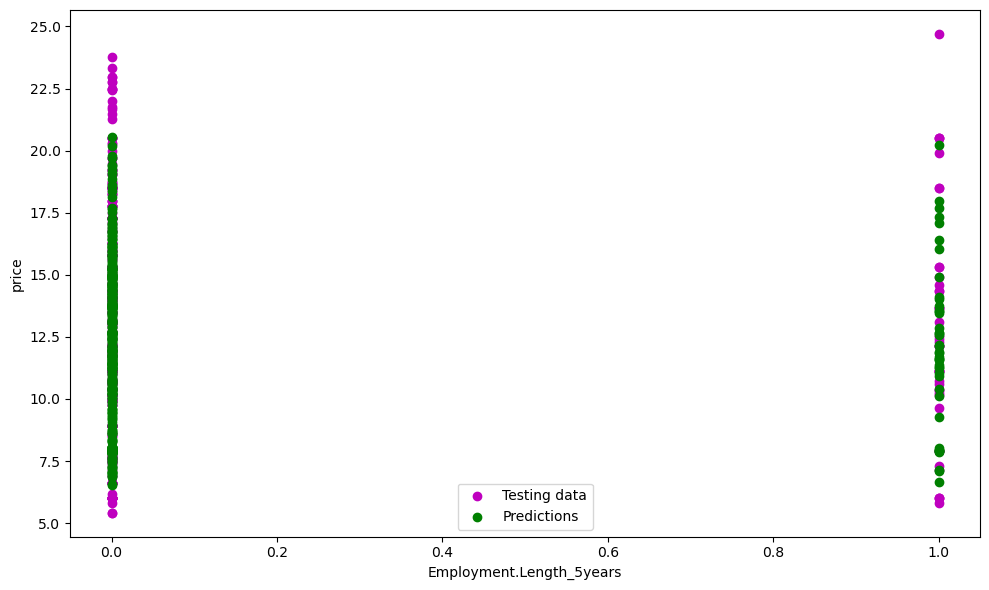

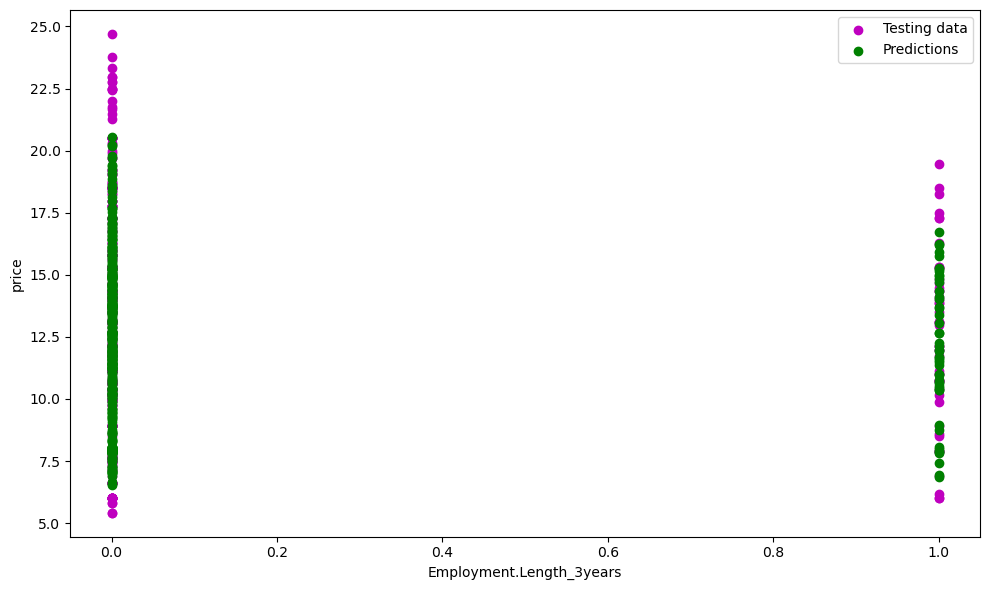

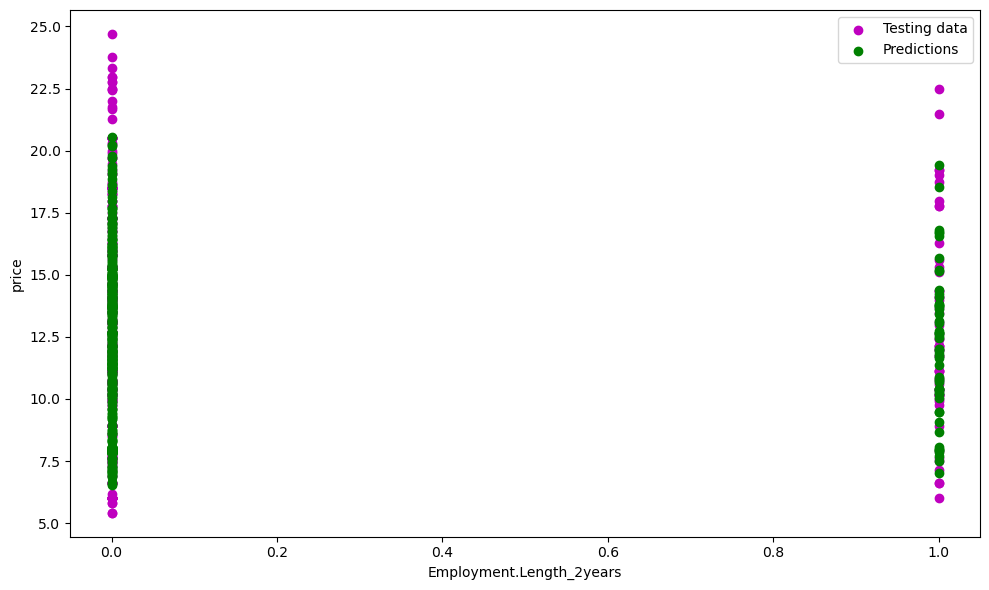

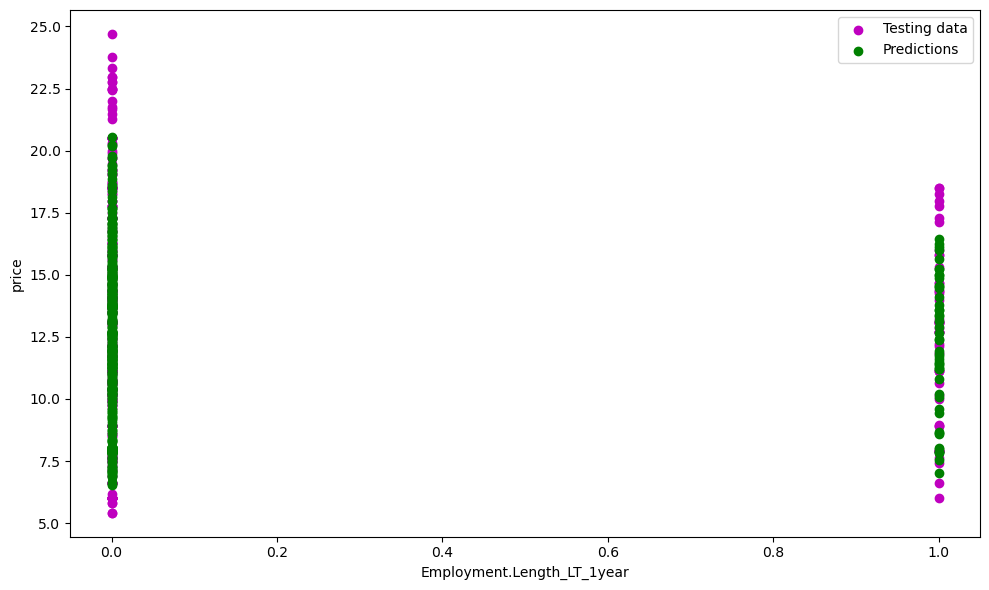

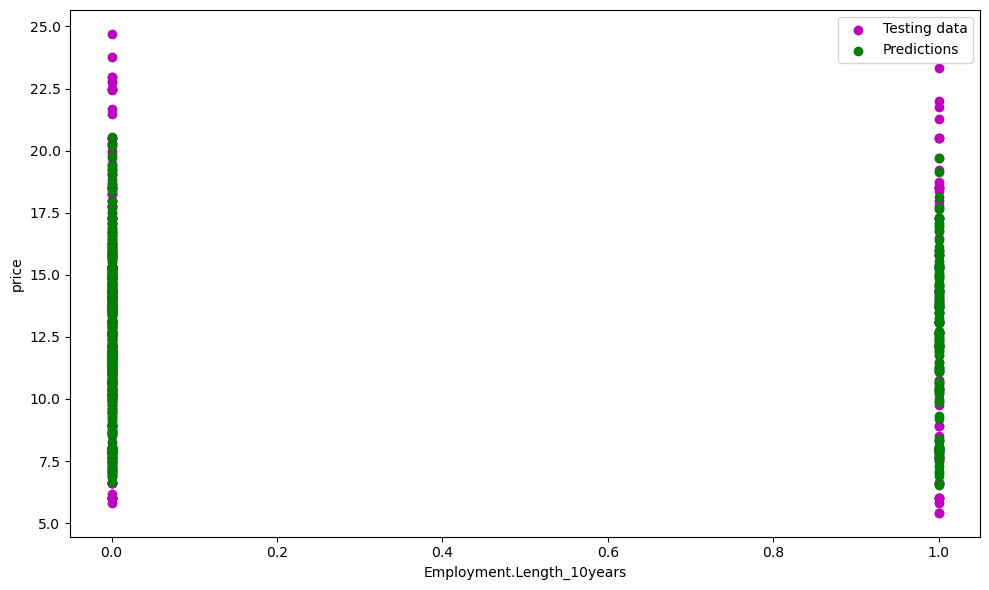

In [67]:
# Plotting evaluations

plot_predictions(X_valid, y_valid, Validation_pred_III)

Text(0.5, 0, 'epochs')

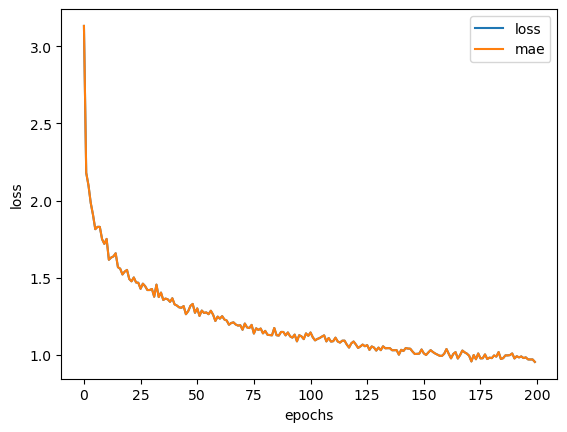

In [68]:
# Plotting model improvement in training

pd.DataFrame(history_III.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

#### Model 4

In [69]:
tf.random.set_seed(42)

# Creating model

Credit_model_IV = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation = 'relu', name = 'Input_layer'),
        tf.keras.layers.Dense(100, activation = 'relu'),
        tf.keras.layers.Dense(60, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = None, name = 'Output_layer')],
        name = 'Credit_model_IV')

# Compiling model

Credit_model_IV.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
                         loss = tf.keras.losses.mae, 
                         metrics = ['mae'])

# Fitting model

history_IV = Credit_model_IV.fit(X_train_reg, y_train, epochs = 200, verbose = 0)

In [70]:
# Model info

Credit_model_IV.summary()

Model: "Credit_model_IV"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               3000      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 60)                6060      
                                                                 
 Output_layer (Dense)        (None, 1)                 61        
                                                                 
Total params: 19,221
Trainable params: 19,221
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Model accuracy

Credit_model_IV.evaluate(X_val_reg, y_valid)

14/14 [==============================] - 0s 2ms/step - loss: 0.5358 - mae: 0.5358


[0.5357741713523865, 0.5357741713523865]

In [72]:
# Predicting on validation set

Validation_pred_IV = Credit_model_IV.predict(X_val_reg)
Validation_pred_IV[:10]

14/14 [==============================] - 0s 1ms/step


array([[19.160086],
       [13.195283],
       [23.117945],
       [11.562392],
       [10.79371 ],
       [15.240573],
       [17.216919],
       [ 9.944007],
       [ 9.003209],
       [17.713646]], dtype=float32)

In [73]:
y_valid.head(10)

Interest.Rate
0          18.49
1          12.23
2          22.47
3          11.89
4          11.14
5          14.09
6          17.27
7           9.88
8          10.00
9          17.27

In [74]:
# Mean absolute error

Cred_abs_err_IV = absolute_error(y_valid, Validation_pred_IV)
Cred_abs_err_IV

0.53577423

In [75]:
# Maen squared error

Cred_mean_err_IV = squared_error(y_valid, Validation_pred_IV)
Cred_mean_err_IV

0.59339

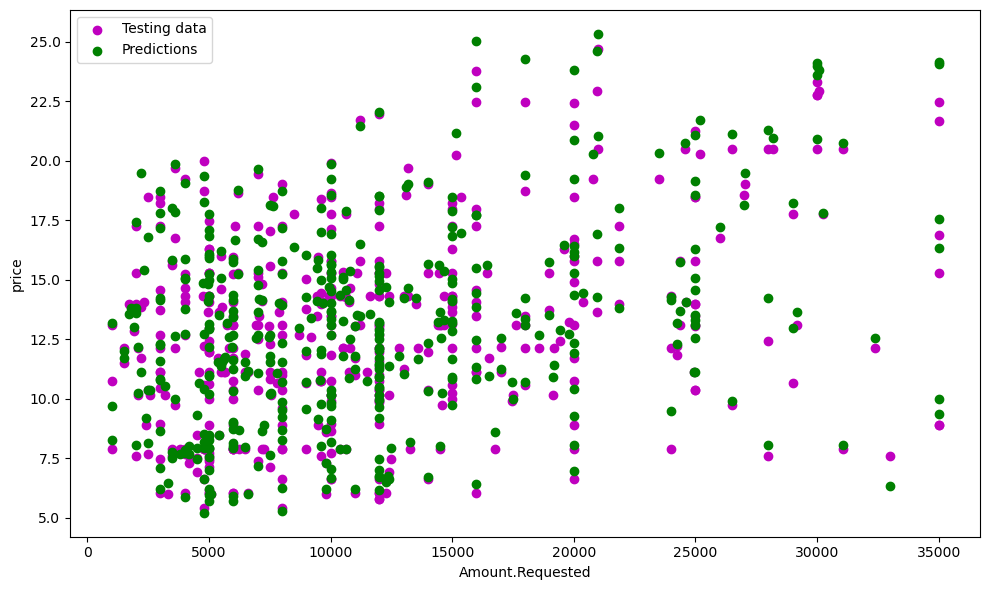

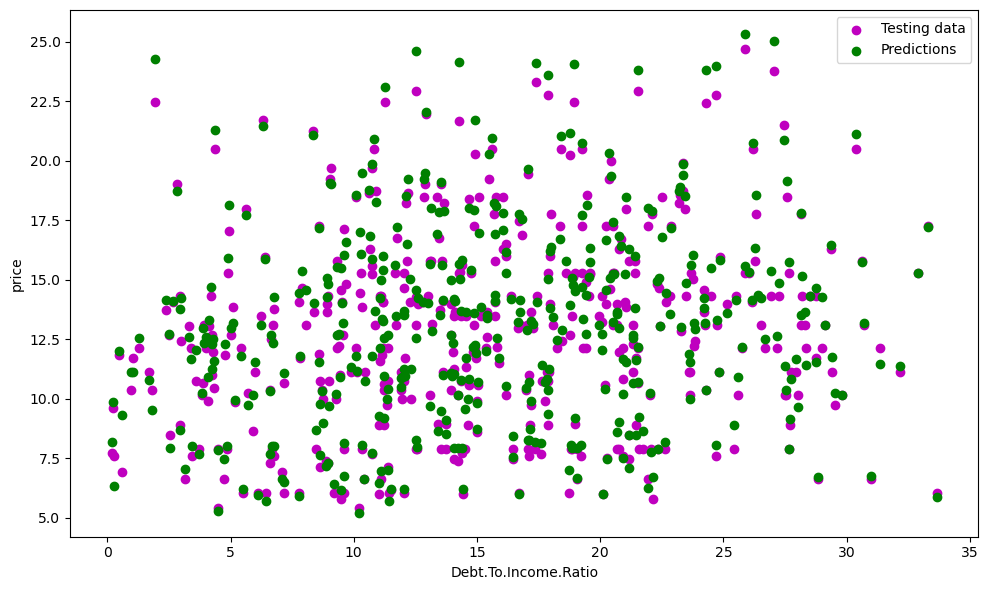

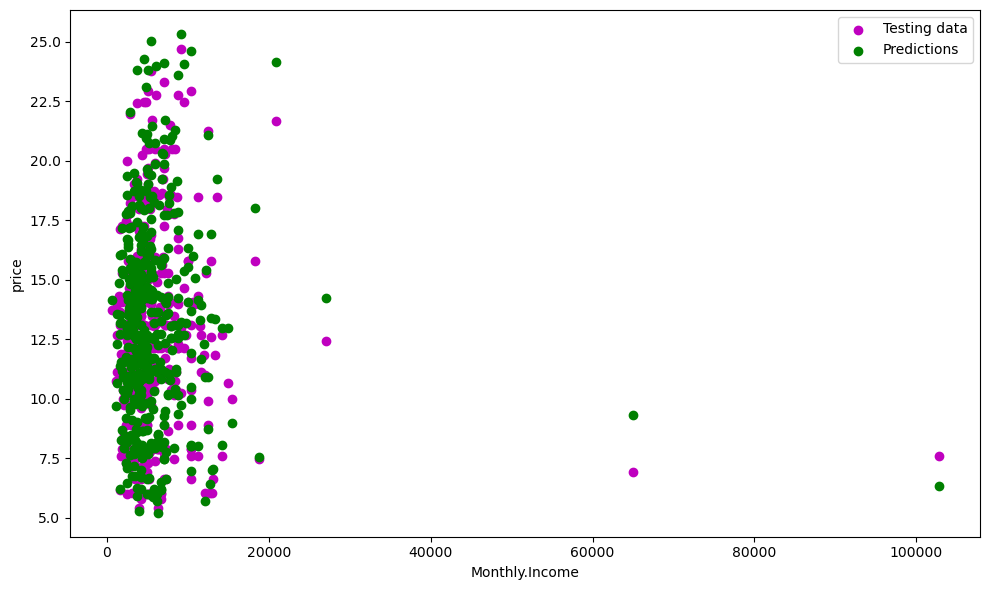

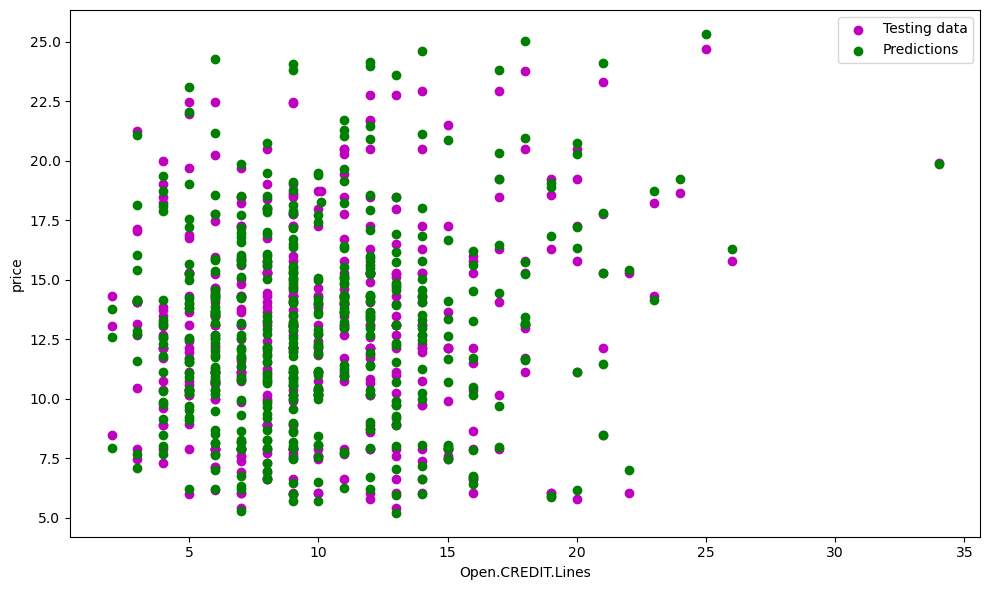

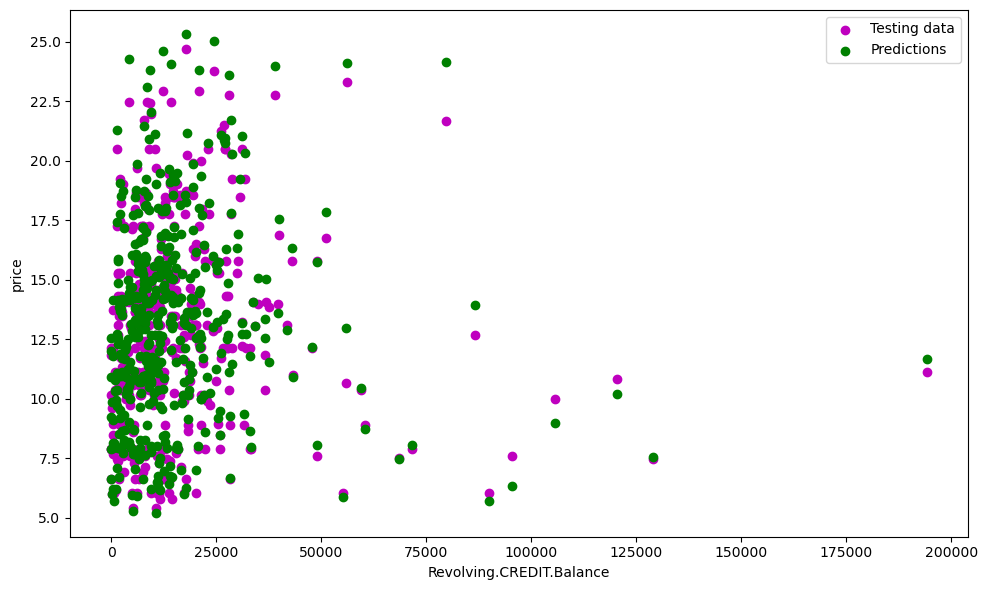

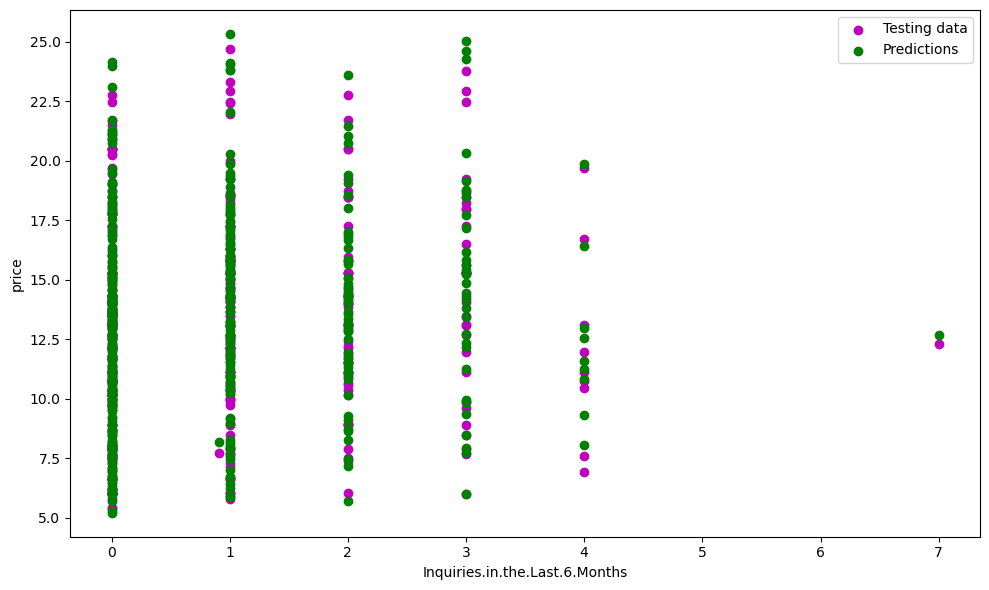

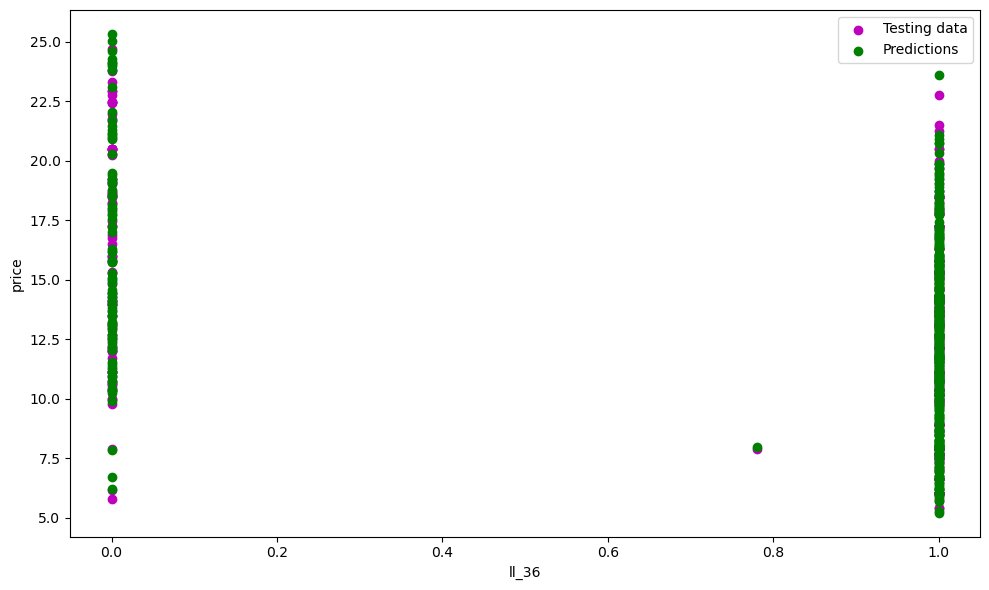

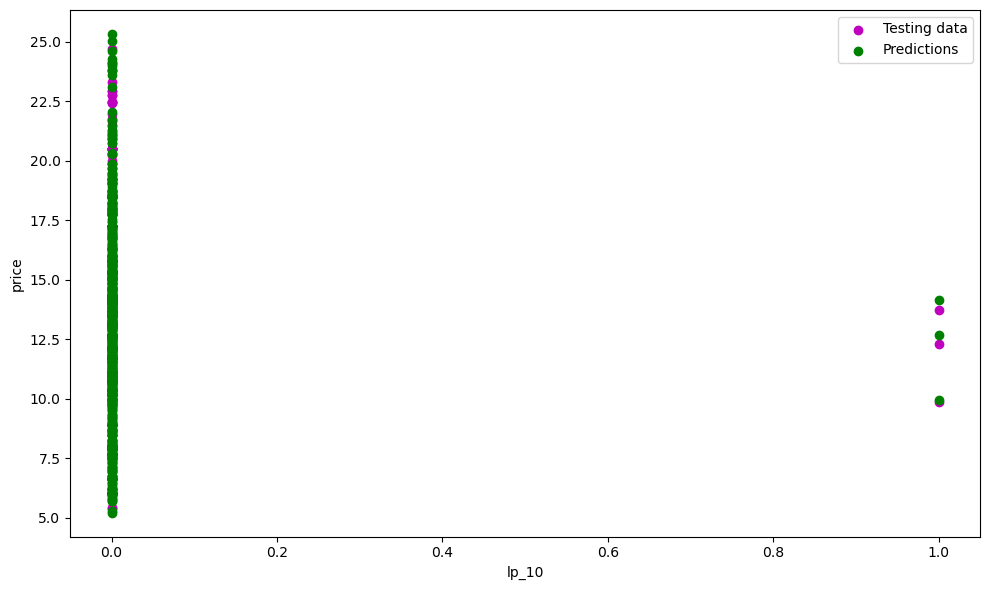

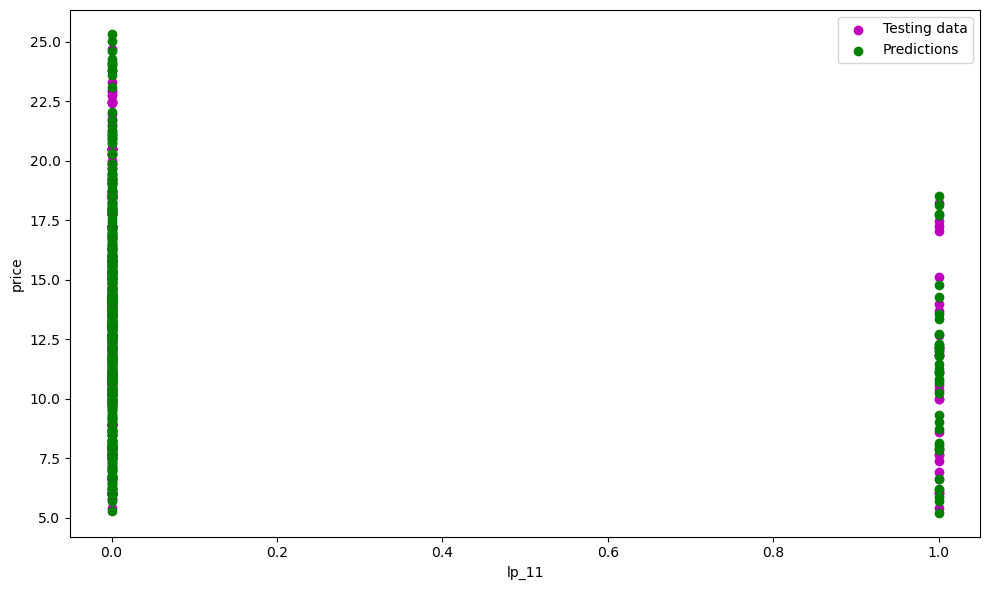

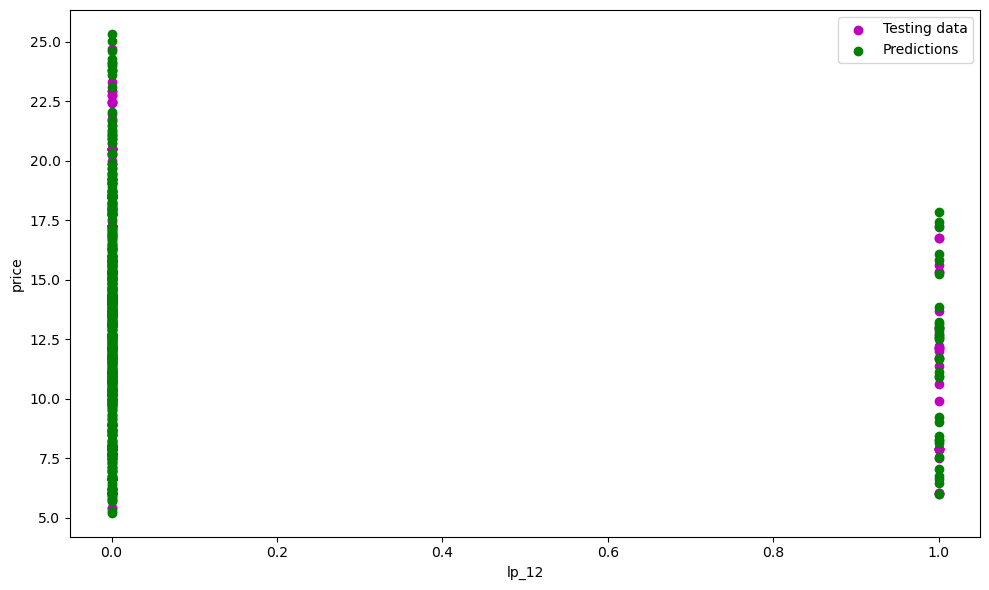

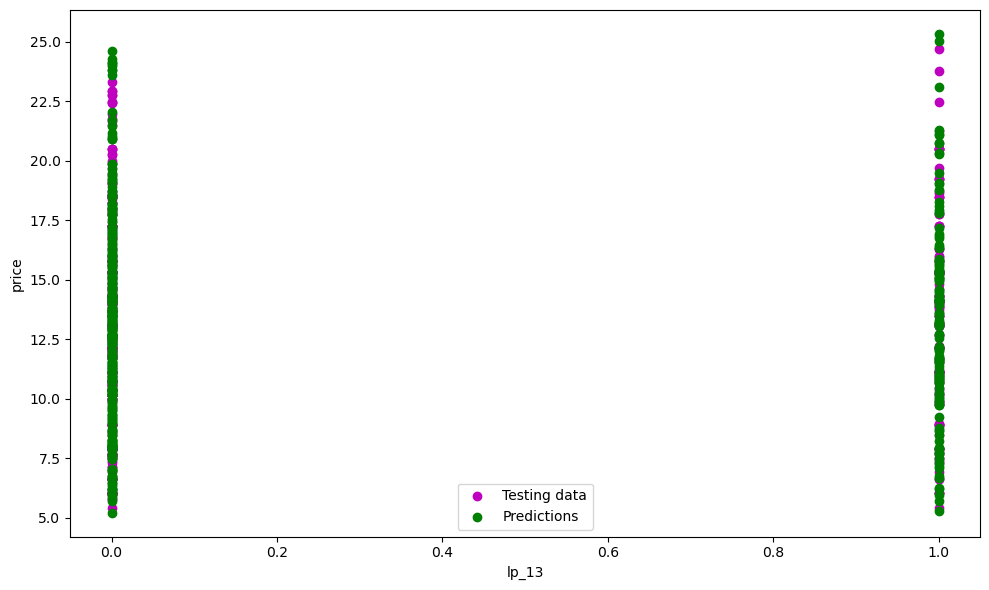

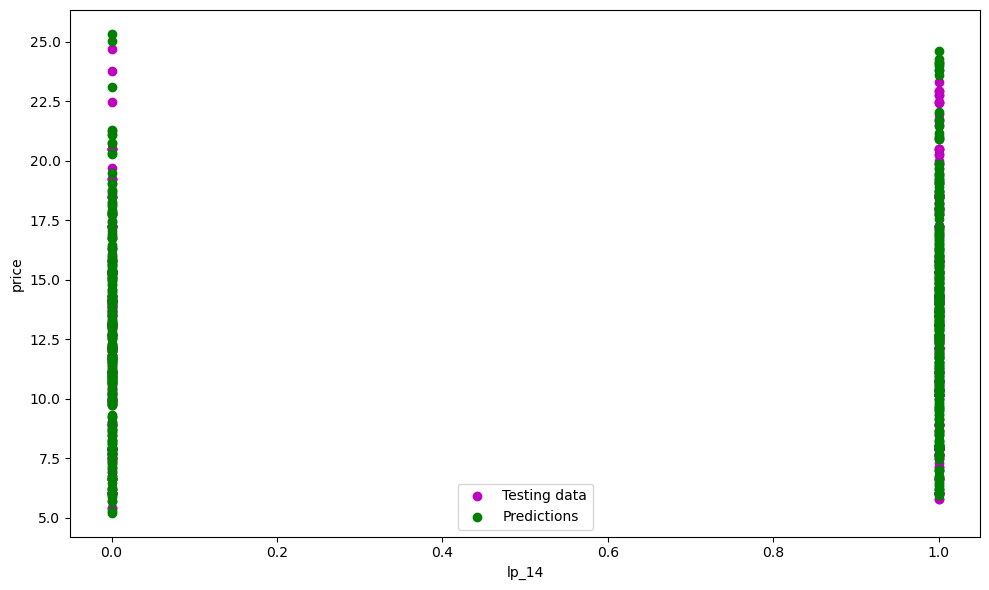

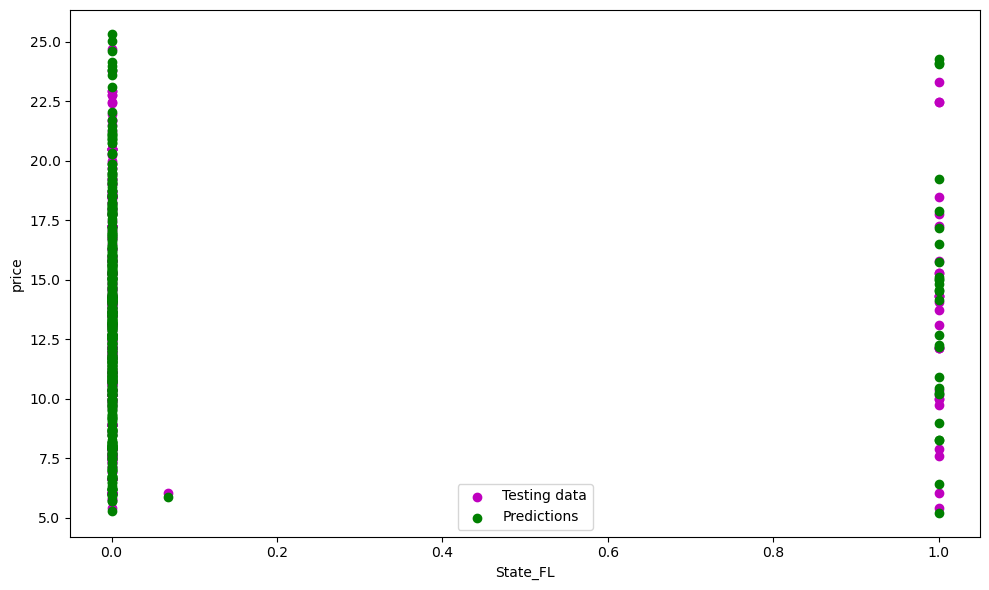

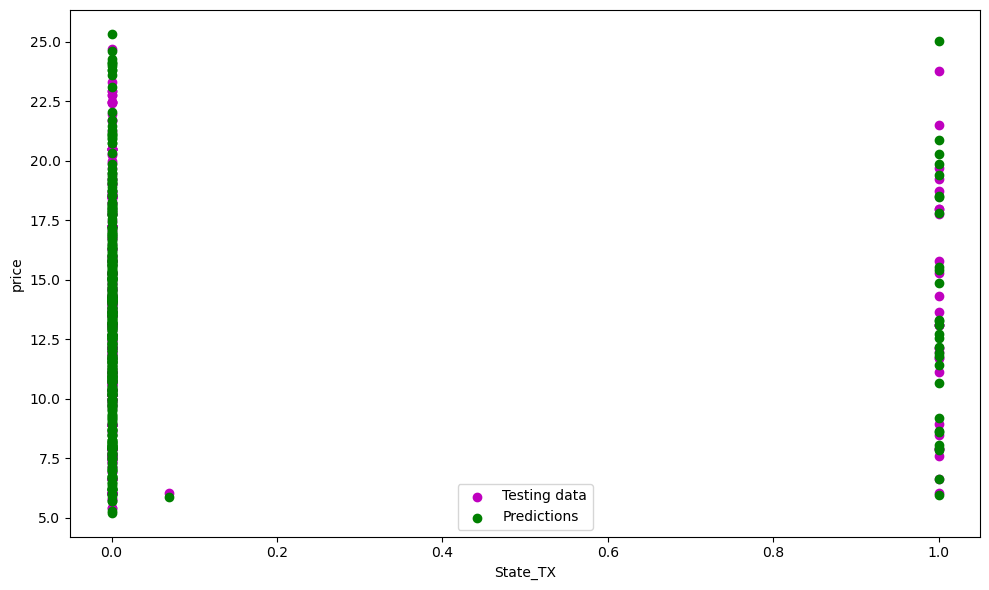

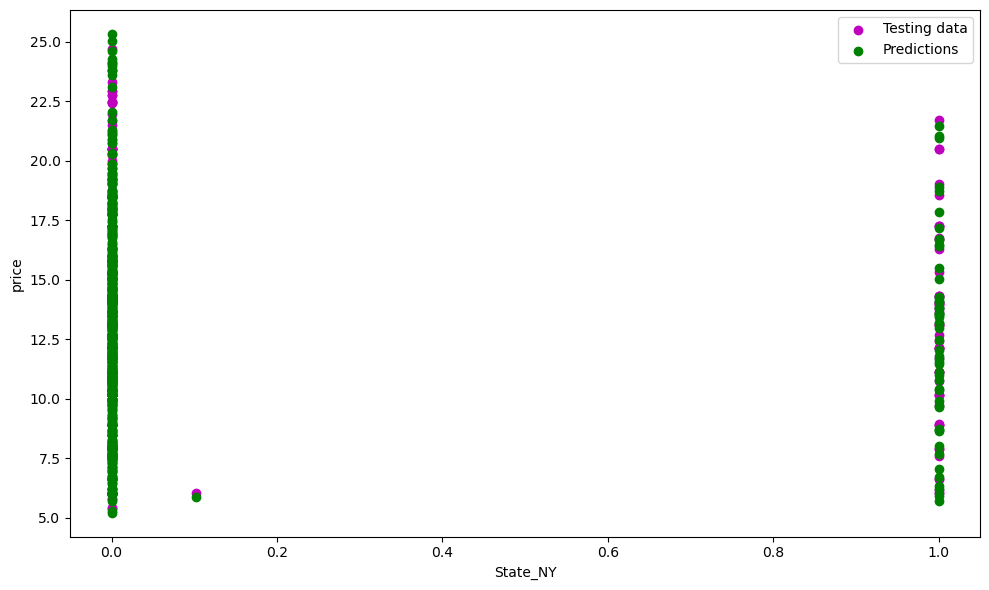

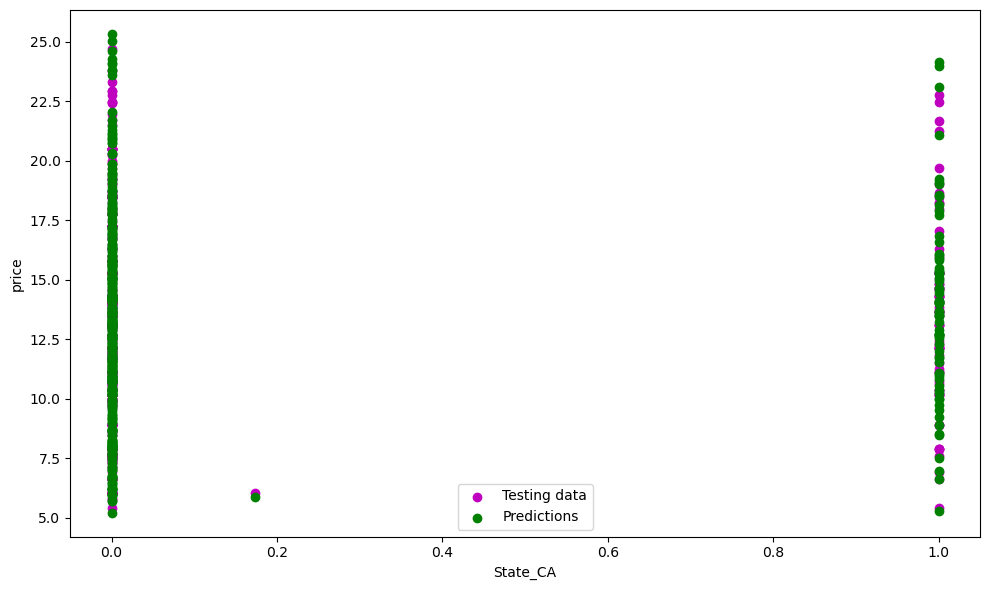

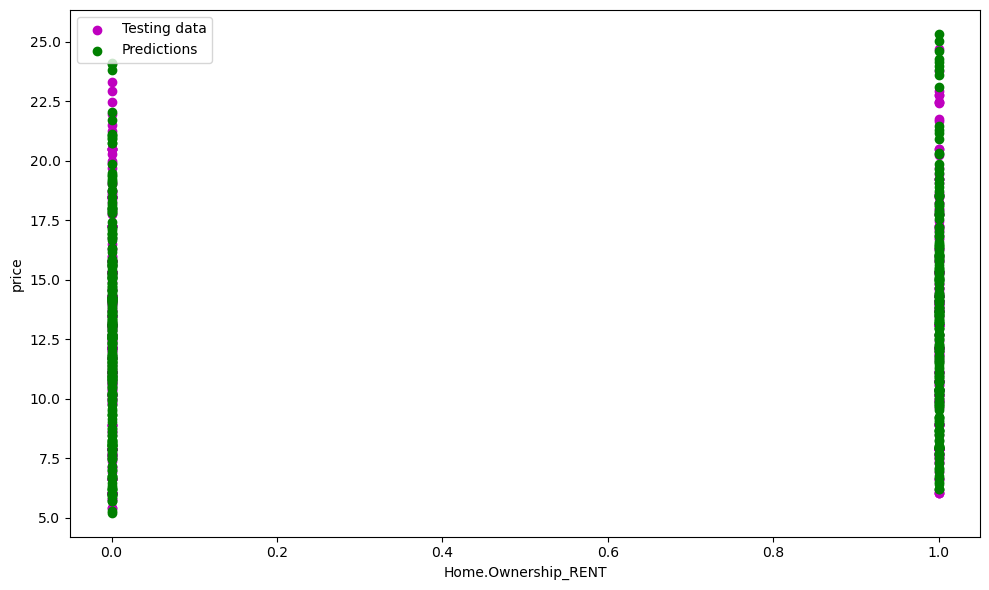

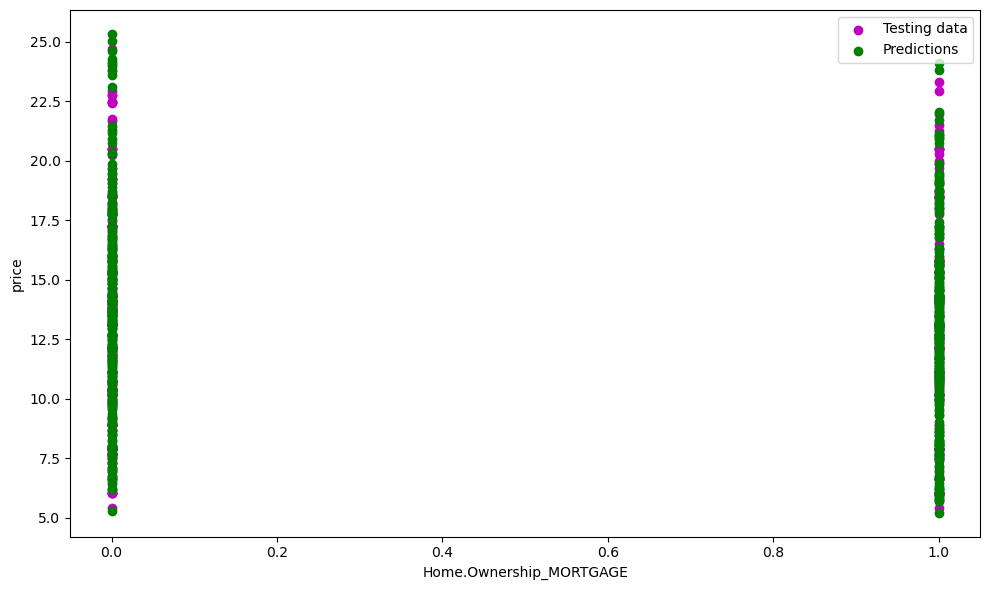

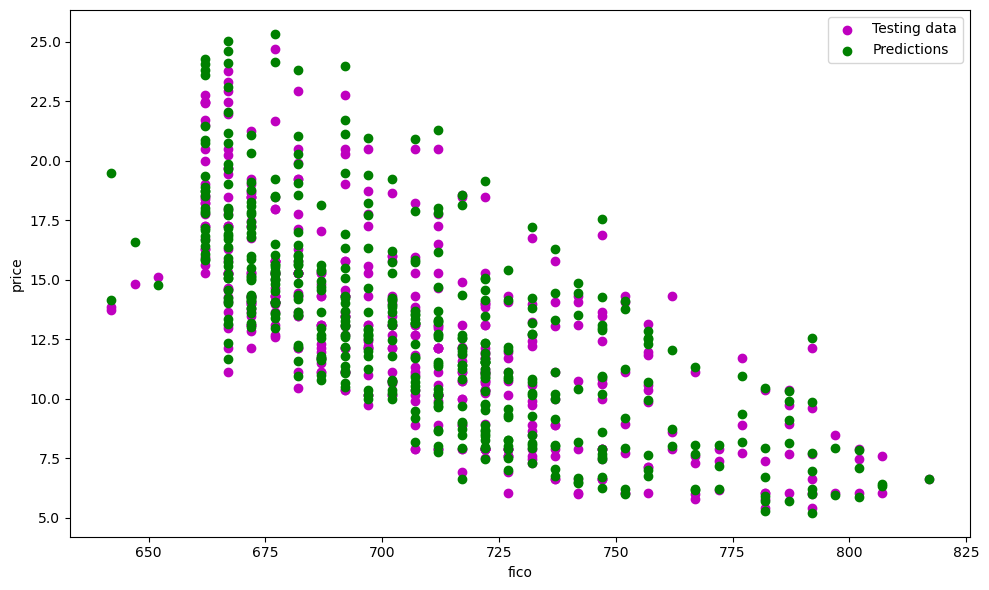

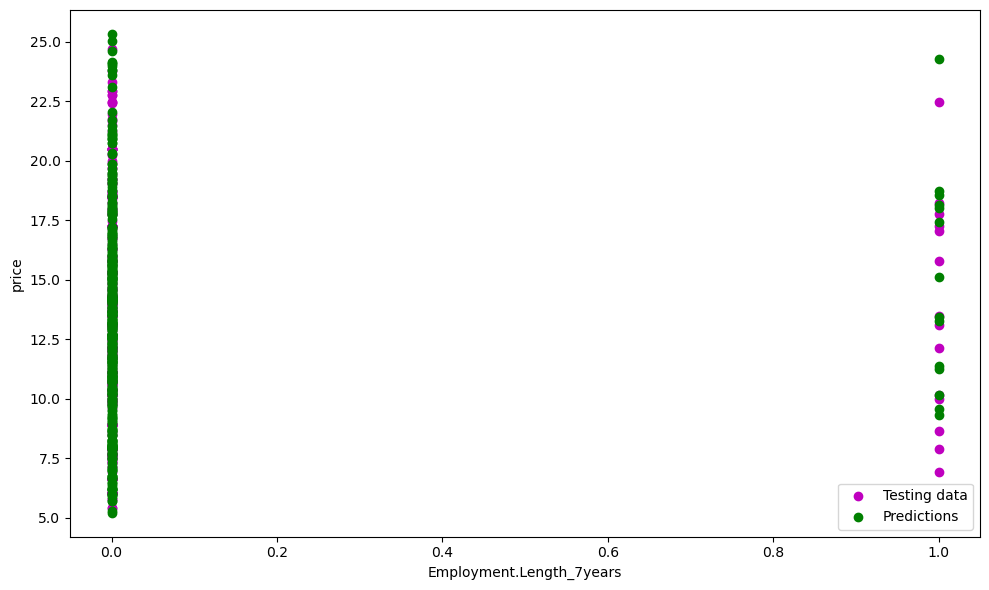

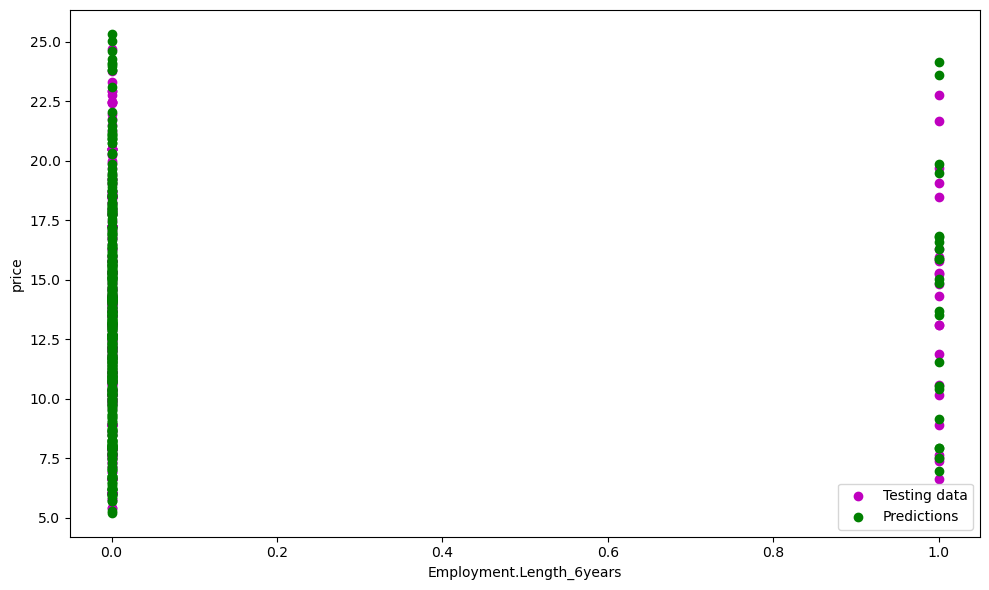

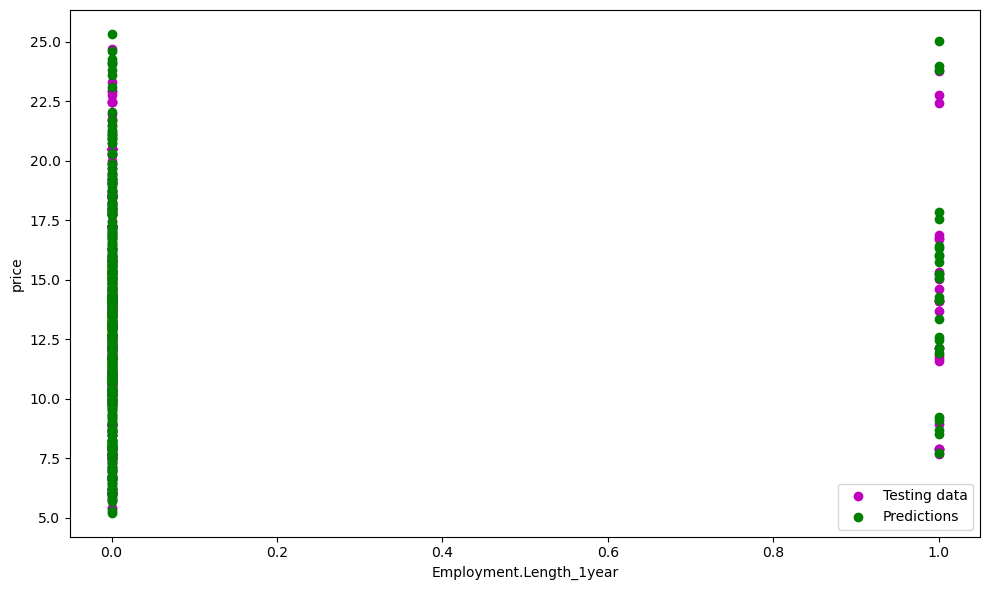

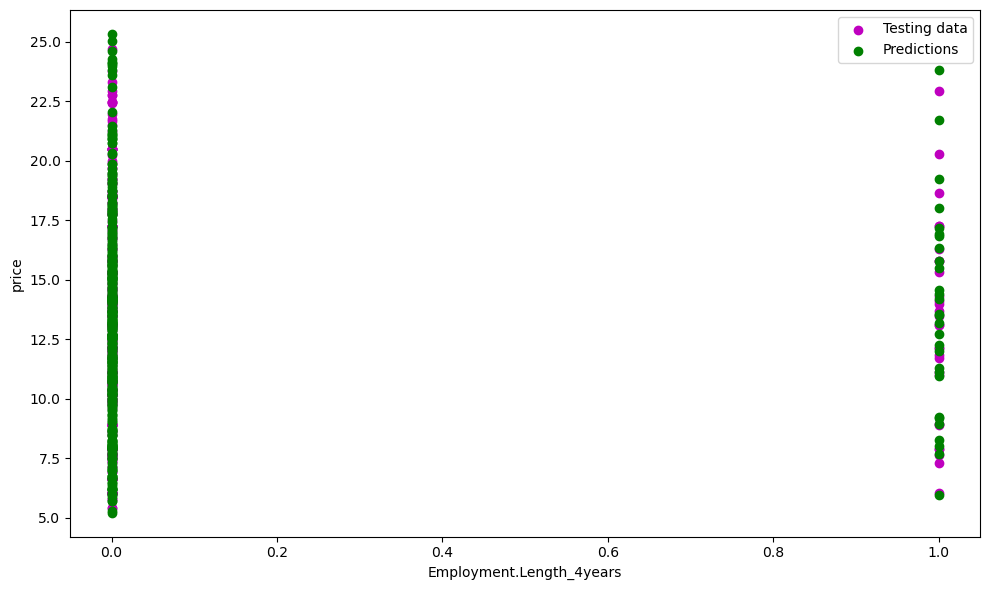

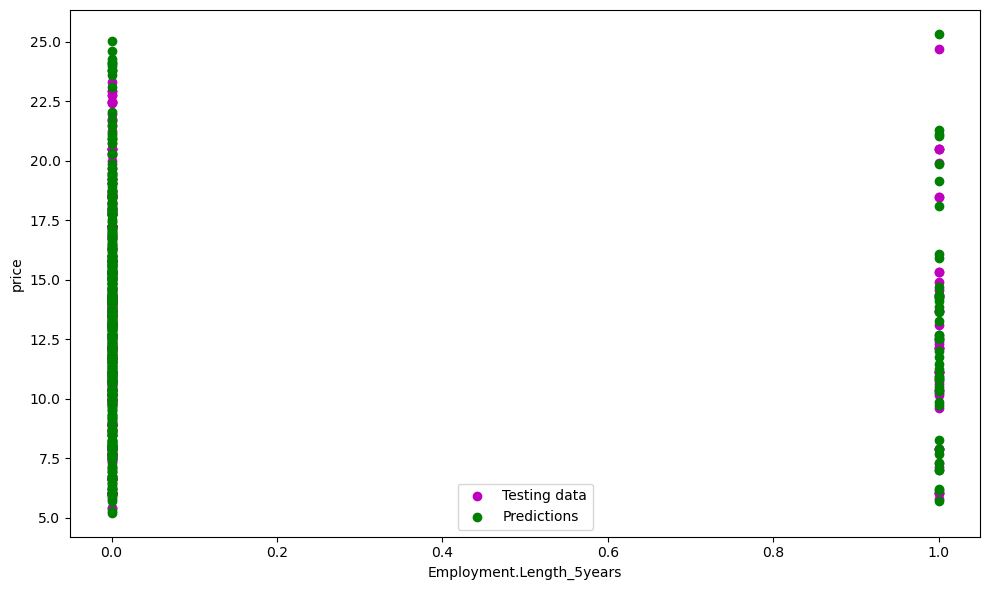

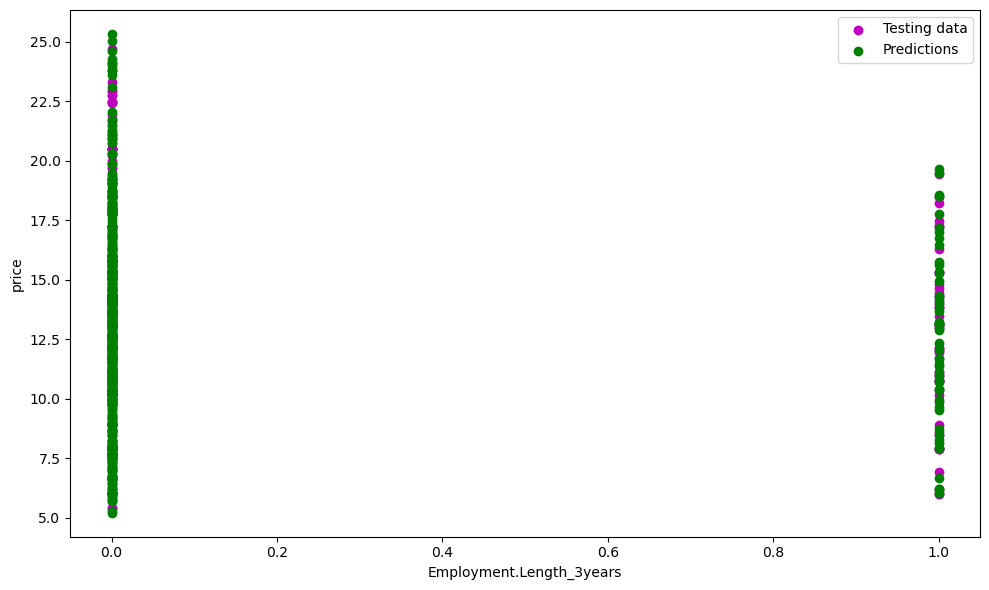

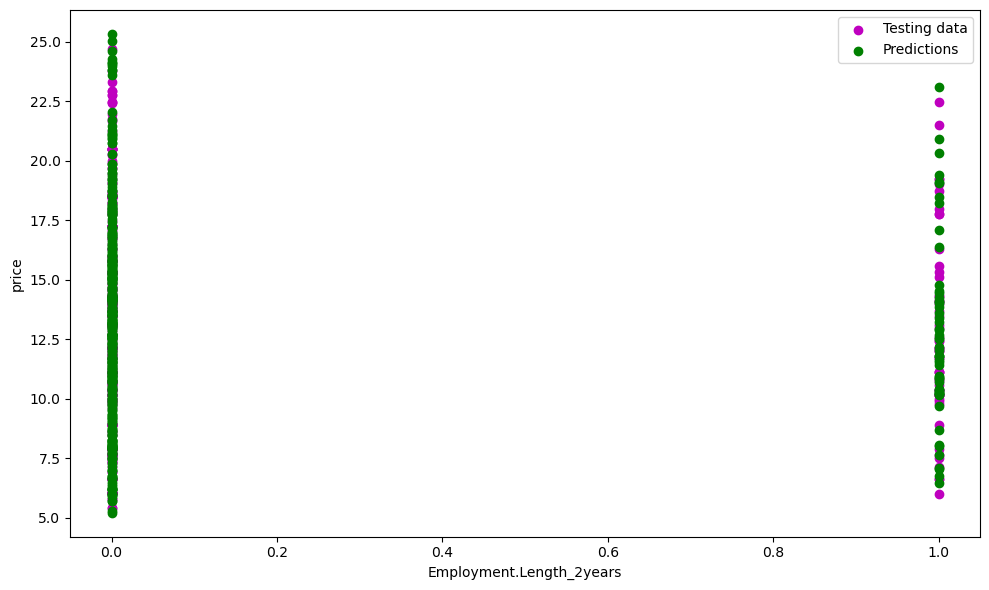

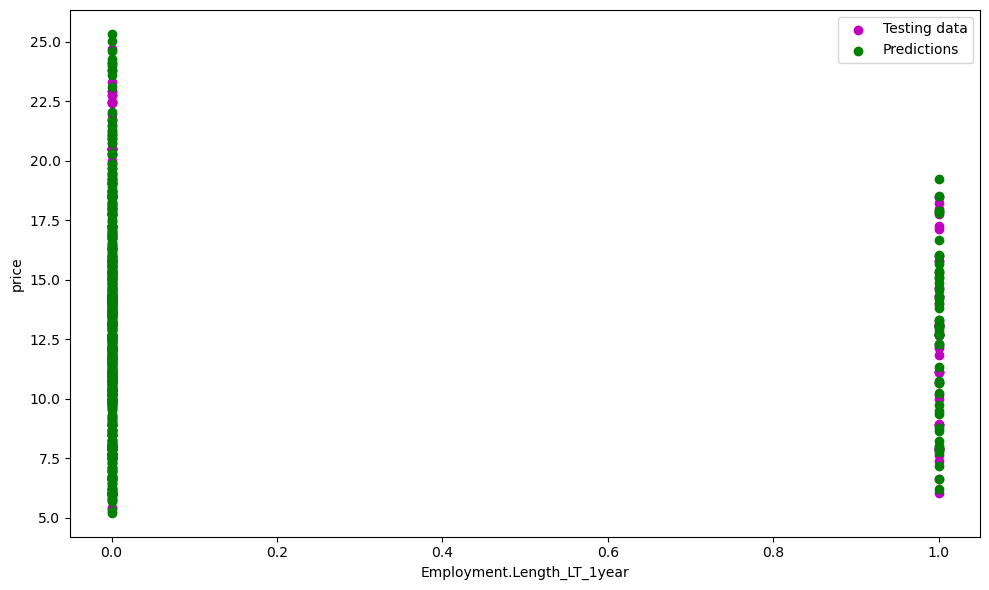

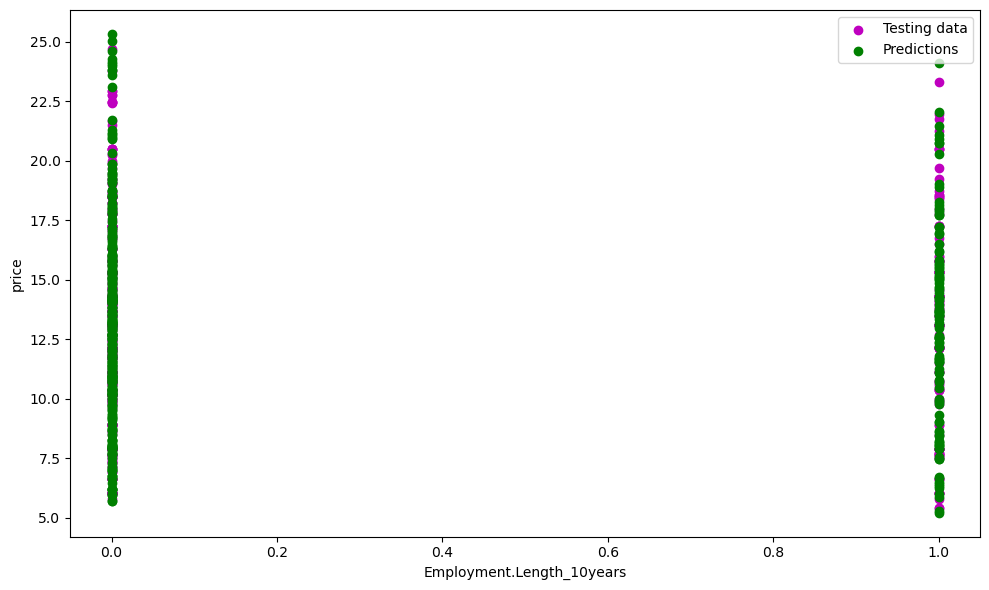

In [76]:
# Plotting evaluations

plot_predictions(X_valid, y_valid, Validation_pred_IV)

Text(0, 0.5, 'Loss')

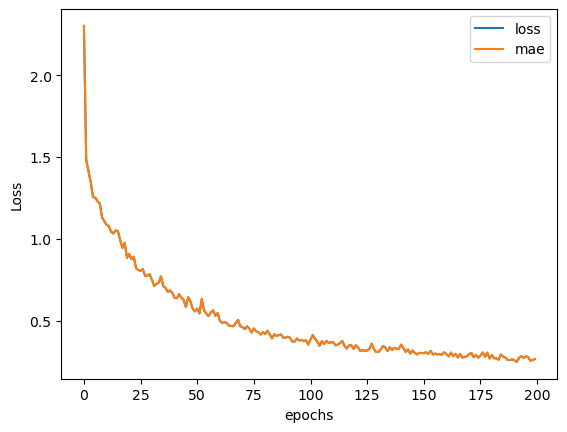

In [77]:
# plotting model improvement in training

pd.DataFrame(history_IV.history).plot()
plt.xlabel('epochs')
plt.ylabel('Loss')

### COMPARING MODELS 

In [78]:
# Creating table components

Experimented_models = [['Model 1',Cred_abs_err, Cred_mean_err],
                        ['Model 2',Cred_abs_err_II, Cred_mean_err_II],
                         ['Model 3', Cred_abs_err_III, Cred_mean_err_III],
                          ['Model 4',Cred_abs_err_IV, Cred_mean_err_IV]]

In [79]:
Evaluations = pd.DataFrame(Experimented_models, columns = 
                          ['Models', 'Abs. error', 'Mean sq. error'])
Evaluations

Models  Abs. error  Mean sq. error
0  Model 1    1.144293        2.560142
1  Model 2    0.665880        0.927075
2  Model 3    1.120036        2.444546
3  Model 4    0.535774        0.593390

The last model, model 4(Credit_model_IV) gives us the best accuracy.
So, we are going to use it to predict new interest rates.

In [80]:
# Using the best model to create new predictions

Interests = Credit_model_IV.predict(X_test_reg)

# Getting the first 20 predictions

Interests[:20]

10/10 [==============================] - 0s 1ms/step


array([[15.861412 ],
       [18.431734 ],
       [ 9.592508 ],
       [ 6.3850822],
       [13.444795 ],
       [ 6.184836 ],
       [14.466866 ],
       [ 8.452609 ],
       [14.467049 ],
       [11.769433 ],
       [ 9.339839 ],
       [16.152521 ],
       [10.040641 ],
       [15.986047 ],
       [14.298681 ],
       [17.144915 ],
       [10.428521 ],
       [17.54596  ],
       [14.012769 ],
       [15.261088 ]], dtype=float32)

### DEPLOYMENT

In [81]:
# Coverting predictions to dataframe

Interest_ = pd.DataFrame(Interests)
Interest_

0
0    15.861412
1    18.431734
2     9.592508
3     6.385082
4    13.444795
..         ...
295  14.127975
296   9.745073
297  15.946651
298  20.879078
299  13.714808

[300 rows x 1 columns]

In [82]:
# Renaming column

Interest_.rename(columns = {0:'Interest_rate'}, inplace = True)

In [83]:
Interest_

Interest_rate
0        15.861412
1        18.431734
2         9.592508
3         6.385082
4        13.444795
..             ...
295      14.127975
296       9.745073
297      15.946651
298      20.879078
299      13.714808

[300 rows x 1 columns]

In [84]:
# Almagamating the new predictions to the test set

Model_result = pd.concat([X_test, Interest_], axis = 1, join = 'inner')
Model_result.head(8)

ID  Amount.Requested  Debt.To.Income.Ratio  Monthly.Income  \
0  20093              5000                 12.59         4416.67   
1  62445             18000                  4.93         5258.50   
2  65248              7200                 25.16         3750.00   
3  81822              7200                 17.27         3416.67   
4  57923             22000                 18.28         6083.33   
5  33777              6000                  2.52         4800.00   
6  22573              9800                 12.89         2708.33   
7  32044              6000                  8.81         2462.75   

   Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0          13.000000                      7686   
1           6.000000                     11596   
2          13.000000                      7283   
3          14.000000                      4838   
4           9.000000                     20181   
5          10.084337                      1442   
6          11.000000                      8111   
7          11.000000                      8644   

   Inquiries.in.the.Last.6.Months  ll_36  lp_10  lp_11  ...  \
0                               0      0      0      0  ...   
1                               0      0      0      0  ...   
2                               0      0      0      0  ...   
3                               0      1      0      0  ...   
4                               0      0      0      0  ...   
5                               0      1      0      0  ...   
6                               0      0      0      0  ...   
7                               0      1      0      1  ...   

   Employment.Length_7years  Employment.Length_6years  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       1.0   
3                       0.0                       0.0   
4                       0.0                       0.0   
5                       0.0                       0.0   
6                       0.0                       0.0   
7                       0.0                       0.0   

   Employment.Length_1year  Employment.Length_4years  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   
5                      0.0                       0.0   
6                      0.0                       0.0   
7                      0.0                       0.0   

   Employment.Length_5years  Employment.Length_3years  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   
5                       0.0                       0.0   
6                       0.0                       1.0   
7                       0.0                       0.0   

   Employment.Length_2years  Employment.Length_LT_1year  \
0                       0.0                         1.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   
5                       0.0                         0.0   
6                       0.0                         0.0   
7                       1.0                         0.0   

   Employment.Length_10years  Interest_rate  
0                        0.0      15.861412  
1                        1.0      18.431734  
2                        0.0       9.592508  
3                        1.0       6.385082  
4                        0.0      13.444795  
5                        1.0     